### Paquetes usados
- pandas
- re
- numpy
- matplotlib.pyplot

# PREPROCESAMIENTO DE DATOS
Abiendo el archivo *.csv*, vimos que el mismo usaba como separadores el punto y coma (;), en lugar de la coma tradicional (,). Por lo tanto, al leer el archivo (usando la función de pandas `pd.read_csv()`), se debe especificar el separador a utilizar. Para esto agregamos el parámetro `sep=';'` y así vemos que el dataframe se muestra correctamente.

In [3]:
import pandas as pd

# Leemos el archivo .csv con separadores ";" y lo guardamos en una variable
raw_df = pd.read_csv("winequality_BDS.csv", sep=';')

# Mostramos las primeras 5 filas del dataset
raw_df.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  Moscatel            8.1              0.24         0.32            10.5   
1  Moscatel            5.8              0.23         0.20             2.0   
2  Moscatel            7.5              0.33         0.36             2.6   
3  Moscatel            6.6              0.38         0.36             9.2   
4  Moscatel            6.4              0.15         0.29             1.8   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.030                 34.0                 105.0  0.99407  3.11   
1      0.043                 39.0                 154.0  0.99226  3.21   
2      0.051                 26.0                 126.0  0.99097  3.32   
3      0.061                 42.0                 214.0  0.99760  3.31   
4      0.044                 21.0                 115.0  0.99166  3.10   

   sulphates alcohol  quality  
0       0.42    11.8        6  
1       0.39    10.2        6  
2       0.53    12.7        6  
3       0.56     9.4        5  
4       0.38    10.2        5

## Informacion de las variables
`raw_df.info()`

### Sobre el conjunto de datos
Este conjunto de datos contiene 3231 muestras de vino obtenidas mediante pruebas fisicoquímicas en la bodega Del Sol, elaboradas a partir de dos tipos de uva.
### Descripción de las variables
- `type`: tipo de uva con la que se elabora el vino.
- `fixed acidity`: cantidad de ácidos no volátiles presentes en el vino, medida en gramos por litro.
- `volatile acidity`: cantidad de ácidos volátiles presentes en el vino, medida en gramos por litro.
- `citric acid`: contenido de ácido cítrico en el vino, medido en gramos por litro.
- `residual sugar`: cantidad de azúcar que queda en el vino después de la fermentación, medida en gramos por litro.
- `chlorides`: concentración de cloruros (sales) en el vino, medida en gramos por litro.
- `free sulfur dioxide`: cantidad de dióxido de azufre que no está ligado químicamente en el vino, medida en miligramos por litro.
- `total sulfur dioxide` : suma del dióxido de azufre libre y el combinado en el vino, medida en miligramos por litro.
- `density`: medida de la masa por unidad de volumen del vino, utilizada para estimar la concentración de sólidos disueltos, medida en gramos por centímetro cúbico.
- `pH`: medida de la acidez o alcalinidad del vino.
- `sulphates`: concentración de sales de sulfato en el vino, medida en gramos por litro.
- `alcohol`: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).
- `quality`: puntuación del vino, con una escala que va de 0 a 10.

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3231 non-null   object 
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.3+ KB


## Pulir datos

Para comenzar a trabajar sobre los datos, antes que nada hacemos una copia del dataframe en crudo. El dataframe sobre el que haremos modificaciones se llamará `df`.

In [5]:
# Creamos un nuevo dataframe para trabajar en él.
df = raw_df.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3231 entries, 0 to 3230
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3231 non-null   object 
 1   fixed acidity         3231 non-null   float64
 2   volatile acidity      3231 non-null   float64
 3   citric acid           3231 non-null   float64
 4   residual sugar        3231 non-null   float64
 5   chlorides             3231 non-null   float64
 6   free sulfur dioxide   3231 non-null   float64
 7   total sulfur dioxide  3231 non-null   float64
 8   density               3231 non-null   float64
 9   pH                    3231 non-null   float64
 10  sulphates             3231 non-null   float64
 11  alcohol               3231 non-null   object 
 12  quality               3231 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 328.3+ KB


In [6]:
# determinamos cuantos nans hay
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Datos duplicados

In [7]:
# miraremos si hay datos duplicados
print('Filas repetidas:', df.duplicated().sum())

# Eliminamos las filas duplicadas quedandose con la primera aparición
df.drop_duplicates(inplace=True)

# Comprobamos que se han eliminado las filas duplicadas
print('Filas repetidas post eliminar repetidas:', df.duplicated().sum())
print('Cantidad filas total:', len(df))

Filas repetidas: 588
Filas repetidas post eliminar repetidas: 0
Cantidad filas total: 2643


### Columna *'type'*
Esta variable nos muestra la variedad del vino en cuestion. Es una variable cuantitativa nominal y tiene dos varoles posibles: **"Moscatel"** o **"Syrah"**. No tiene valores nulos.

In [8]:
print(df['type'].value_counts())
#Total
df['type'].value_counts().sum()

type
Syrah       1359
Moscatel    1284
Name: count, dtype: int64


np.int64(2643)

### Columna *'density'*
En esta columna podemos ver la densidad del vino, medida en gramos por centímetro cúbico (g/cm<sup>3</sup>). Es una variable cuantitativa continua.

- `densidad`: La densidad o peso específico del vino es un parámetro analítico de importancia relativa. Si estrujamos uvas y medimos la densidad de ese mosto comprobamos que pesa más que el agua. Un litro de agua pesa 1.000 gramos y un litro de mosto pesa 994 gramos, pero no siempre es lo mismo. Durante la fermentación, que dura unos diez días, la densidad que parte de 1.100, concluye en 994. La diferencia es el tufo que va a la atmósfera.
Pero no todos los vinos acaban su fermentación con la misma densidad, depende de su contenido en alcohol. Si la uva es muy madura tendrá mucho azúcar que formara 14º de alcohol y ese vino tendrá densidad 0,993 que significa que un litro pesará 993 gramos. Por el contrario, si vendimiamos esa uva sin madurar su grado de alcohol será 10º y su densidad de 0,996, lo cual significa que un litro pesa 996 gramos.

- Podemos concluir en que el rango en el que se puede mover la densidad es el minimo de la muestra (ya que fisicamente es posible) y el maximo debemos determinarlo ( ya que vemos que es 100! lo cual no es fisicamente posible ) viendo que el 75% de nuestra muestra esta en un 0.997260 pondremos como maximo de densidad el valor del agua que seria 1.0

*Para mas información, visitar [Densidad del vino - La Rioja](https://www.larioja.com/opinion/densidad-vino-20210611214244-nt.html?ref=https%3A%2F%2Fwww.larioja.com%2Fopinion%2Fdensidad-vino-20210611214244-nt.html).*

count    2643.000000
mean        1.806279
std         8.217463
min         0.987110
25%         0.992400
50%         0.995400
75%         0.997100
max       100.369000
Name: density, dtype: float64
count    2579.000000
mean        0.994701
std         0.002903
min         0.987110
25%         0.992340
50%         0.995310
75%         0.997000
max         1.000000
Name: density, dtype: float64


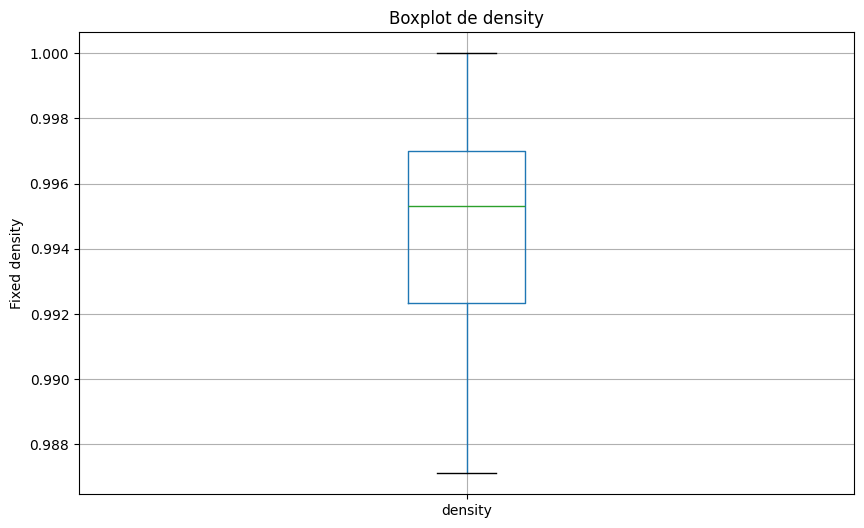

In [9]:
import matplotlib.pyplot as plt

df_sin_filtrar_densidad = df 
print(df_sin_filtrar_densidad['density'].describe())

# Filtrar las filas donde la columna 'densidad' es menor o igual a 1.0 y asignar de nuevo a df
df = df[df['density'] <= 1.0]

# Verificar el resultado
print(df['density'].describe())

# Boxplot de la columna 'fixed acidity'
plt.figure(figsize=(10, 6))
df.boxplot(column='density')
plt.title('Boxplot de density')
plt.ylabel('Fixed density')
plt.grid(True)
plt.show() 

* Vemos que df nos quedo con menos filas, eliminamos las muestras que no tenian sentido

### Columna *'alcohol'*

Podemos ver que la columna 'alcohol' a simple vista consta de números reales, sin embargo, está establecida como tipo object, entonces procedemos a modificar su formato a tipo float, para así poder analizar esta variable de una manera adecuada.

Antes de hacer la transformación, comprobamos que sea de tipo object y analizamos qué objects tenemos dentro de esta columna. Podemos confirmar que son todos de tipo STR (string). A fin de observar más en detalle los datos de esta columna vemos los valores que son únicos y que se pueden repetir. Ante esto podemos ver que hay muchos valores que no tienen sentido para la muestra ya que el alcohol está definido como: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).

Para corregir los valores analizamos dos caminos, uno que el valor definido en string tenga sentido por lo que lo convertiremos en float y por el otro lado que este no tenga manera de ser convertido a float y tampoco tenga sentido en nuestra muestra. Para ello definimos una función que lo que pueda ser convertible a float lo haga y lo que no lo transforme en nan. Invocamos la función con cada valor de la columna alcohol y luego eliminamos las filas con nans. Y verificamos que nuestra muestra ahora tenga sentido y no hayamos perdido muchas filas.

Finalmente, pasamos los valores a tipo numérico con el método to_numeric() de pandas.

In [10]:
import re
import pandas as pd

print(df['alcohol'].dtype) # Vemos que tipo de dato es alcohol

# Contar y ver los tipos de objetos en la columna 'alcohol'
tipos_alcohol = df['alcohol'].apply(type).value_counts()
print(tipos_alcohol)

# Ver todos los valores de la columna 'alcohol'
print(df['alcohol'].unique())

object
alcohol
<class 'str'>    2579
Name: count, dtype: int64
['11.8' '10.2' '12.7' '9.4' '12' '11.3' '10.9' '9.8' '12.2' '11.1' '11.4'
 '12.8' '10.1' '12.9' '9.2' '12.3' '13.5' '11' '10.6' '12.4' '9.1' '11.2'
 '10.4' '12.5' '11.6' '12.6' '11.5' '10.5' '12.1' '9.9' '9.5' '10.8'
 '10.7' '13.2' '10.3' '8.8' '13.1' '13' '10' '13.9' '9.6' '13.4' '11.7'
 '13.6' '13.3' '13.7' '9.7' '9' '11.9' '9.3' '8.6' '8.4' '8.9' '14' '14.2'
 '8.7' '8.5' '11.94' '128.933.333.333.333' '114.666.666.666.667' '10.98'
 '100.333.333.333.333' '114.333.333.333.333' '105.333.333.333.333'
 '953.333.333.333.333' '109.333.333.333.333' '113.666.666.666.667'
 '113.333.333.333.333' '110.666.666.666.667' '973.333.333.333.333' '11.05'
 '9.75' '11.35' '9.55' '10.55' '11.45' '14.05' '123.333.333.333.333'
 '12.75' '13.8' '12.15' '13.05' '112.666.666.666.667'
 '105.666.666.666.667' '117.333.333.333.333' '11.75' '10.65'
 '109.666.666.666.667' '101.333.333.333.333' '10.15' '104.666.666.666.667'
 '116.333.333.333.333' '12.25' '

In [11]:


# Función para limpiar y convertir a float
def limpiar_y_convertir(valor):
    try:
        # Reemplazar comas por puntos
        valor = re.sub(r',', '.', valor)
        # Convertir a float
        return float(valor)
    except ValueError:
        # Si no se puede convertir, devolver NaN
        return float('nan')

# Aplicar la función a la columna 'alcohol'
df['alcohol'] = df['alcohol'].apply(limpiar_y_convertir)

# Eliminar filas con valores NaN en la columna 'alcohol'
df = df.dropna(subset=['alcohol'])

print(df['alcohol'].dtype) # Vemos que tipo de dato es alcohol

# Contar y ver los tipos de objetos en la columna 'alcohol'
tipos_alcohol = df['alcohol'].apply(type).value_counts()
print(tipos_alcohol)

# Ver todos los valores de la columna 'alcohol'
print(df['alcohol'].unique())

# Value counts de la columna 'alcohol'
print(df['alcohol'].value_counts())

float64
alcohol
<class 'float'>    2547
Name: count, dtype: int64
[11.8  10.2  12.7   9.4  12.   11.3  10.9   9.8  12.2  11.1  11.4  12.8
 10.1  12.9   9.2  12.3  13.5  11.   10.6  12.4   9.1  11.2  10.4  12.5
 11.6  12.6  11.5  10.5  12.1   9.9   9.5  10.8  10.7  13.2  10.3   8.8
 13.1  13.   10.   13.9   9.6  13.4  11.7  13.6  13.3  13.7   9.7   9.
 11.9   9.3   8.6   8.4   8.9  14.   14.2   8.7   8.5  11.94 10.98 11.05
  9.75 11.35  9.55 10.55 11.45 14.05 12.75 13.8  12.15 13.05 11.75 10.65
 10.15 12.25 11.85 11.65 13.55 11.95 11.55 12.05 14.9   9.95  9.25  9.05
 10.75]
alcohol
9.50     146
9.40     136
9.20      95
11.00     91
9.80      88
        ... 
14.90      1
9.95       1
9.25       1
9.05       1
10.75      1
Name: count, Length: 85, dtype: int64


C:\Users\tomyd\AppData\Local\Temp\ipykernel_15096\3114159786.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['alcohol'] = df['alcohol'].apply(limpiar_y_convertir)


- `alcohol`: contenido alcohólico del vino, medido en porcentaje de volumen (% vol).Este rasgo de los vinos está regulado por una normativa específica que establece ciertos limites al respecto, concretamente a cargo de la Organización Internacional del Vino (OIV) y del comité regulador de cada Denominación de Origen (DO). No obstante, y de una forma generalizada, los vinos no suelen exceder los 15% vol. o 15 grados de alcohol, debido a que es lo máximo que alcanzan durante la fermentación.

*Para mas informacion, visitar [¿ Que es la graduacion alcoholica del vino ? ](https://www.debuenavid.es/blog/elaboracion-del-vino/graduacion-alcoholica-vino#%C2%BFQue_es_la_graduacion_alcoholica_del_vino).).*

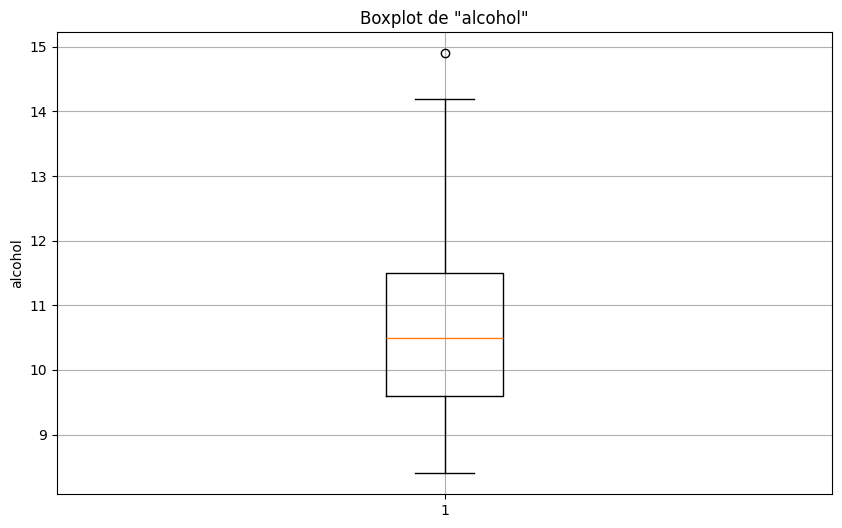

In [12]:

import matplotlib.pyplot as plt
import numpy as np

#Ahora si hagamos un describe de la columna alcohol.
df['alcohol'].describe()

#Boxplot de la columna 'alcohol'
plt.figure(figsize=(10, 6))
plt.boxplot(df['alcohol'])
plt.title('Boxplot de "alcohol"')
plt.ylabel('alcohol')

# Añadir la grilla
plt.grid(True)

# Mostrar el gráfico
plt.show()

### Columna *'fixed acidity'*
Esta columna refleja la cantidad de acidos no volatiles presentes en el vino, medida en gramos por litro. Es una variable cuantitativa continua.

- `acido no volatil`: aquellos acidos que no se evaporan facilmente y permanecen en el vino durante su almacenamiento y consumo. Contribuyen al sabor (equilibro entre dulzura y acidez), estructura-longevidad (envejecimiento y preservacion) y a definir textura-frescura 

count    2547.000000
mean        7.347939
std         1.491070
min         3.800000
25%         6.400000
50%         7.000000
75%         8.000000
max        15.900000
Name: fixed acidity, dtype: float64


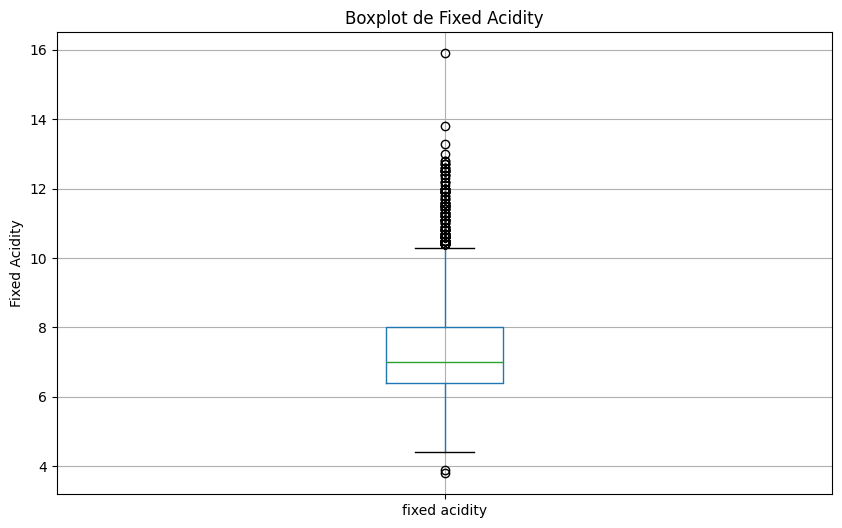

In [13]:
import matplotlib.pyplot as plt

# Descripción de la columna 'fixed acidity'
print(df['fixed acidity'].describe())

# Boxplot de la columna 'fixed acidity'
plt.figure(figsize=(10, 6))
df.boxplot(column='fixed acidity')
plt.title('Boxplot de Fixed Acidity')
plt.ylabel('Fixed Acidity')
plt.grid(True)
plt.show()


### Columna *'volatile acidity'*
Esta columna da la cantidad de acidos volatiles presentes en el vino, medida en gramos por litro. Es una variable cuantitativa continua.

- `acido volatil`: (AV) es el conjunto de ácidos grasos de la serie
acética que se hallan en el vino libres o combinados formando sales.
El más importante es el ácido acético.
El olor desagradable a "picado" de algunos vinos es debido principalmente al ácido acético y al acetato de etilo. El nivel sensorial
de estos compuestos es del orden de 0,6 g/L para el ácido acético
y 0,1 g/L para el acetato de etilo. 

*Para mas informacion, visitar:*
- *[Enología - U. de Santiago de Compostela](https://www.usc.gal/caa/MetAnalisisStgo1/enologia.pdf)*
- *[Acidos y acidez en el vino - Aprender de vino](https://www.aprenderdevino.es/acidos-acidez-vino/)*

count    2547.000000
mean        0.410259
std         0.192722
min         0.085000
25%         0.260000
50%         0.360000
75%         0.540000
max         1.580000
Name: volatile acidity, dtype: float64
volatile acidity
0.280    90
0.240    80
0.220    75
0.260    74
0.320    70
         ..
1.005     1
1.580     1
0.955     1
1.180     1
0.895     1
Name: count, Length: 171, dtype: int64


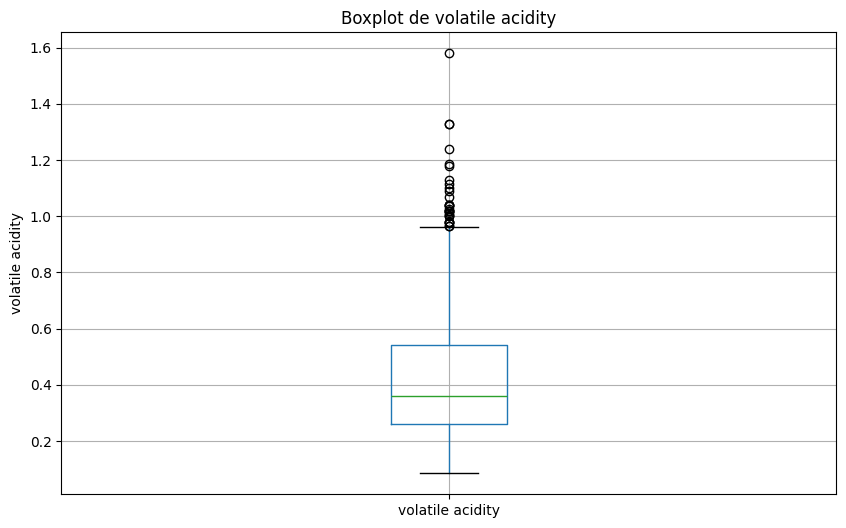

In [14]:
import matplotlib.pyplot as plt

# Descripción de la columna 'volatile acidity'
print(df['volatile acidity'].describe())
# Value counts de la columna 'volatile acidity'
print(df['volatile acidity'].value_counts())
# Boxplot de la columna 'volatile acidity'
plt.figure(figsize=(10, 6))
df.boxplot(column='volatile acidity')
plt.title('Boxplot de volatile acidity')
plt.ylabel('volatile acidity')
plt.grid(True)
plt.show()

### Columna *'citric acid'*
Esta columna muestra la cantidad de acido citrico presente en el vino, medida en gramos por litro. Es una variable cuantitativa continua.
- `acido citrico`: Esta escasamente presente en la uva. Se utiliza tambien como acidificante. En cuanto a su dosis no debe superar la cantidad de 1 g/L (limite juridico europeo) y puede presentarse de 20 a 60 g/L. 

> *Para mas información, visitar:*
>    - *[Acido citrico](https://www.vason.com/uploads/MediaGalleryArticoliDocumenti/%C3%81cido%20C%C3%ADtrico%202_es.pdf)*

count    2547.000000
mean        0.284111
std         0.157030
min         0.000000
25%         0.200000
50%         0.280000
75%         0.370000
max         1.000000
Name: citric acid, dtype: float64
citric acid
0.00    124
0.28    121
0.30    112
0.32    107
0.26     99
       ... 
0.79      1
0.86      1
0.91      1
0.76      1
0.75      1
Name: count, Length: 83, dtype: int64


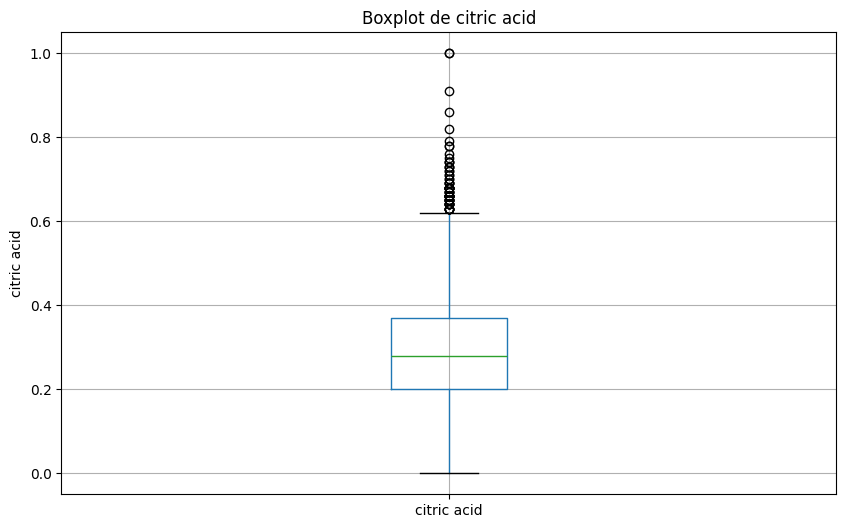

In [15]:
import matplotlib.pyplot as plt

# Descripción de la columna 'citric acid'
print(df['citric acid'].describe())
# value counts de la columna 'citric acid'
print(df['citric acid'].value_counts())
# Boxplot de la columna 'citric acid'
plt.figure(figsize=(10, 6))
df.boxplot(column='citric acid')
plt.title('Boxplot de citric acid')
plt.ylabel('citric acid')
plt.grid(True)
plt.show()

### Columna 'residual sugar'
Esta columna da la cantidad de azúcar residual en gramos por litro de vino. Es una variable cuantitativa continua.
- `azucar residual`: La uva contiene, al ser vendimiada (proceso de recolección de la uva cuando está madura para hacer vino), unos 200 gramos de azucares por litro de mosto (El mosto es el jugo fresco de la uva que se obtiene después de su prensado y antes de que comience el proceso de fermentación alcohólica. Al fermentar, el azúcar desaparece en gran parte, quedando lo que los enólogos llaman azucares residuales.
> *Para mas información, visitar:*
>    - *[¿ Sabes lo que es el azucar residual ?](https://www.catadelvino.com/blog-cata-vino/sabes-lo-que-es-el-azucar-residual-de-un-vino)*

count    2547.000000
mean        4.088320
std         3.684126
min         0.700000
25%         1.800000
50%         2.400000
75%         5.000000
max        22.600000
Name: residual sugar, dtype: float64
residual sugar
2.00    160
1.80    129
1.90    117
2.20    116
2.10    114
       ... 
2.25      1
3.45      1
2.65      1
2.05      1
3.75      1
Name: count, Length: 227, dtype: int64


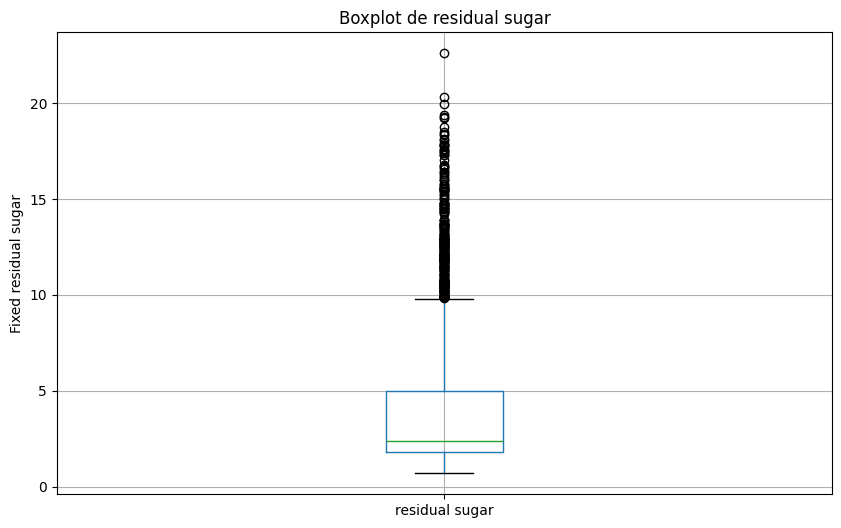

In [16]:
import matplotlib.pyplot as plt

# Descripción de la columna 'residual sugar'
print(df['residual sugar'].describe())
# value counts de la columna 'residual sugar'
print(df['residual sugar'].value_counts())

# Boxplot de la columna 'residual sugar'
plt.figure(figsize=(10, 6))
df.boxplot(column='residual sugar')
plt.title('Boxplot de residual sugar')
plt.ylabel('Fixed residual sugar')
plt.grid(True)
plt.show() 

### Columna *'chlorides'*
- `cloruros`: medida en gramos por litro.. Es una variable cuantitativa continua.
Los cloruros (*"chlorides" por su nombre en ingles*) en el vino pueden afectar el sabor y la calidad del mismo, y también pueden ayudar a determinar su origen y las variedades de uva:

- **Sabor:**
      altas concentraciones de cloruro pueden darle al vino un sabor salado indeseable, lo que puede reducir su atractivo en el mercado. Sin embargo, también se cree que la presencia de cloruro es necesaria para que el sabor salado sea percibido.

- **Origen:**
      La concentración de cloruro en el vino puede verse influenciada por las condiciones geográficas, geológicas y climáticas del viñedo, como su distancia de la costa, el tipo de suelo y si se riega con agua salada.

- **Variedades de uva:**
      El tipo de uva utilizado en el vino puede influir en la cantidad de cloruro que contiene.

- **Restricciones legales de argentina: https://www.argentina.gob.ar/normativa/nacional/resoluci%C3%B3n-275-2017-287281/texto **

      EL PRESIDENTE DEL INSTITUTO NACIONAL DE VITIVINICULTURA

      RESUELVE:

      ARTÍCULO 1º.- Fíjanse para los vinos, los límites máximos de contenido de cloruros expresado como cloruro de sodio según se detalla:

      a. Con certificado de análisis para la libre circulación y/o exportación:

      CERO COMA OCHENTA GRAMOS POR LITRO (0,80 g/l).


count    2547.000000
mean        0.066876
std         0.044474
min         0.009000
25%         0.042000
50%         0.059000
75%         0.080000
max         0.611000
Name: chlorides, dtype: float64


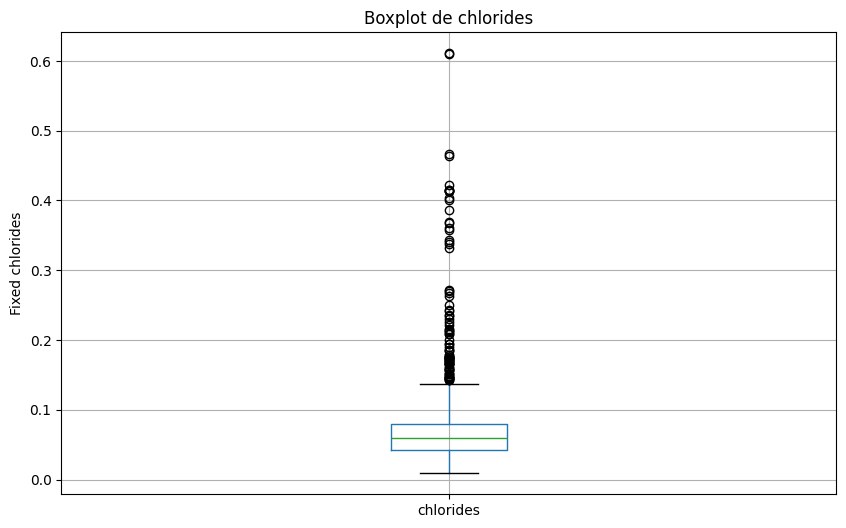

In [17]:
import matplotlib.pyplot as plt

# Descripción de la columna 'chlorides'
print(df['chlorides'].describe())

# Boxplot de la columna 'chlorides'
plt.figure(figsize=(10, 6))
df.boxplot(column='chlorides')
plt.title('Boxplot de chlorides')
plt.ylabel('Fixed chlorides')
plt.grid(True)
plt.show() 

### Columna *'free sulfur dioxide'*
Esta columna nos indica la cantidad de dióxido de azufre (SO<sub>2</sub>) libre presente en el vino, medido en miligramos por litro (mg/L). Es una variable cuantitativa continua.
- `dioxido de azufre`: Se obtiene por oxidación del azufre donde por una combustión del azufre con el oxígeno genera el dióxido de azufre.
Es considerado como el primer aditivo de uso enológico, el cual desde los comienzos del tiempo de la enología fue muy útil ya que a partir de su uso, se determinaron menos alteraciones durante las etapas de conservación. Esto se explica gracias a la fuerte acción bactericida que tiene, actualmente se lo sigue considerando como algo indispensable en la enología de nuestros días.
En el vino, lo vamos a tener bajo tres formas:
    - anhídrido sulfuro libre
    - anhídrido sulfuroso combinado
    - anhídrido sulfuroso total (que es la suma de los dos anteriores).

El anhídrido sulfuroso libre tiene distintas formas, una de ellas es la forma gaseosa, como dióxido de azufre que es soluble en el agua del vino; el ácido sulfuroso; el anión sulfito ácido que proviene de la disociación del ácido sulfuroso; y también en anión sulfito. 

> *Para mas información, visitar:*
>    - *[El Consejo de Enólogos](http://www.consejodeenologos.com.ar/panel/upload/contenidos/pdf/Microsoft_Word___ANHDRIDO_SULFUROSO_1.pdf)*
>    - *[Vinetur](https://www.vinetur.com/2016011026759/las-propiedades-del-anhidrido-sulfuroso-en-la-elaboracion-del-vino.html)*

count    2547.000000
mean       25.040047
std        17.236906
min         1.000000
25%        12.000000
50%        22.000000
75%        34.000000
max       289.000000
Name: free sulfur dioxide, dtype: float64


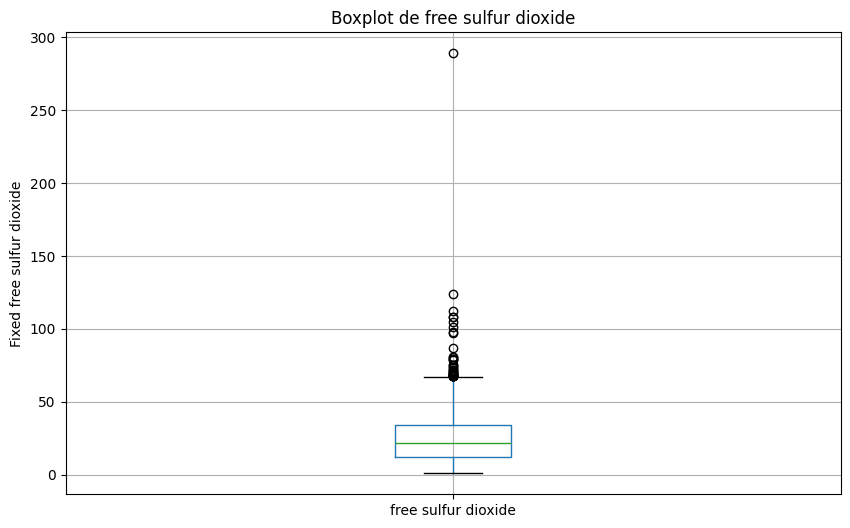

In [18]:
import matplotlib.pyplot as plt

# Descripción de la columna 'free sulfur dioxide'
print(df['free sulfur dioxide'].describe())

# Boxplot de la columna 'free sulfur dioxide'
plt.figure(figsize=(10, 6))
df.boxplot(column='free sulfur dioxide')
plt.title('Boxplot de free sulfur dioxide')
plt.ylabel('Fixed free sulfur dioxide')
plt.grid(True)
plt.show() 

### Columna *'total sulfur dioxide'*
Esta columna nos indica la cantidad total de dióxido de azufre (SO<sub>2</sub>) total presente en el vino, medido en miligramos por litro (mg/L). Es una variable cuantitativa continua.

- `dioxido de azufre total`: está constituido por la suma del anhídrido sulfuroso libre
y el anhídrido sulfuroso combinado.

> *Para mas información, visitar:*
>    - *[El Consejo de Enólogos](http://www.consejodeenologos.com.ar/panel/upload/contenidos/pdf/Microsoft_Word___ANHDRIDO_SULFUROSO_1.pdf)*
>    - *[Vinetur](https://www.vinetur.com/2016011026759/las-propiedades-del-anhidrido-sulfuroso-en-la-elaboracion-del-vino.html)*

count    2547.000000
mean       85.910679
std        53.903112
min         6.000000
25%        37.000000
50%        86.000000
75%       124.000000
max       440.000000
Name: total sulfur dioxide, dtype: float64


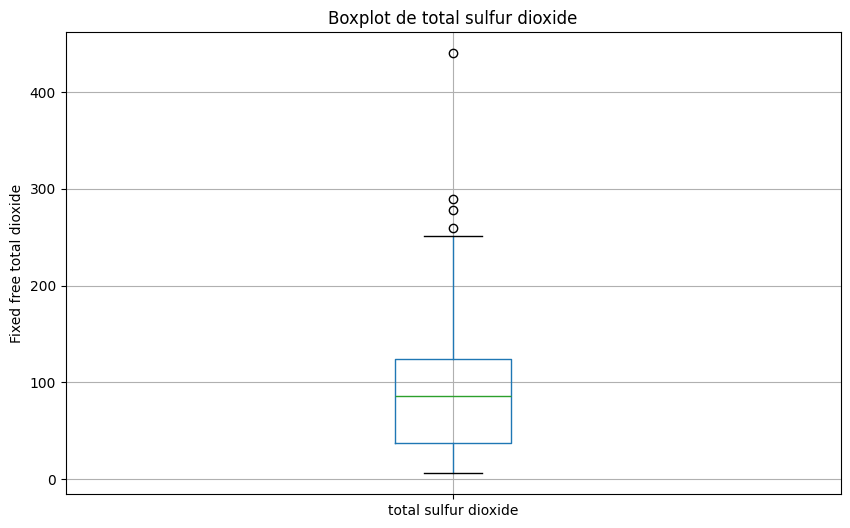

In [19]:
import matplotlib.pyplot as plt

# Descripción de la columna 'total sulfur dioxide'
print(df['total sulfur dioxide'].describe())

# Boxplot de la columna 'total sulfur dioxide'
plt.figure(figsize=(10, 6))
df.boxplot(column='total sulfur dioxide')
plt.title('Boxplot de total sulfur dioxide')
plt.ylabel('Fixed free total dioxide')
plt.grid(True)
plt.show() 



### Columna *'pH'*
Esta columna nos indica el pH del vino. Es una variable cuantitativa continua.

- `pH`: Podemos decir que el pH mide el grado de acidez o de alcalinidad de una disolución obtenida de cualquier elemento o sustancia. Esta unidad de medida se distribuye a lo largo de una escala que va desde el 0 hasta el 14, tomándose el 7 como neutro, siendo los valores más cercanos a 0 los que indican que esa disolución es más ácida y los valores más cercanos a 14 los que indican que esa solución es más alcalina o básica, como también se denomina.
El pH de la mayoría de los vinos se encuentra en el intervalo de 2,8 a 4, lo que lógicamente recae en el lado ácido de la escala. Un vino con un pH de 2,8 es extremadamente ácido mientras que uno con un pH en torno a 4 es plano, carente de acidez.

> *Para mas información, visitar [pH - Aprender de vino](https://www.aprenderdevino.es/ph-y-vino/).*

count    2547.000000
mean        3.244971
std         0.163237
min         2.740000
25%         3.140000
50%         3.240000
75%         3.350000
max         4.010000
Name: pH, dtype: float64


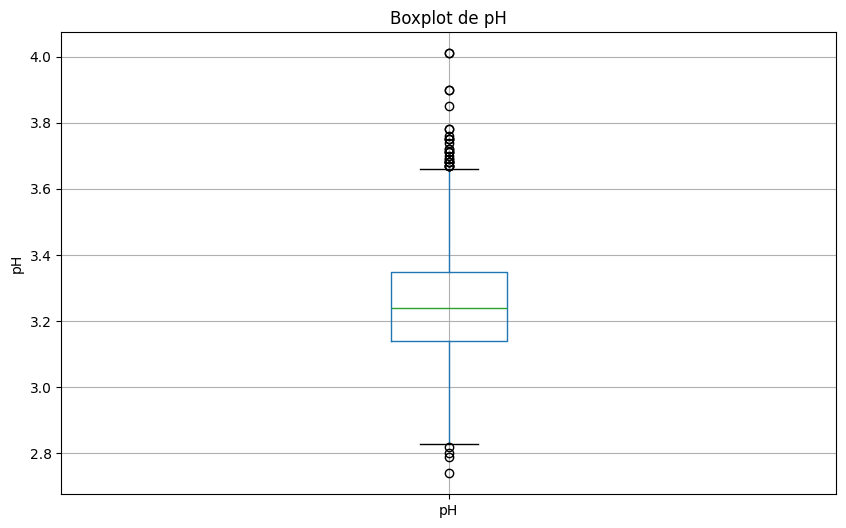

In [20]:
import matplotlib.pyplot as plt

# Descripción de la columna 'pH'
print(df['pH'].describe())

# Boxplot de la columna 'pH'
plt.figure(figsize=(10, 6))
df.boxplot(column='pH')
plt.title('Boxplot de pH')
plt.ylabel('pH')
plt.grid(True)
plt.show() 

### Columna *'sulphates'*
Esta columna nos indica la cantidad de sales de sulfato presentes en el vino, medida en gramos por litro. Es una variable cuantitativa continua.
- `sales de sulfato`: sulfatos en vinos son variados y dependen del suelo, del metabolismo de la planta, de su capacidad de absorción y de las prácticas enológicas llevadas a cabo en bodega. 
Segun la fuente citada, las medidas son:
    1. Vinos secos: UN GRAMO POR LITRO (1,00 g/l)
    2. Vinos edulcorados: UNO CON CINCUENTA GRAMOS POR LITRO (1,50 g/l).
    3. Vinos que posean un contenido de azúcares reductores remanentes naturales de fermentación superior a CUATRO GRAMOS POR LITRO (4 g/l): UNO CON CINCUENTA GRAMOS POR LITRO (1,50 g/l).
    4. Con añejamiento mínimo de DOS (2) años en barrica: UNO CON CINCUENTA GRAMOS POR LITRO (1,50 g/l).
    5. Vinos provenientes de procedimientos especiales de elaboración con denuncia previa ante este Instituto para los controles oficiales pertinentes: DOS GRAMOS POR LITRO (2,00 g/l).

*Para mas informacion, visitar [Vinos - Limites Maximos de contenido de cloruros y sulfatos](http://www.allinsa.com/?p=608).).*

count    2547.000000
mean        0.575304
std         0.166901
min         0.230000
25%         0.470000
50%         0.550000
75%         0.640000
max         2.000000
Name: sulphates, dtype: float64


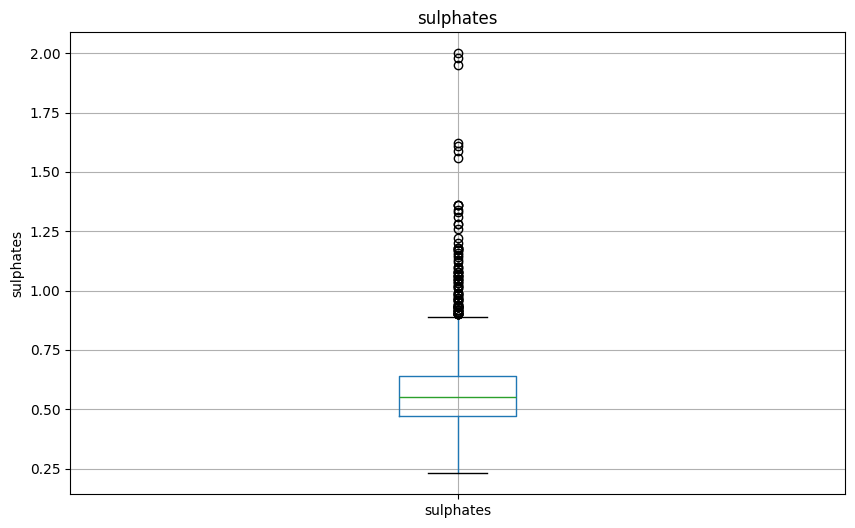

In [21]:
import matplotlib.pyplot as plt

# Descripción de la columna 'sulphates'
print(df['sulphates'].describe())

# Boxplot de la columna 'sulphates'
plt.figure(figsize=(10, 6))
df.boxplot(column='sulphates')
plt.title('sulphates')
plt.ylabel('sulphates')
plt.grid(True)
plt.show()

### Columna *'quality'*
Esta columna nos indica la calidad del vino, con una escala que va de 0 a 10. Es una variable cuantitativa discreta.

In [22]:
print(df['quality'].describe())


count    2547.000000
mean        5.771888
std         0.838598
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64


## Descripcion de las variables numericas
`describe()` del dataframe.

In [23]:
df_agrupado_type = df.groupby('type')

df_agrupado_type.get_group('Moscatel').describe()


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1249.000000       1249.000000   1249.00000     1249.000000   
mean        6.495356          0.285841      0.30486        5.789632   
std         0.722838          0.101327      0.10574        4.532694   
min         3.800000          0.085000      0.00000        0.700000   
25%         6.000000          0.220000      0.25000        1.700000   
50%         6.500000          0.270000      0.29000        4.600000   
75%         6.900000          0.330000      0.34000        8.800000   
max         9.400000          1.100000      1.00000       22.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1249.000000          1249.000000           1249.000000  1249.000000   
mean      0.045052            34.594876            126.972778     0.992850   
std       0.021963            17.758113             38.225221     0.002722   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            100.000000     0.990720   
50%       0.042000            32.000000            122.000000     0.992390   
75%       0.049000            44.000000            150.000000     0.994800   
max       0.271000           289.000000            440.000000     0.999710   

                pH    sulphates      alcohol      quality  
count  1249.000000  1249.000000  1249.000000  1249.000000  
mean      3.172466     0.491657    10.987846     5.925540  
std       0.140242     0.112833     1.269222     0.826288  
min       2.790000     0.230000     8.400000     3.000000  
25%       3.080000     0.410000     9.900000     5.000000  
50%       3.170000     0.480000    11.000000     6.000000  
75%       3.260000     0.560000    12.000000     6.000000  
max       3.760000     1.080000    14.200000     8.000000

In [24]:
df_agrupado_type.get_group('Syrah').describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1298.000000       1298.000000  1298.000000     1298.000000   
mean        8.168336          0.529981     0.264145        2.451233   
std         1.577333          0.183788     0.191917        1.185186   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.800000          0.520000     0.250000        2.200000   
75%         9.075000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       13.900000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1298.000000          1298.000000           1298.000000  1298.000000   
mean      0.087875            15.845917             46.398690     0.996527   
std       0.050186            10.357421             33.339148     0.001664   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.069000             7.000000             21.000000     0.995522   
50%       0.079000            14.000000             38.000000     0.996600   
75%       0.090000            21.000000             62.000000     0.997600   
max       0.611000            72.000000            289.000000     1.000000   

                pH    sulphates      alcohol      quality  
count  1298.000000  1298.000000  1298.000000  1298.000000  
mean      3.314738     0.655794    10.440639     5.624037  
std       0.153127     0.170908     1.078142     0.823952  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.720000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

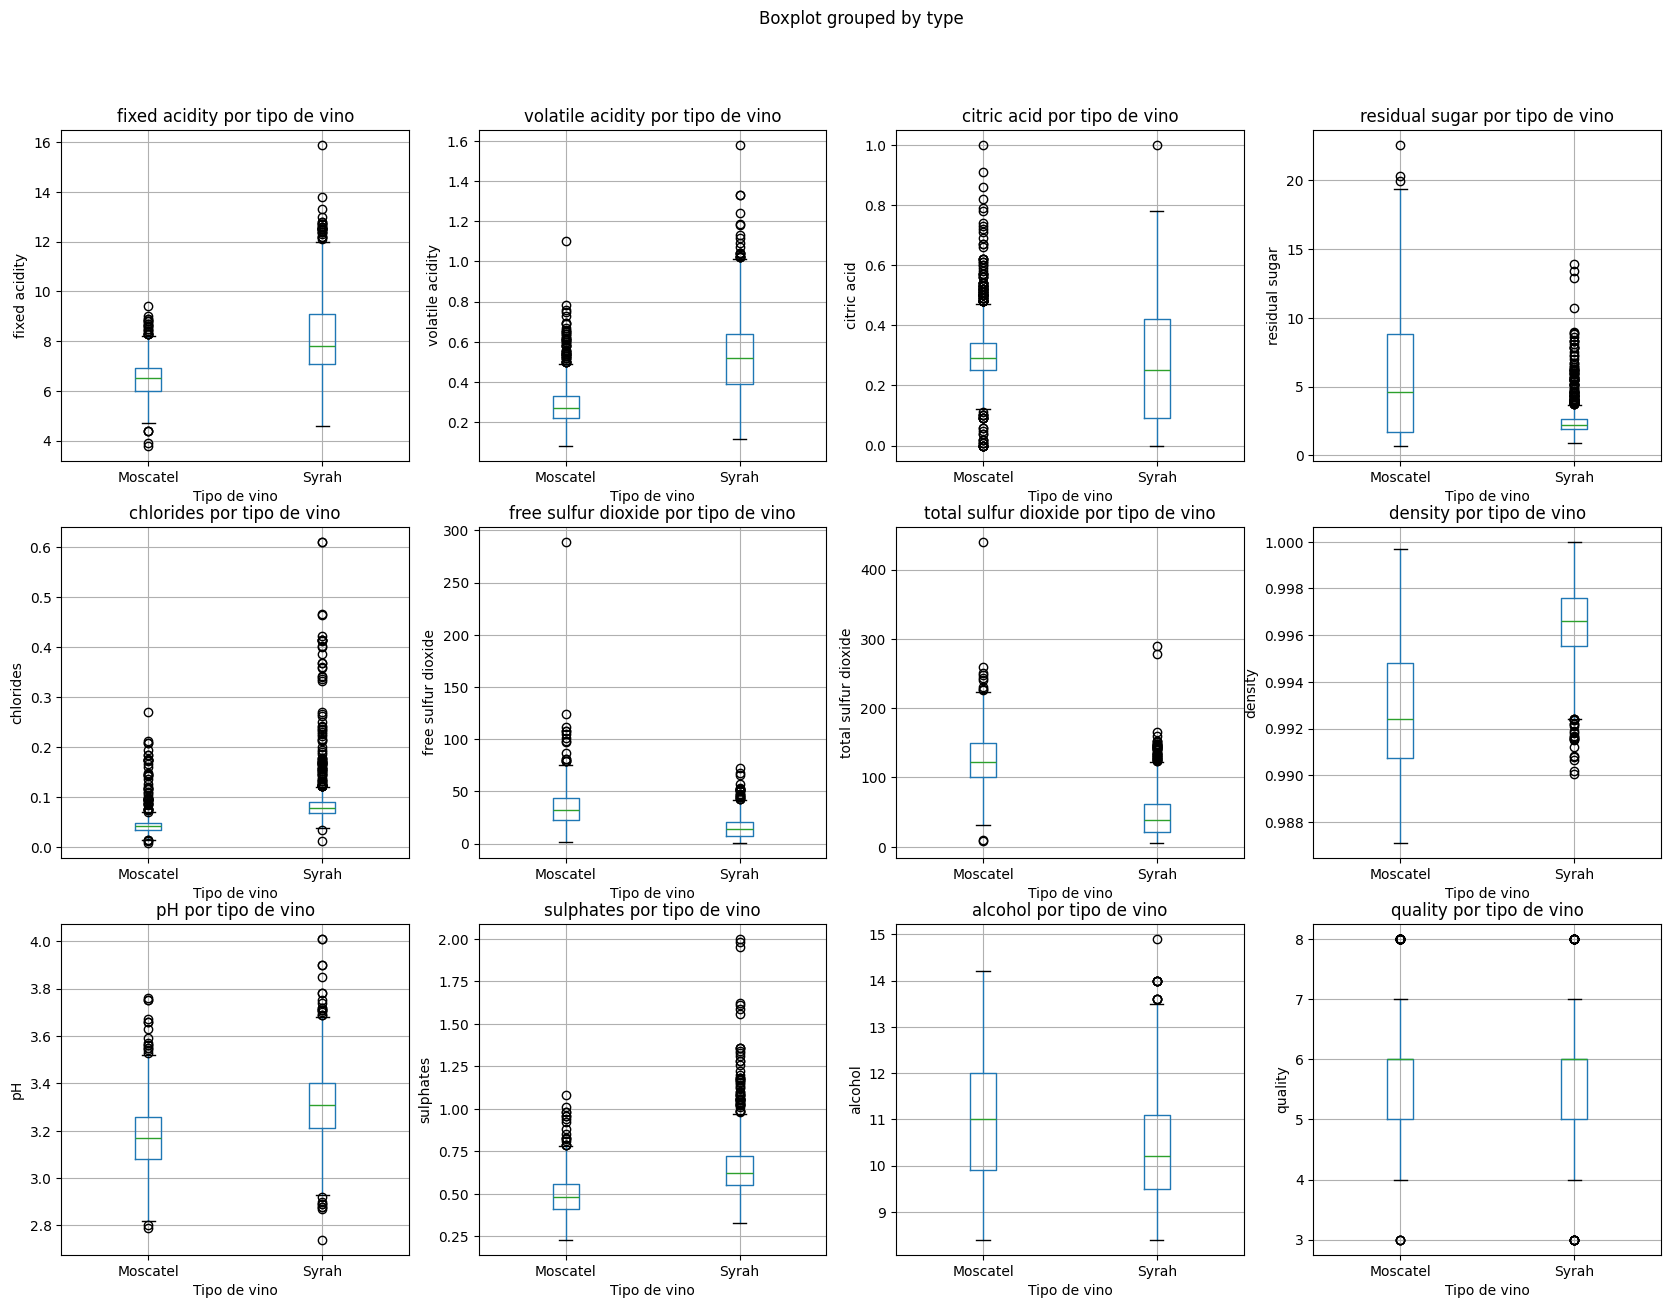

In [25]:
# Define la lista de columnas que deseas graficar
columns = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", 
           "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", 
           "pH", "sulphates", "alcohol", "quality"]

# Crea un boxplot para cada columna agrupado por 'TYPE'
# Ponemos los boxplots uno a alado del otro
fig, axs = plt.subplots(3, 4, figsize=(20, 15)) # 3 filas, 4 columnas
for i, col in enumerate(columns):# Enumeramos las columnas
    ax = axs[i//4, i%4] # Seleccionamos la posición del box plot en la matriz de subplots 
    df.boxplot(column=col, by='type', ax=ax) # Hacemos el boxplot
    ax.set_title(f'{col} por tipo de vino') # Ponemos el título
    ax.set_xticklabels(['Moscatel', 'Syrah'])   # Cambiamos las etiquetas del eje x
    ax.set_xlabel('Tipo de vino') # Ponemos la etiqueta del eje x
    ax.set_ylabel(col) # Ponemos la etiqueta del eje y 


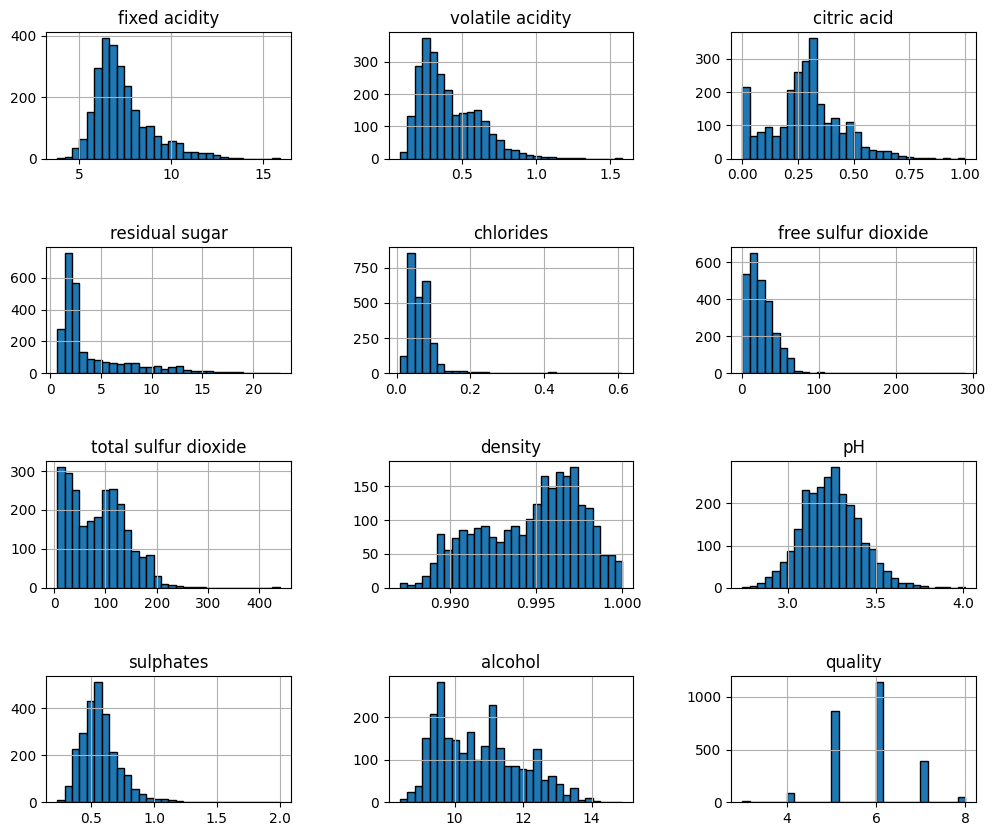

In [26]:
# construimos una serie de histogramas mostrando la distribución de las features
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

# ANALISIS BIVARIADO 

- Buscaremos hacer una matriz de correlacion

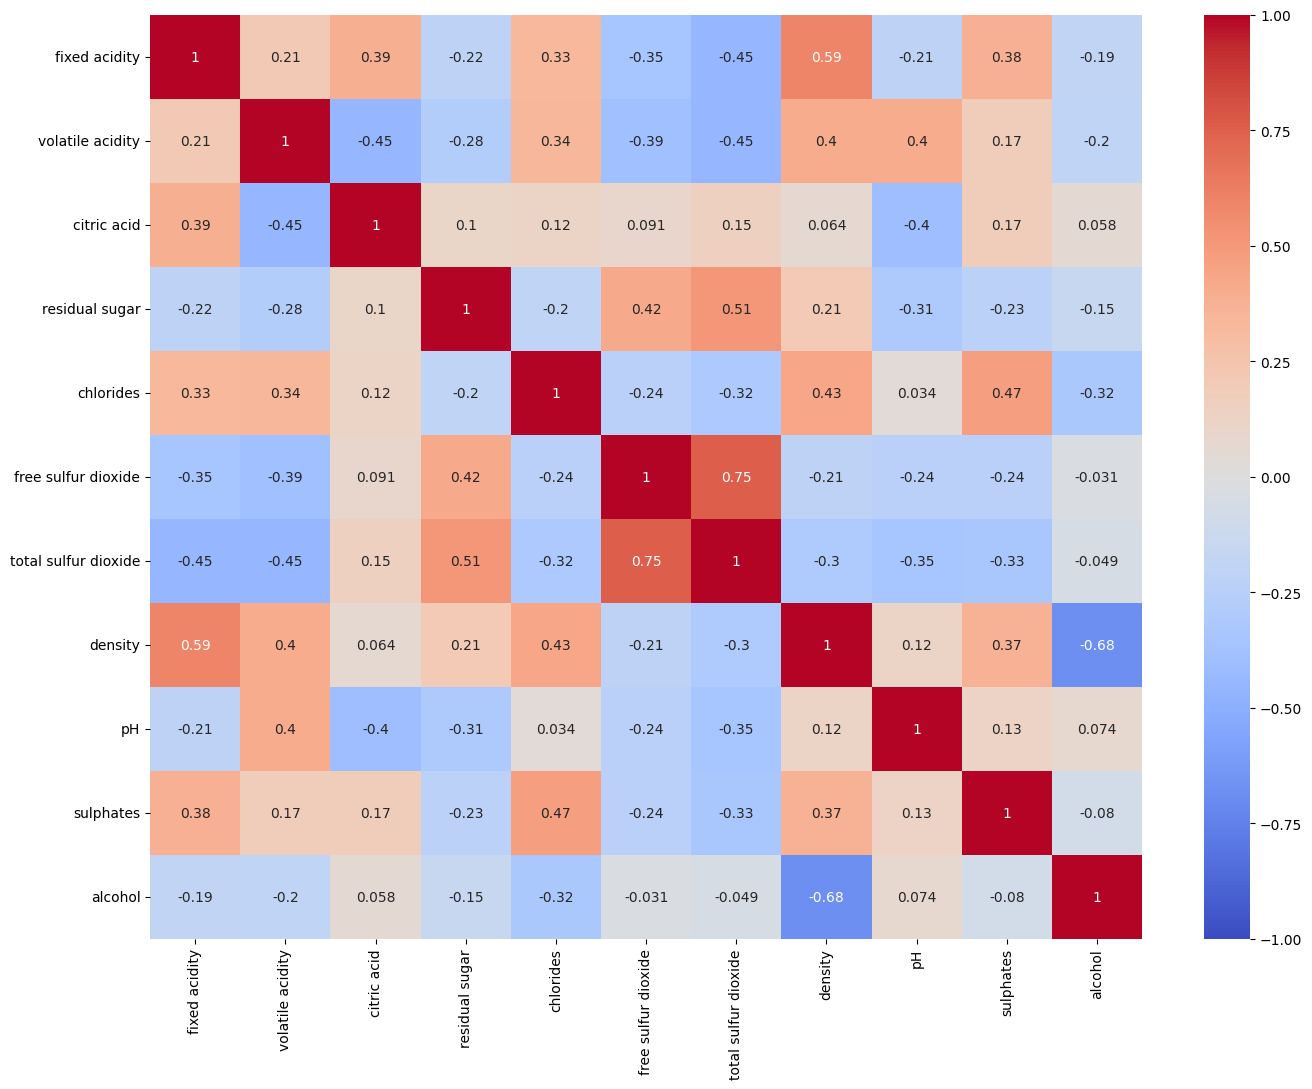

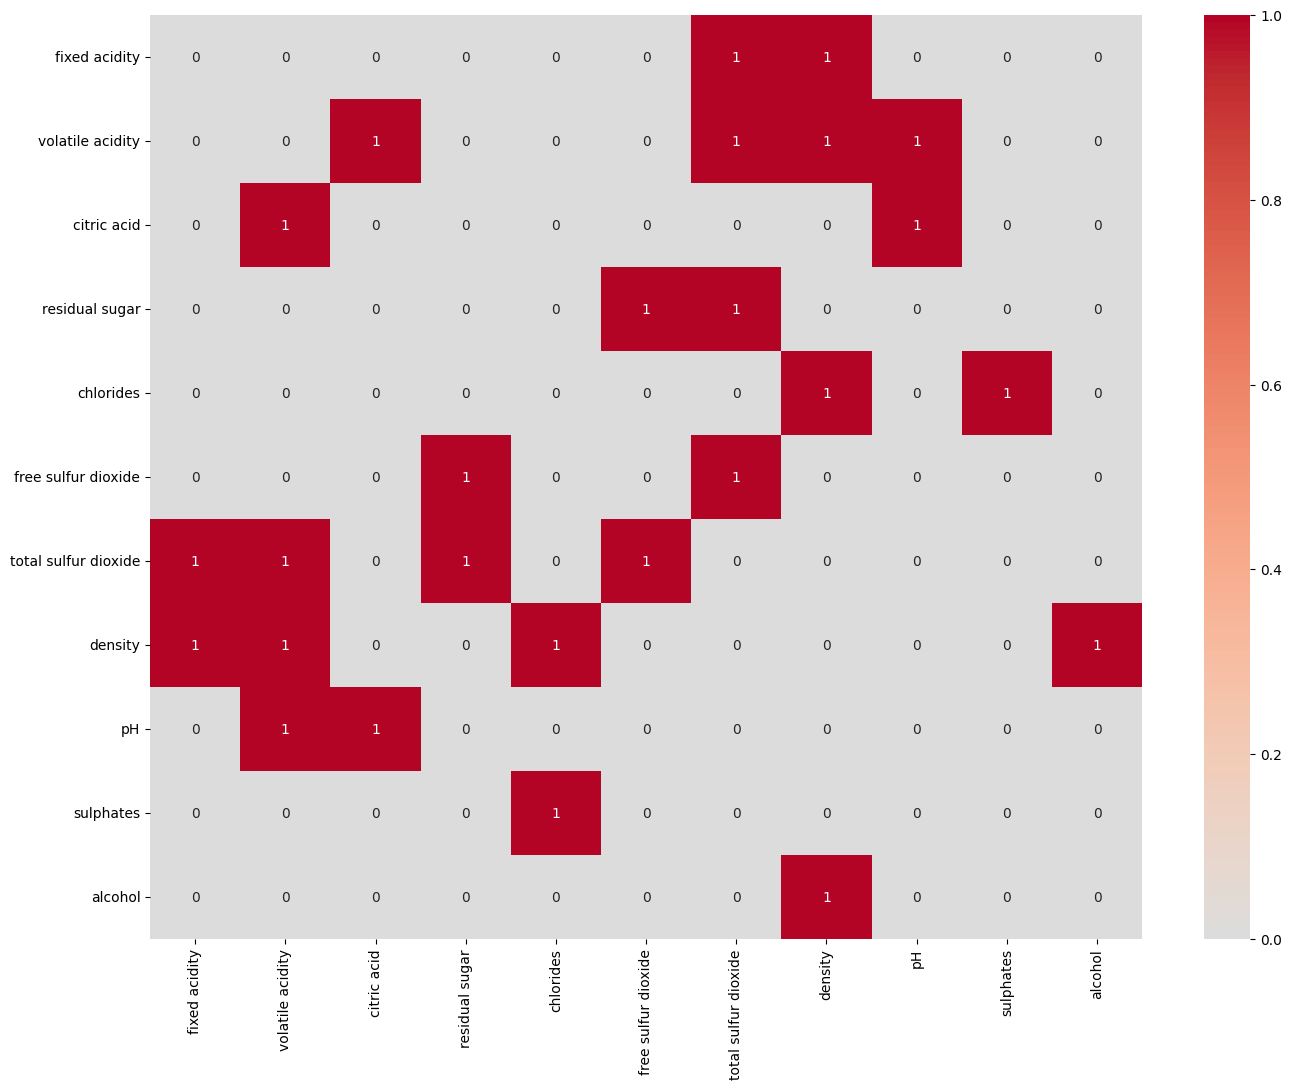

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Excluir la columna 'type' y quality del DataFrame
df_sin_type = df.drop(columns=['type', 'quality'])

# Calcular la matriz de correlación sin la columna 'type'
correlation_matrix = df_sin_type.corr()

# Imprimimos la matriz como un heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.4
correlation_matrix_umbralizada = correlation_matrix.abs() > 0.4

# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix_umbralizada, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

### Primeros analisis de la matriz de correlacion 

- Correlacion que merece ser analizada entre 2 variables ( que se encuentre por arriba de 0.7 (coeficiente de Pearson)) es 1 sola que analizaremos graficamente. Lista de observaciones sobre estas 2 variables.

1. Vemos que las variables viven en el mismo ambito, una de las variables es el total de dioxido de azufre y la otra es el dioxido de azufre libre.

2. La correlacion y la asociacion lineal entre las 2 variables nos puede decir que el cambio en una variable esta altamente asociado con el cambio de la otra lo cual tiene sentido entre estas dos variables porque el dioxido de azufre libre representa una parte del total de dioxido de azufre total. 


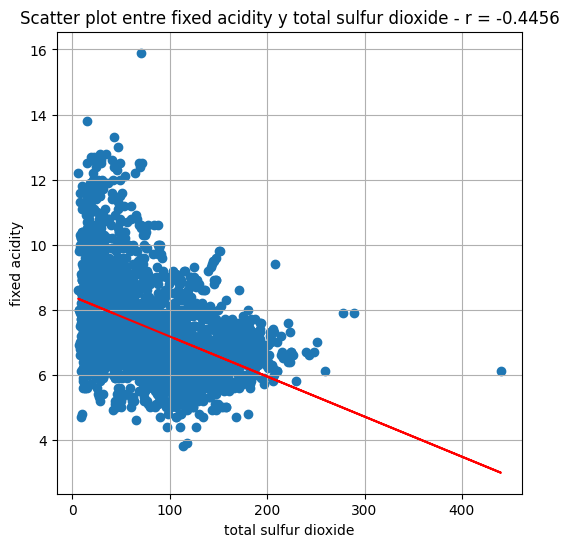

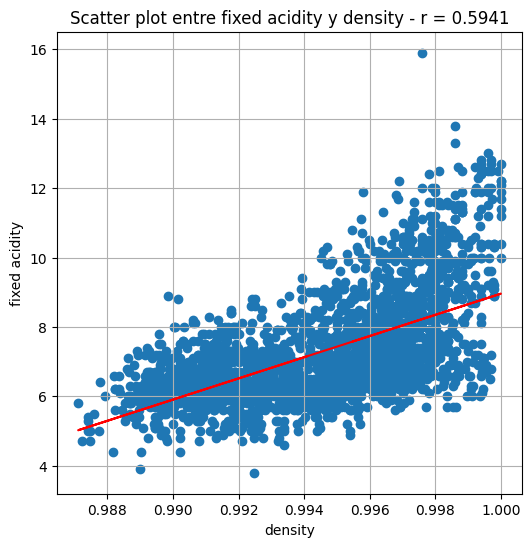

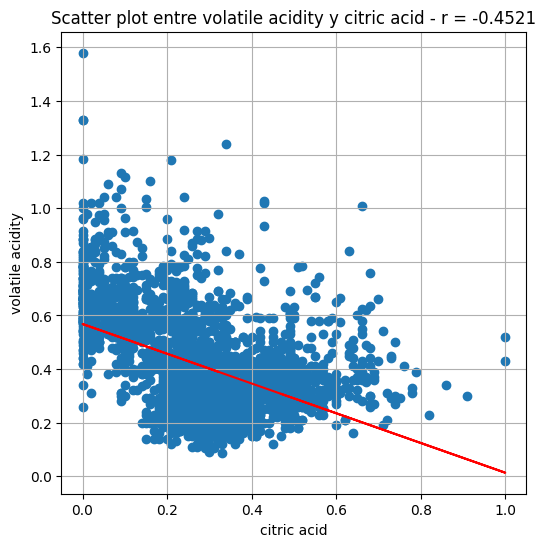

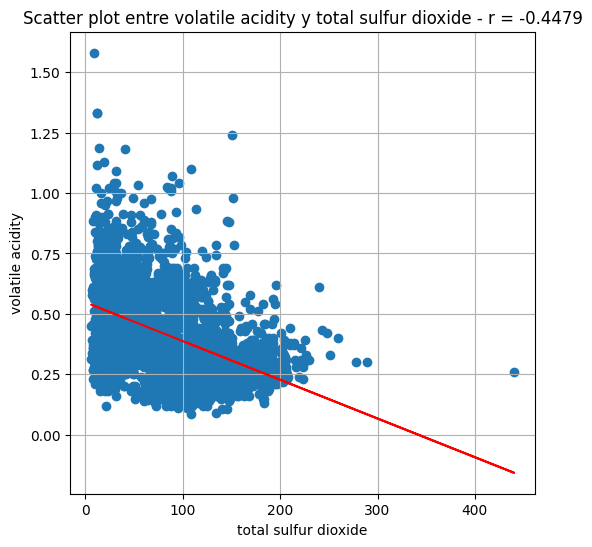

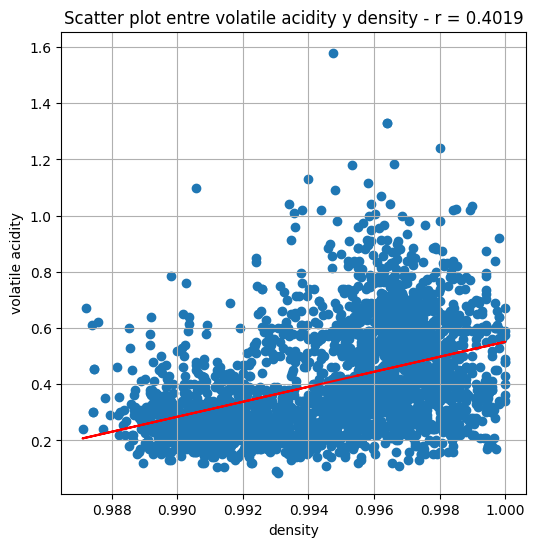

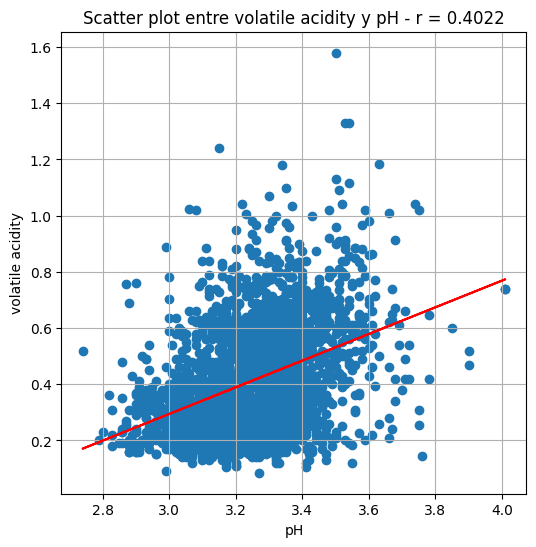

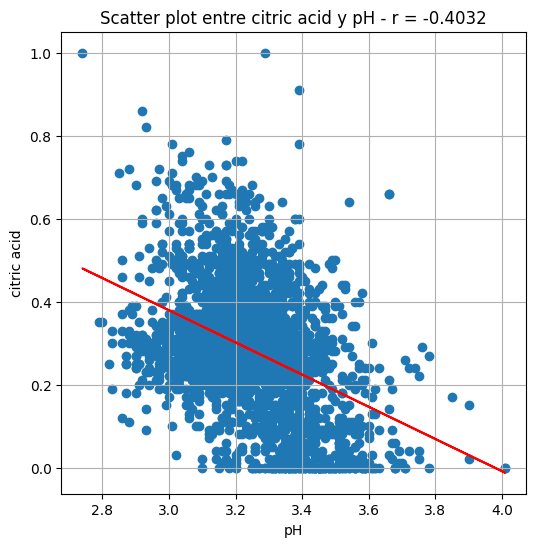

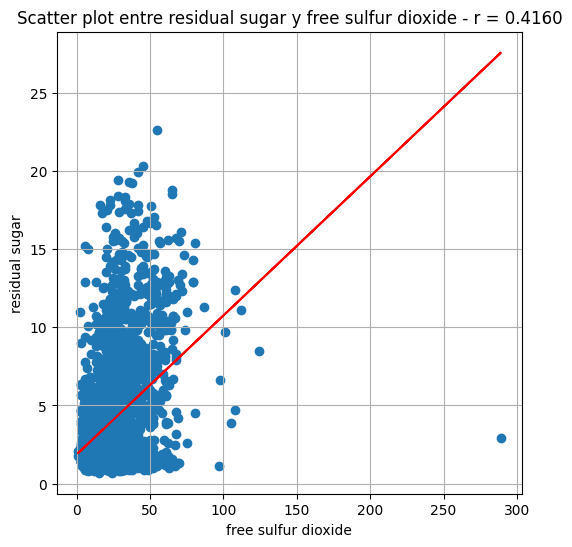

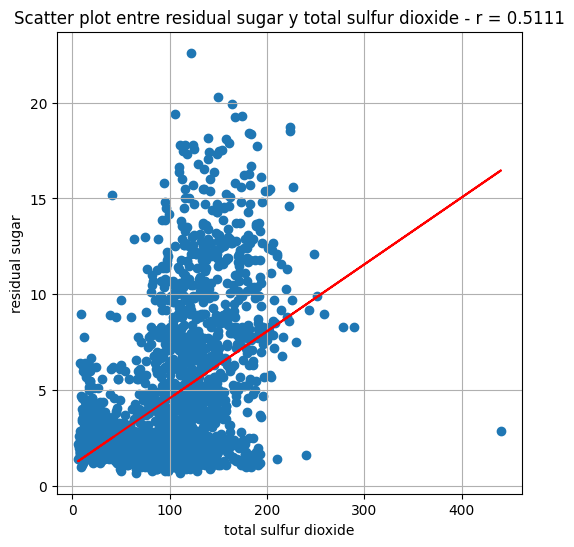

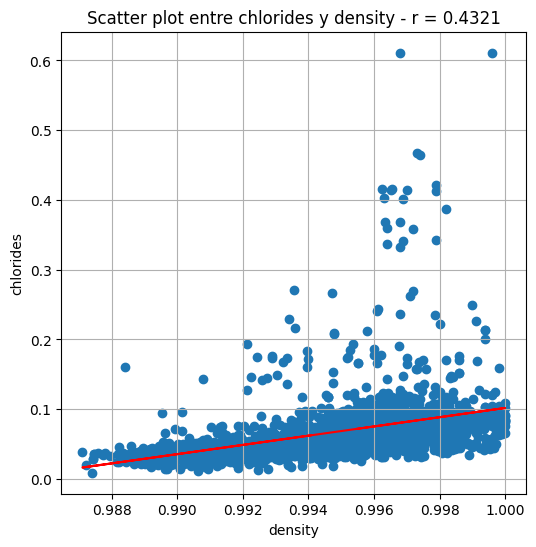

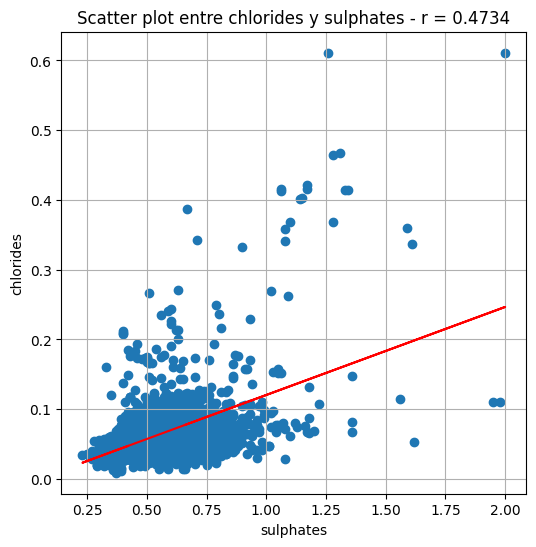

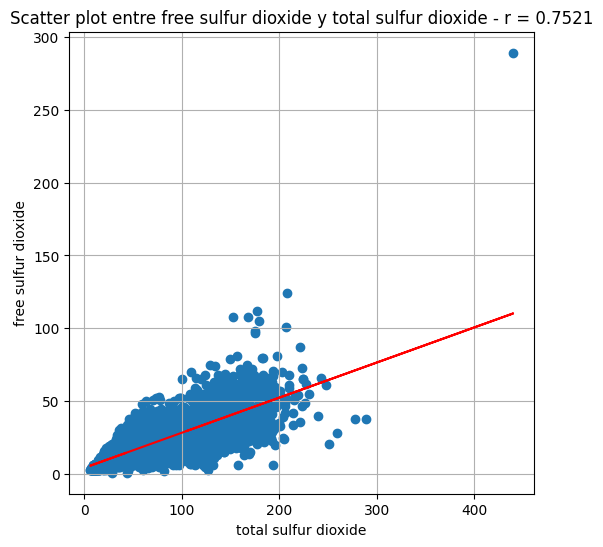

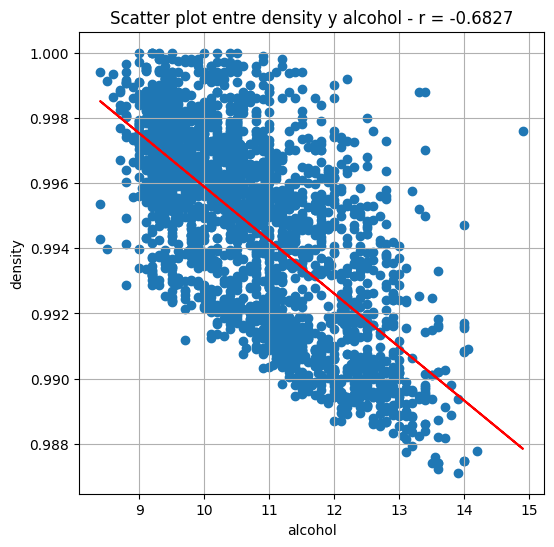

In [28]:
# Lo haremos iterativo por toda la matriz por si queremos luego ver graficos de otras correlaciones en indices que se muevan en < 0.5

# iteramos por cada una de las columnas
for i, col in enumerate(correlation_matrix_umbralizada.columns):
  # y por cada una de las filas (para eso usamos el índice)
  for j in range(i,len(correlation_matrix_umbralizada.index)):
    # extraemos el nombre de la fila en la que estamos
    row = correlation_matrix_umbralizada.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada 
    if correlation_matrix_umbralizada.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = correlation_matrix.loc[row, col]
      # representamos en un scatter plot cuadrado los valores de ambas variables
      plt.figure(figsize=(6, 6))
      plt.scatter(df_sin_type[row], df_sin_type[col])
      # Calcular la línea de regresión(recta que mejor representa la relacion lineal o no entre dos variables en un scatter plot)
      x = df_sin_type[row]
      y = df_sin_type[col]
      m, b = np.polyfit(x, y, 1)  # m es la pendiente, b es el intercepto de la línea de regresión lineal para los datos x y y.
      plt.plot(x, m * x + b, color='red')  # Graficar la línea de regresión
      # y lo mostramos bonito
      plt.title(f"Scatter plot entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.grid(True)
      plt.show()

# Correlaciones elegidas

* Decidimos resaltar y tener presente las siguientes correlaciones ordenadas de mayor dependencia lineal a menor numerica y graficamente.

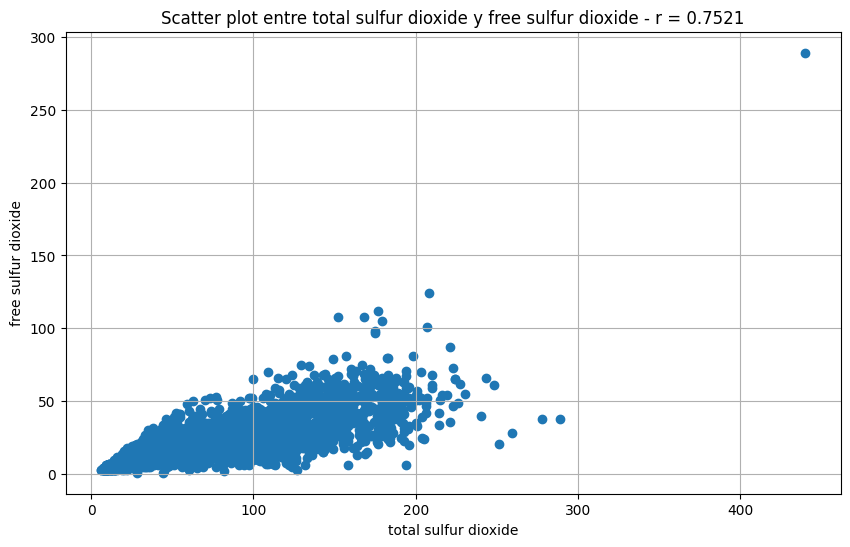

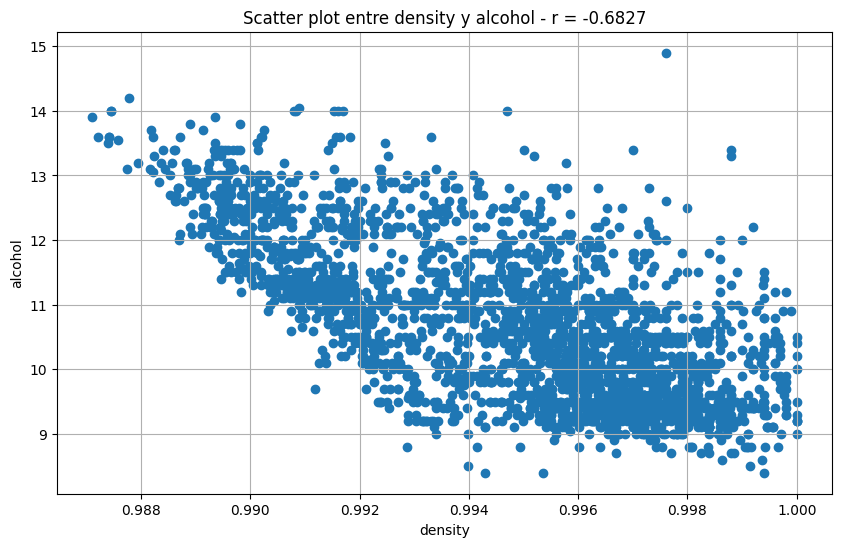

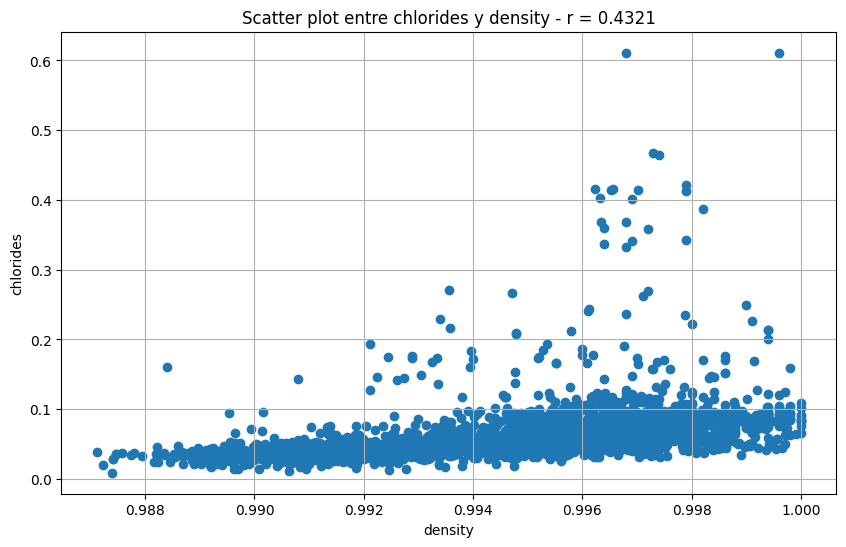

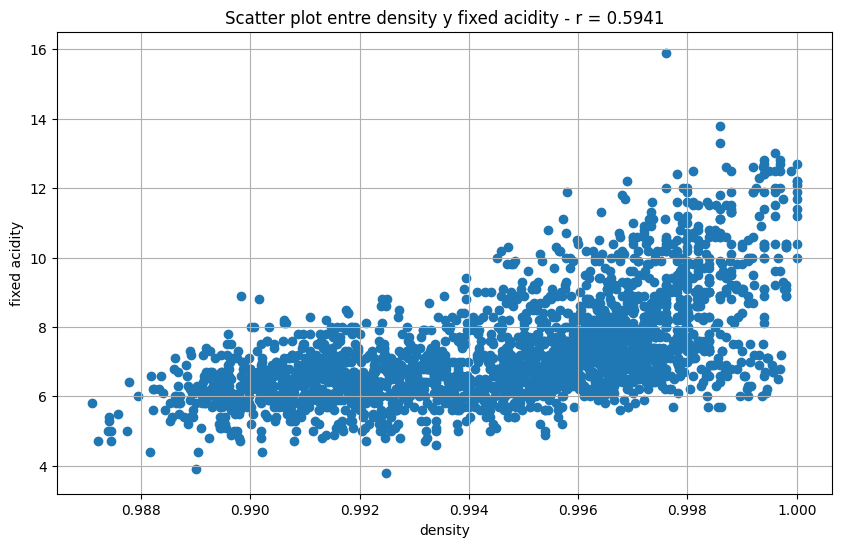

In [29]:
# Correlacion total sulfur dioxide y free sulfur dioxide
# Correlacion chlorides y dens
# Correlacion density y fixed acidity
# Correlacion density y alcohol

plt.figure(figsize=(10, 6))
plt.scatter(df['total sulfur dioxide'], df['free sulfur dioxide'])
# Agregamos valor de correlacion
correlation = df['total sulfur dioxide'].corr(df['free sulfur dioxide'])
plt.title(f'Scatter plot entre total sulfur dioxide y free sulfur dioxide - r = {correlation:.4f}')
plt.xlabel('total sulfur dioxide')
plt.ylabel('free sulfur dioxide')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['density'], df['alcohol'])
# Agregamos valor de correlacion
correlation = df['density'].corr(df['alcohol'])
plt.title(f'Scatter plot entre density y alcohol - r = {correlation:.4f}')
plt.xlabel('density')
plt.ylabel('alcohol')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['density'], df['chlorides'])
# Agregamos valor de correlacion
correlation = df['density'].corr(df['chlorides'])
plt.title(f'Scatter plot entre chlorides y density - r = {correlation:.4f}')
plt.xlabel('density')
plt.ylabel('chlorides')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['density'], df['fixed acidity'])
# Agregamos valor de correlacion
correlation = df['density'].corr(df['fixed acidity'])
plt.title(f'Scatter plot entre density y fixed acidity - r = {correlation:.4f}')
plt.xlabel('density')
plt.ylabel('fixed acidity')
plt.grid(True)
plt.show()

* Hacemos un poco mas de analisis univariado de total sulfur dioxide y free sulfur dioxide. 

En el contexto de Matplotlib, fig y axs son los objetos devueltos por la función plt.subplots, que se utiliza para crear una figura y una cuadrícula de subplots.

fig: Es una instancia de la clase Figure de Matplotlib. Representa la figura completa o el contenedor de todos los elementos gráficos (subplots, títulos, etiquetas, etc.). Puedes usar fig para ajustar propiedades de la figura global, como el tamaño, el título, y para guardar la figura en un archivo.

axs: Es un array de objetos Axes (o un solo objeto Axes si solo hay un subplot). Cada objeto Axes representa un subplot individual dentro de la figura. Puedes usar axs para ajustar propiedades específicas de cada subplot, como los títulos, etiquetas de los ejes, y los datos que se van a graficar.

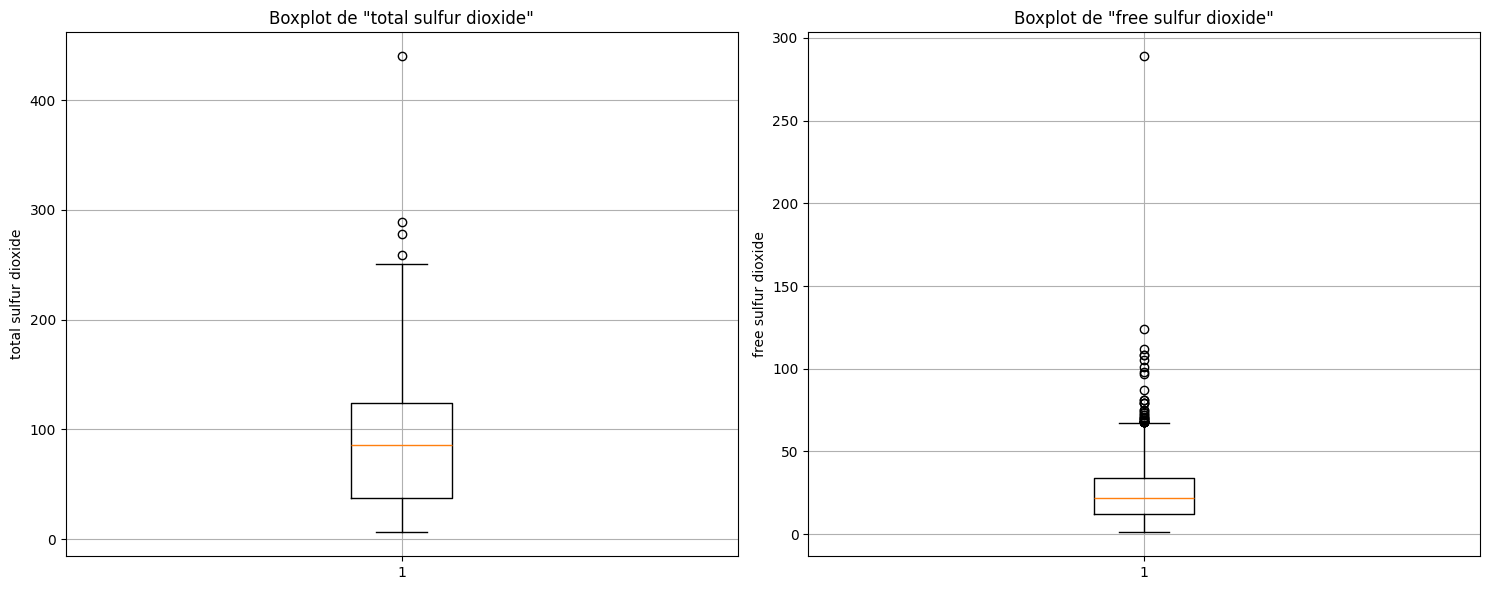

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Crear una figura con dos subplots uno al lado del otro
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot de la columna 'total sulfur dioxide'
axs[0].boxplot(df['total sulfur dioxide'])
axs[0].set_title('Boxplot de "total sulfur dioxide"')
axs[0].set_ylabel('total sulfur dioxide')
axs[0].grid(True)

# Boxplot de la columna 'free sulfur dioxide'
axs[1].boxplot(df['free sulfur dioxide'])
axs[1].set_title('Boxplot de "free sulfur dioxide"')
axs[1].set_ylabel('free sulfur dioxide')
axs[1].grid(True)

# Ajustar el layout para que no se solapen los títulos y etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [31]:
# Nos preguntamos ahora si en nuestro DF habra valores de total dioxide sulfur que sean menores a los de free sulfur dioxide
# Ambos estan medidos en miligramos por litro pero no tendria sentido que se encuentre un valor de total sulfur dioxide menor a free sulfur dioxide

filtrado_df = df[df['total sulfur dioxide'] < df['free sulfur dioxide']]
print(filtrado_df)

Empty DataFrame
Columns: [type, fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []


3. Bueno vimos y entendimos mas la correlacion entre estas dos variables, analizamos no tener muestras erroneas ( donde haya mas free sulfur dioxide que el total de sulfur dioxide ) pero no parece suficiente este analisis bivariado para entender un poco mas del univariado el comportamiento de las variables.

- Analizamos el reporte de Pandas Profiling 

In [32]:
import pandas as pd
import pandas_profiling as pp 
# Tuvimos que bajar la version de numpy a 2.0.0 para que funcione
# Tuvimos que bajar pip install setuptools El error ModuleNotFoundError: No module named 'pkg_resources' indica que falta el módulo pkg_resources, que es parte del paquete setuptools. Puedes resolver este problema instalando setuptools.
# Tuvimos que bajar pip install ipywidgets para que funcione
# generamos el reporte
#report = pp.ProfileReport(df)
# lo mostramos interactivo en nuestra notebook
#report.to_notebook_iframe()
# lo guardamos como un archivo
#report.to_file(output_file="reporte_df_vino_31_10.html")

C:\Users\tomyd\AppData\Local\Temp\ipykernel_15096\975514917.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


# Analisis del Pandas Profiling


* Veamos que esta pasando con las filas duplicadas, cuantas tenemos, si es posible eliminarlas o que resolver con ellas dentro del contexto de una muestra fisicoquimica

In [33]:
#Cantidad de filas
filas = df.shape[0]
print("Cantidad de filas: ", filas)
#Cantidad de filas duplicadas
duplicados = df.duplicated().sum()
print("Cantidad filas duplicadas: ", duplicados)
#Porceentaje de filas duplicadas
porcentaje_duplicados = duplicados / filas * 100
print("Porcentaje de filas duplicadas: ", porcentaje_duplicados)

Cantidad de filas:  2547
Cantidad filas duplicadas:  0
Porcentaje de filas duplicadas:  0.0


Que pasaria si eliminamos estas filas duplicadas? Como nos quedaria el dataset?

In [34]:
#Copiamos el df en uno nuevo para trabajar 
df_sin_duplicados = df.copy()
#Eliminamos los duplicados
df_sin_duplicados.drop_duplicates(keep="first", inplace=True)
#Cantidad de filas sin duplicados
filas_sin_duplicados = df_sin_duplicados.shape[0]
print("Cantidad de filas sin duplicados: ", filas_sin_duplicados)
# contamos la cantidad de duplicados
duplicados = df_sin_duplicados.duplicated().sum()
print("Cantidad de filas duplicadas: ", duplicados)
#Hacemos un describe de las columnas
df_sin_duplicados.describe()

Cantidad de filas sin duplicados:  2547
Cantidad de filas duplicadas:  0


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    2547.000000       2547.000000  2547.000000     2547.000000   
mean        7.347939          0.410259     0.284111        4.088320   
std         1.491070          0.192722     0.157030        3.684126   
min         3.800000          0.085000     0.000000        0.700000   
25%         6.400000          0.260000     0.200000        1.800000   
50%         7.000000          0.360000     0.280000        2.400000   
75%         8.000000          0.540000     0.370000        5.000000   
max        15.900000          1.580000     1.000000       22.600000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  2547.000000          2547.000000           2547.000000  2547.000000   
mean      0.066876            25.040047             85.910679     0.994724   
std       0.044474            17.236906             53.903112     0.002902   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.042000            12.000000             37.000000     0.992355   
50%       0.059000            22.000000             86.000000     0.995360   
75%       0.080000            34.000000            124.000000     0.997000   
max       0.611000           289.000000            440.000000     1.000000   

                pH    sulphates      alcohol      quality  
count  2547.000000  2547.000000  2547.000000  2547.000000  
mean      3.244971     0.575304    10.708979     5.771888  
std       0.163237     0.166901     1.206920     0.838598  
min       2.740000     0.230000     8.400000     3.000000  
25%       3.140000     0.470000     9.600000     5.000000  
50%       3.240000     0.550000    10.500000     6.000000  
75%       3.350000     0.640000    11.500000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

* Conclusion de las filas repetidas: Decidimos no eliminar las filas repetidas ya que no tenemos acceso al dueño de los datos para poder saber si esto es algo que puede ocurrir o no, otro motivo por el cual tambien nos decidimos por esta decision es que la muestra proviene de la misma bodega por lo que tener muestras repetidas creemos y asumimos que puede llegar a ocurrir.

* Correccion de la conclusion logramos entender a las filas repetidas como ruido ya que es muy dificil que en la exatitud que tienen los datos haya tanta repeticion 

- Dejamos los resultados del analisis ya que este cambio lo vamos a realizar al principio del archivo asi podemos mirar de nuevo todos los analisis

Cantidad de filas sin duplicados:  2547
Cantidad de filas duplicadas:  0

# ANALISIS MULTIVARIADO

## PCA 

* Comenzaremos creando una copia del df para trabajar aplicando PCA sobre el. 
* Aunque no es obligatorio tambien vamos a estandarizar los datos antes de aplicar PCA, esto decidimos hacerlo porque PCA se basa en la varianza de los datos. 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


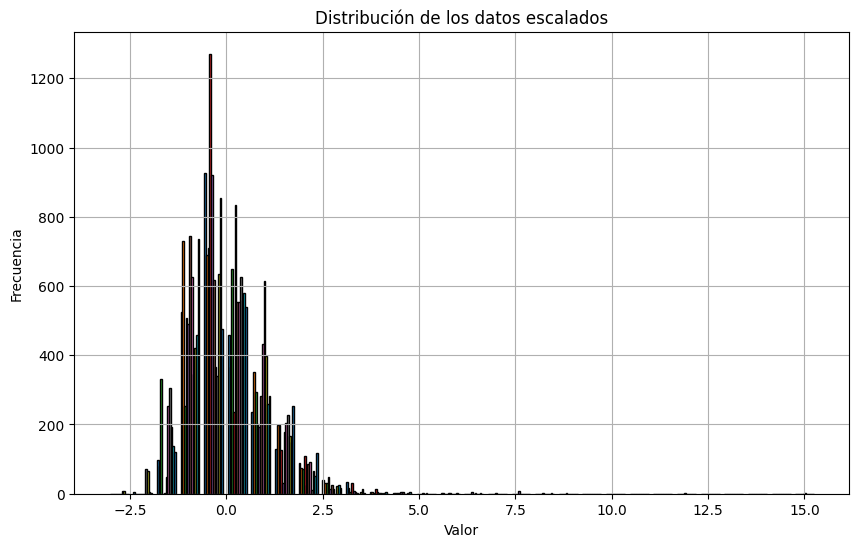

In [35]:
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Creamos un nuevo dataframe para trabajar en él.
df_pca = df.copy()
# Sacamos la variable type ya que es categórica
df_pca = df_pca.drop(columns=['type', 'quality'])
# Creamos un objeto StandardScaler
scaler = StandardScaler()
# Escalamos los datos
df_pca_scaled = scaler.fit_transform(df_pca)
print(np.std(df_pca_scaled, axis=0)) # Vemos que la desviación estándar es 1

# Graficamos la distribucion de los datos escalados
plt.figure(figsize=(10, 6))
plt.hist(df_pca_scaled, bins=30, edgecolor='black')
plt.title('Distribución de los datos escalados')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()  

* Con los datos estandarizados y con variables cuantitativas podemos aplicar PCA buscando en principio reducir a 2 dimensiones 

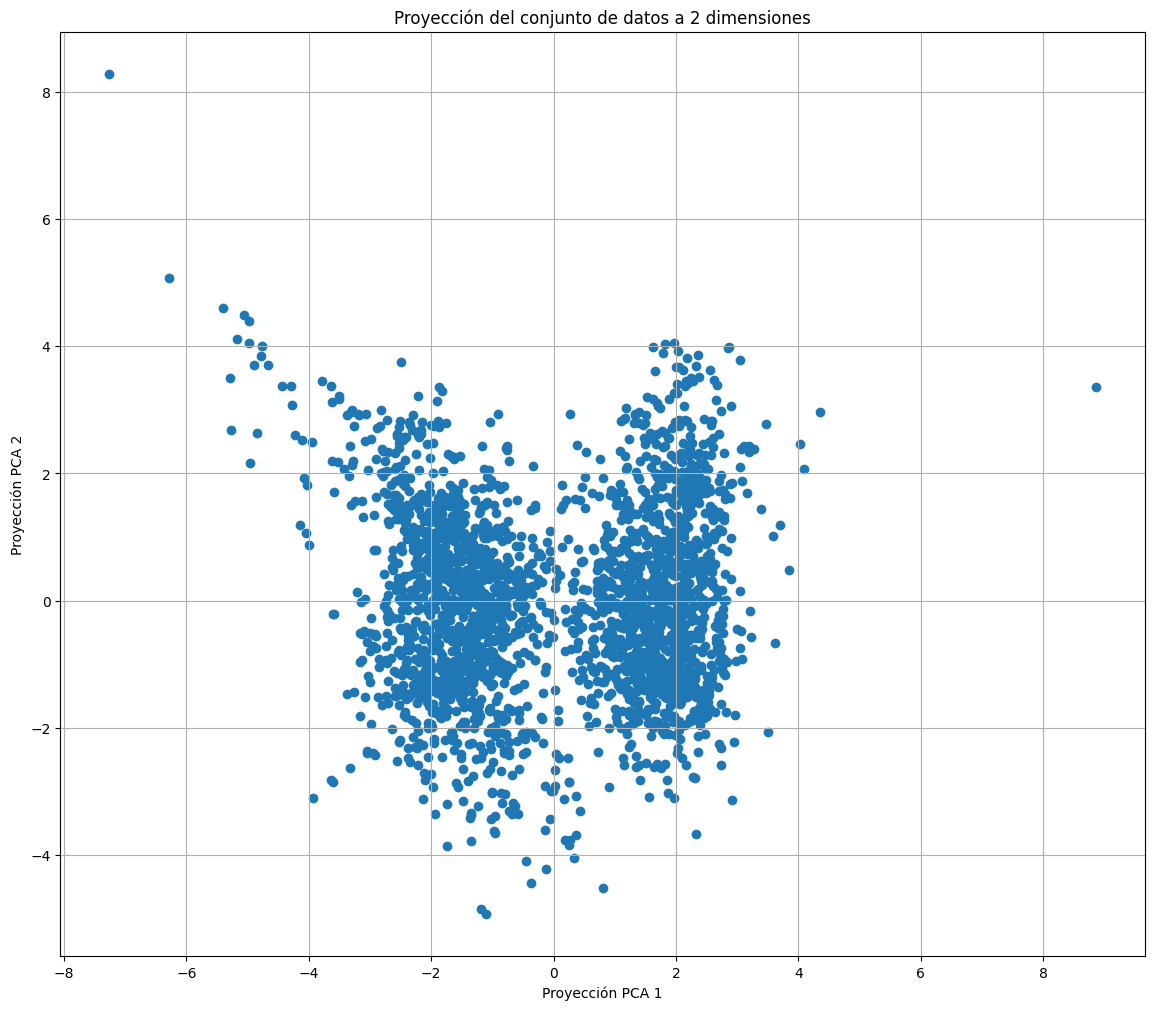

Antes de PCA: (2547, 13)
Después de PCA: (2547, 2)


{'n_components': 2,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'n_features_in_': 11,
 '_fit_svd_solver': 'covariance_eigh',
 'mean_': array([-3.12449102e-16, -4.46355861e-17,  7.81122756e-17, -8.92711721e-17,
        -4.46355861e-17,  0.00000000e+00,  1.33906758e-16, -2.22731574e-14,
         3.70475364e-15, -5.35627033e-16,  6.02580412e-16]),
 'noise_variance_': np.float64(0.5808826616293125),
 'n_samples_': 2547,
 'n_components_': 2,
 'components_': array([[-0.33170378, -0.35336368,  0.04927749,  0.25126454, -0.33091007,
          0.36902772,  0.42352249, -0.34331992, -0.18902479, -0.30769972,
          0.16190208],
        [ 0.32546879, -0.19183046,  0.42670456,  0.32395616,  0.20588697,
          0.19412944,  0.20702109,  0.36761139, -0.40644962,  0.15329794,
         -0.3513882 ]]),
 'explained_variance_': array([3.56895668, 2.20741987]),
 'expl

In [36]:
# Creamos un objeto PCA
pca = PCA(n_components=2)   
# Ajustamos el PCA a los datos escalados fit lo que hace es calcular los componentes principales y ajustas las transformaciones lineales y transform lo que hace es aplicar la transformación lineal a los datos
df_pca_scaled_fitTransform = pca.fit_transform(df_pca_scaled)
# Graficamos
plt.figure(figsize=(14, 12))
plt.scatter(df_pca_scaled_fitTransform[:, 0], df_pca_scaled_fitTransform[:, 1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

# imprimimos los tamaños antes y después
print('Antes de PCA: {}'.format(df.shape))
print('Después de PCA: {}'.format(df_pca_scaled_fitTransform.shape))

pca.__dict__


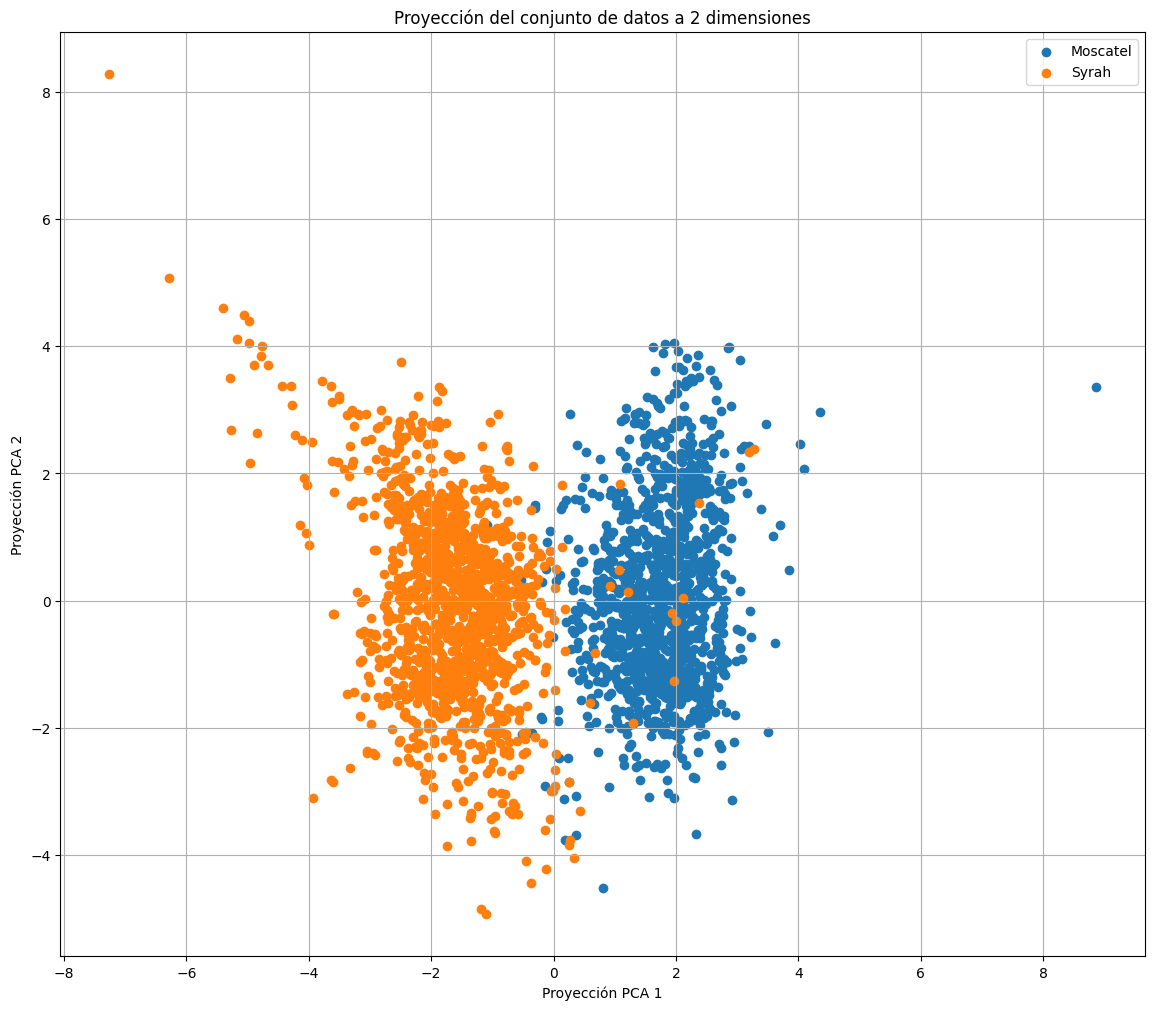

In [37]:
# Grafiquemos los datos discriminando por tipo de vino 
plt.figure(figsize=(14, 12))
plt.scatter(df_pca_scaled_fitTransform[df['type'] == 'Moscatel', 0], df_pca_scaled_fitTransform[df['type'] == 'Moscatel', 1], label='Moscatel')
plt.scatter(df_pca_scaled_fitTransform[df['type'] == 'Syrah', 0], df_pca_scaled_fitTransform[df['type'] == 'Syrah', 1], label='Syrah')
# graficamos con un cmap para que se vea mejor la calidad del vino
#plt.scatter(df_pca_scaled_fitTransform[:, 0], df_pca_scaled_fitTransform[:, 1], c=df['quality'], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.legend()
#plt.colorbar()
plt.show()


* Conclusiones del grafico: 
1. Podemos distinguir dos grupos separados por el valor 0 de x, el grupo de la izquierda podemos ver que esta mas compacto ( syrah ) mientras que el de la derecha un poco mas estirado ( moscatel ). 'explained_variance_': array([3.57250493, 2.25440361])
            'explained_variance_ratio_': array([0.32466875, 0.20487988]),

2. Gracias al PCA_DICT_ podemos analizar varias cosas
    - Anteriormente teniamos 11 variables (todas menos type y quality) por lo que la varianza total es la suma de la varianza de cada variable ( 11 porque estandarizamos ) 
    - Luego de aplicar PCA reducimos nuestras variables a 2 por lo que ahora nuestra suma de varianzas ( explained_variance_ ) es de 5.82, no llegamos ni a explicar la mitad de la varianza total
    - explained_variance_ratio nos esta dando un porcentaje de cuanta varianza podemos explicar mas o menos 52%, es bajo estamos lejor de poder explicar un numero cercano al 95% de la varianza total

3. Podemos asociar esto con el analisis de correlacion previo, no encontramos correlaciones ( dependencia lineal entre variables ) que superen el numero que es recomendable estudiar que son correlaciones mayores a 0,7. PCA solo considera relaciones lineales, no sera capaz de encontrar patrones no lineales que puedan ser complejos y que esten presentes en los datos.

## T-SNE

* Dado que no vimos buenos resultados en PCA, analizaremos t-SNE que nos podra ayudar a ver los datos en alta dimensionalidad y no es lineal
* t-SNE trabaja con distancias por lo que creemos que estandarizar los datos nos va a ayudar a que esas distancias sean mas representativas y no tiren los valores altos

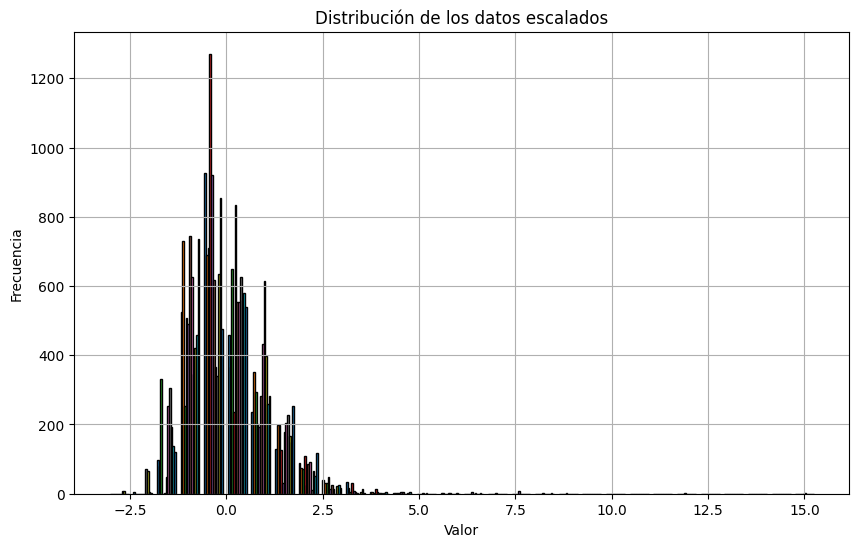

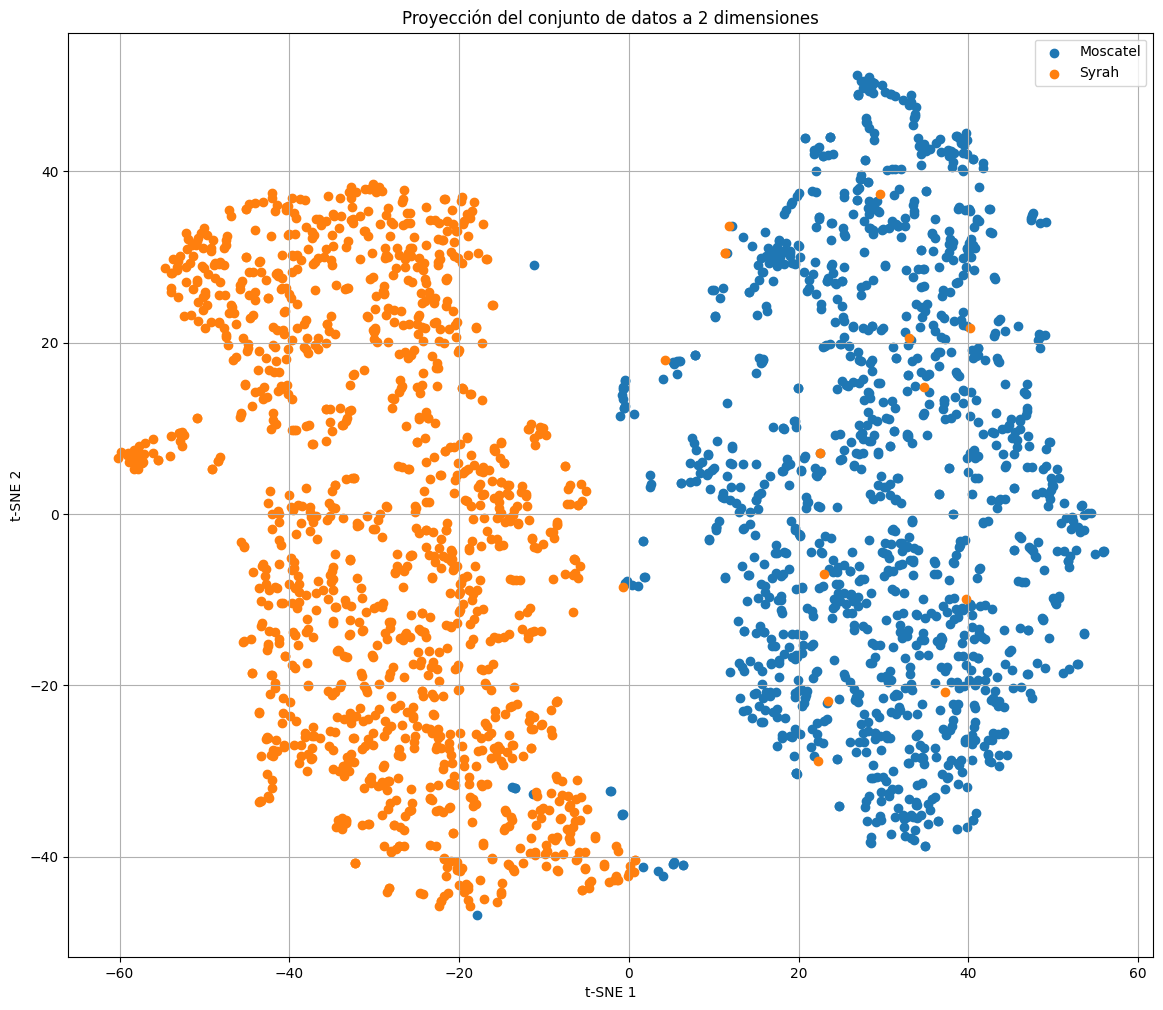

In [38]:
# importamos el t-SNE
from sklearn.manifold import TSNE

# Creamos un nuevo dataframe para trabajar en él.
df_tsne = df.copy()
# Sacamos la variable type ya que es categórica
df_tsne = df_tsne.drop(columns=['type', 'quality'])
# Creamos un objeto StandardScaler
scaler = StandardScaler()
# Escalamos los datos
df_tsne_scaled = scaler.fit_transform(df_tsne)
# Graficamos los datos escalados
plt.figure(figsize=(10, 6))
plt.hist(df_tsne_scaled, bins=30, edgecolor='black')
plt.title('Distribución de los datos escalados')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Creamos un objeto TSNE elegimos 2 componentes porque intuimos que el tipo de vino puede determinarse con 2 componentes
tsne = TSNE(n_components=2, random_state=10).fit_transform(df_tsne_scaled)
# Graficamos con el color de la variable type por tipo de vino
plt.figure(figsize=(14, 12))
plt.scatter(tsne[df['type'] == 'Moscatel', 0], tsne[df['type'] == 'Moscatel', 1], label='Moscatel')
plt.scatter(tsne[df['type'] == 'Syrah', 0], tsne[df['type'] == 'Syrah', 1], label='Syrah')
#plt.scatter(tsne[:, 0], tsne[:, 1], c = df['quality'], cmap='viridis')
plt.grid(True)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.legend()
#plt.colorbar()
plt.show()


* Conclusiones de t-SNE
1. Vemos un comportamiento casi dividio por el 0 en t-SNE 1 entre los tipos de vino 
2. Adicionalmente podemos ver que algunas muestras de Syrah viven en el grupo de Moscatel

# CLUSTERING

* Antes de comenzar a buscar clusters vamos a definir dos df a partir de df, uno estandarizado y otro normalizado


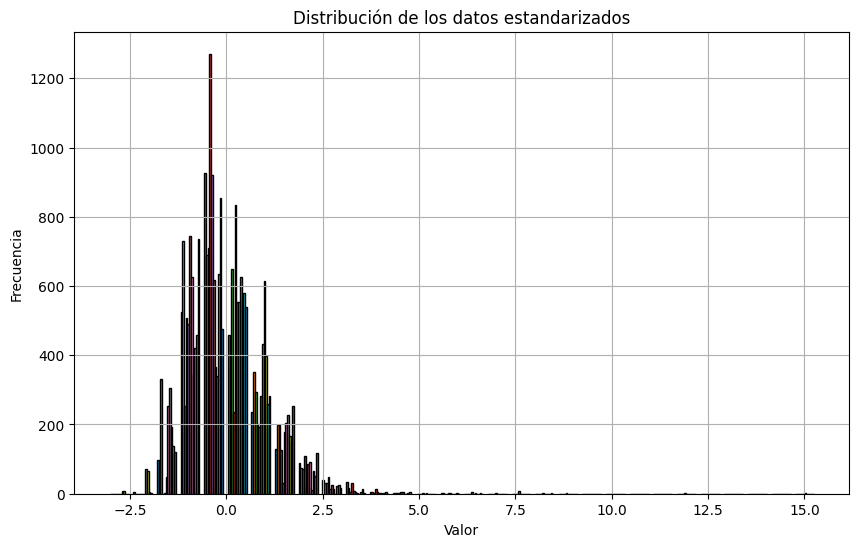

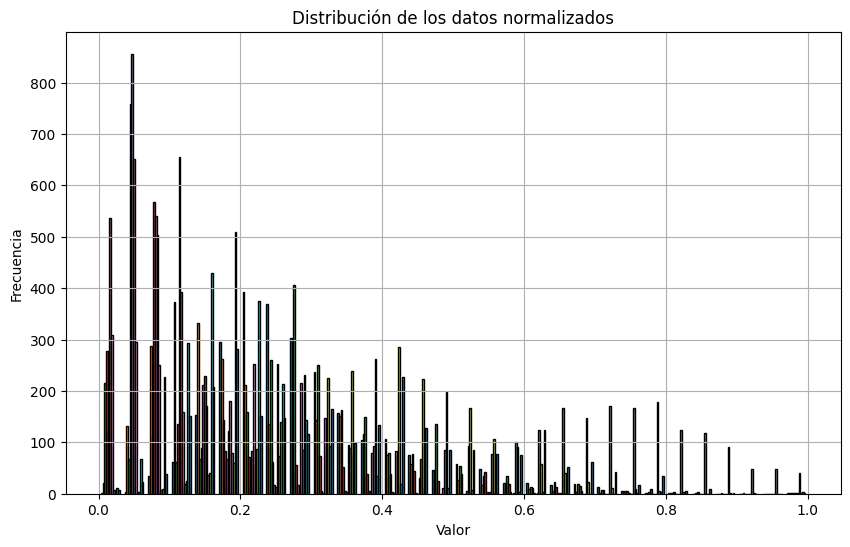

In [39]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Creamos dos copias de df para estandarizar y normalizar sin la columna 'type'
df_estandarizado = df.drop(columns=['type', 'quality'])
df_normalizado = df.drop(columns=['type', 'quality'])

# Definimos dos objetos, uno para estandarizar y otro para normalizar
scaler = StandardScaler()
normalizer = MinMaxScaler()

# Estandarizamos y normalizamos los datos
df_estandarizado[:] = scaler.fit_transform(df_estandarizado)
df_normalizado[:] = normalizer.fit_transform(df_normalizado)

# Graficamos la distribución de los datos estandarizados y normalizados 
plt.figure(figsize=(10, 6))
plt.hist(df_estandarizado, bins=30, edgecolor='black')
plt.title('Distribución de los datos estandarizados')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(df_normalizado, bins=30, edgecolor='black')
plt.title('Distribución de los datos normalizados')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### Elbow PLOT - K-Means ( metodo particionamiento )

* Utilizaremos esta herramienta para elegir un posible valor optimo de K y luego realizar K-Means con ese valor

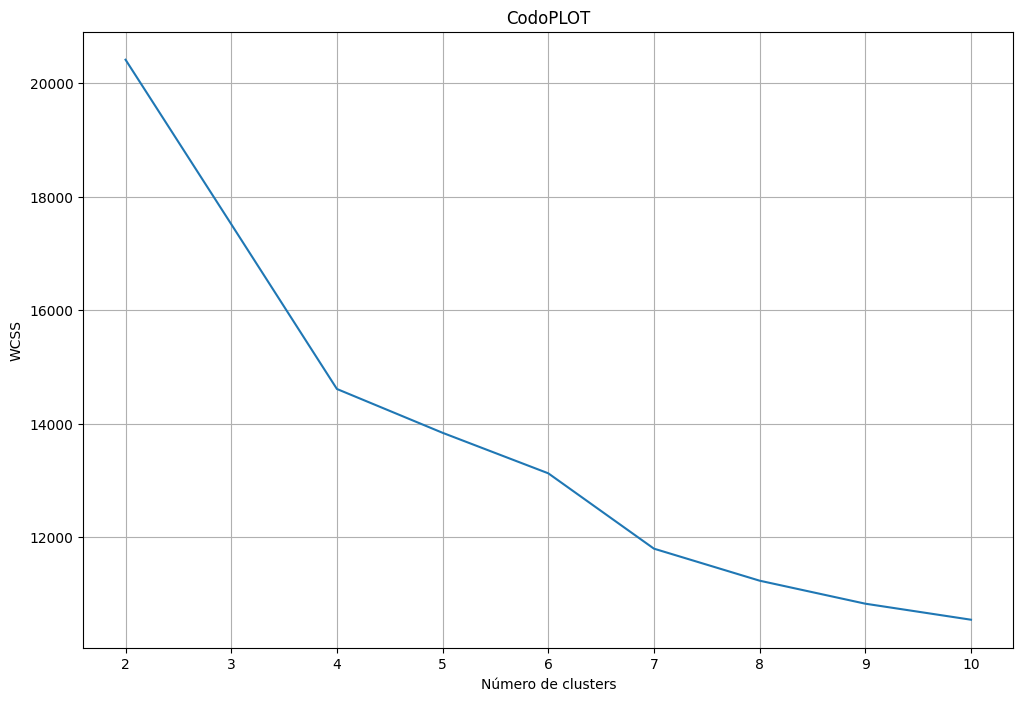

In [40]:
from sklearn.cluster import KMeans

# Calculamos cada Kmean para cada numero de clusters 
wcss = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(df_estandarizado)
    wcss.append(kmeans.inertia_)  

# Graficamos el codo
plt.figure(figsize=(12, 8))
plt.plot(range(2, 11), wcss)
plt.title('CodoPLOT')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


* Conclusiones del CodoPlot, el valor K optimo que nos muestra el grafico es 4 y en segunda medida 6. Hagamos K-Means con 4 

### K Means con 6

In [41]:
# Creamos un objeto KMeans
kmeans = KMeans(n_clusters=6, random_state=10)
# Aplicamos sobre nuestros datos estandarizados para encontrar los centroides
kmeans.fit(df_estandarizado)
# Obtenemos los clusters a los que fueron asginados los datos
clusters_kMeans_6 = kmeans.predict(df_estandarizado)

* Tenemos dos formas de ver estos resultados, una es hacer un ScatterPlot y la otra pasarlo a un dataframe con los tipos de vino y cluster asignados

Cluster 0:
type
Syrah       443
Moscatel     12
Name: count, dtype: int64

Cluster 1:
type
Moscatel    455
Syrah        26
Name: count, dtype: int64

Cluster 2:
type
Moscatel    344
Syrah         5
Name: count, dtype: int64

Cluster 3:
type
Moscatel    428
Syrah         6
Name: count, dtype: int64

Cluster 4:
type
Syrah       426
Moscatel      7
Name: count, dtype: int64

Cluster 5:
type
Syrah       392
Moscatel      3
Name: count, dtype: int64



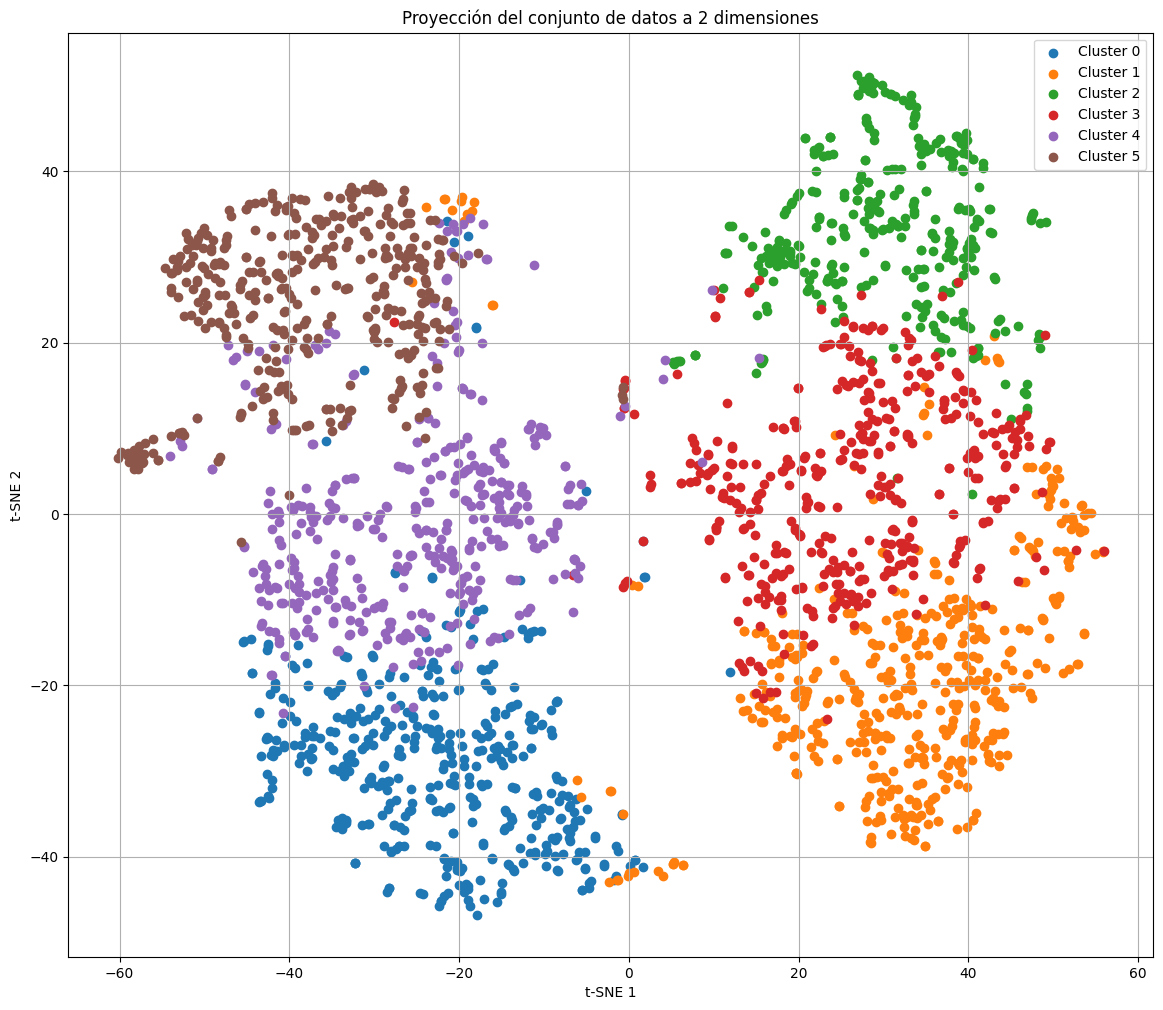

In [42]:
# Creamos un dataframe con los tipos de vino y los clusters asignados
cluster_kMeans_df = pd.DataFrame({'type': df['type'], 'cluster': clusters_kMeans_6})
# Imprimimos los tipos de vino por cada cluster
for i in range(6):
    print(f'Cluster {i}:')
    print(cluster_kMeans_df[cluster_kMeans_df['cluster'] == i]['type'].value_counts())
    print()

# Graficamos los clusters en 2D para ellos aplicamos TSNE a los datos estandarizados
tsne = TSNE(n_components=2, random_state=10).fit_transform(df_estandarizado)
# Creamos un dataframe con los resultados de TSNE y los clusters y tipo de vino
tsne_df = pd.DataFrame({'tsne1': tsne[:, 0], 'tsne2': tsne[:, 1], 'cluster': clusters_kMeans_6, 'type': df['type']})
# Graficamos los resultados de t-SNE discriminando por cluster
plt.figure(figsize=(14, 12))
for i in range(6):
    plt.scatter(tsne_df[tsne_df['cluster'] == i]['tsne1'], tsne_df[tsne_df['cluster'] == i]['tsne2'], label=f'Cluster {i}')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.legend()
plt.grid(True)
plt.show()



### K-Means con 4

Cluster 0:
type
Syrah       745
Moscatel     19
Name: count, dtype: int64

Cluster 1:
type
Moscatel    783
Syrah        30
Name: count, dtype: int64

Cluster 2:
type
Syrah       516
Moscatel     12
Name: count, dtype: int64

Cluster 3:
type
Moscatel    435
Syrah         7
Name: count, dtype: int64



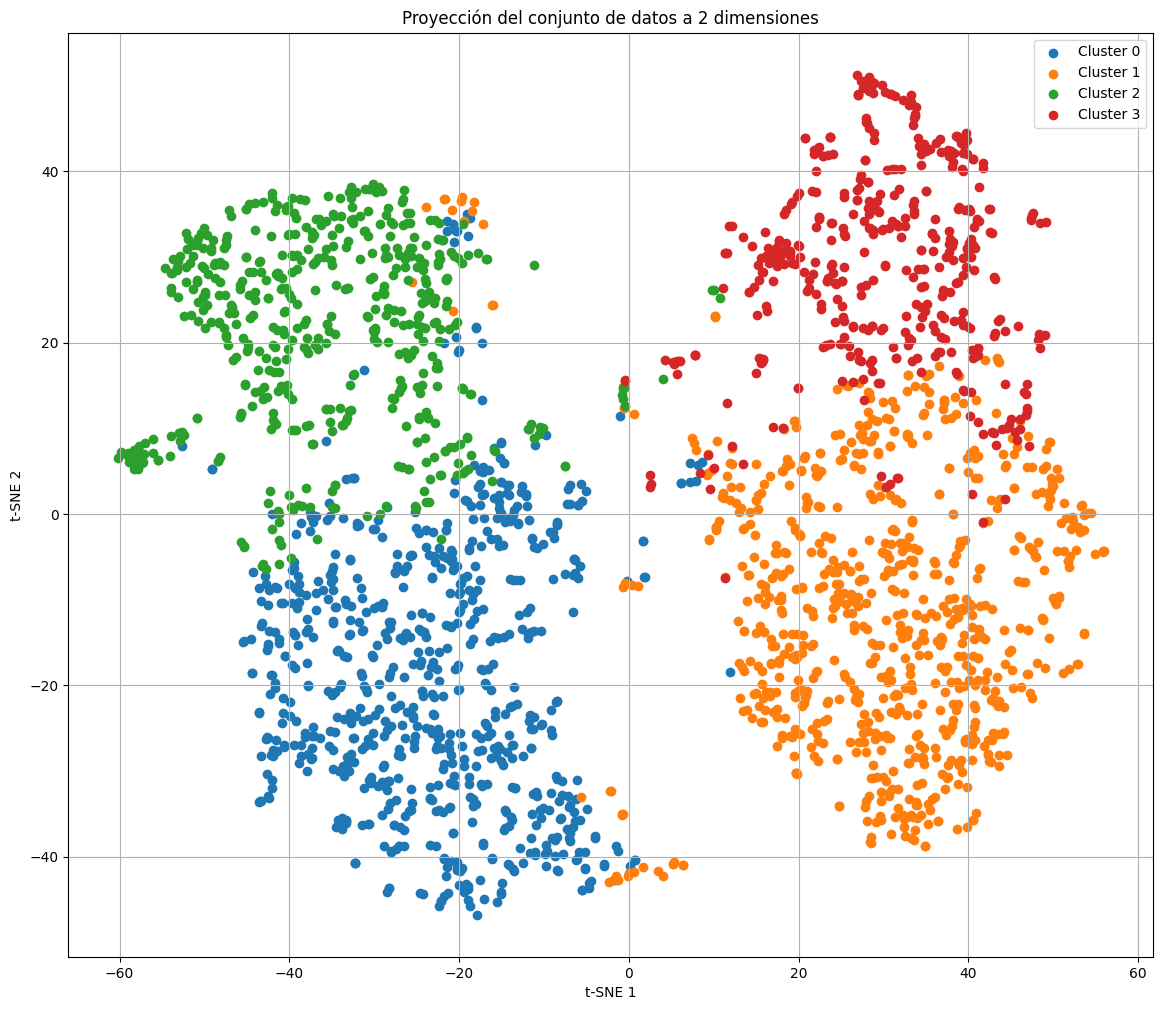

In [43]:
# Creamos un objeto KMeans
kmeans = KMeans(n_clusters=4, random_state=10)
# Aplicamos sobre nuestros datos estandarizados para encontrar los centroides
kmeans.fit(df_estandarizado)
# Obtenemos los clusters a los que fueron asginados los datos
clusters_kMeans_4 = kmeans.predict(df_estandarizado)

# Creamos un dataframe con los tipos de vino y los clusters asignados
cluster_kMeans_df = pd.DataFrame({'type': df['type'], 'cluster': clusters_kMeans_4})
# Imprimimos los tipos de vino por cada cluster
for i in range(4):
    print(f'Cluster {i}:')
    print(cluster_kMeans_df[cluster_kMeans_df['cluster'] == i]['type'].value_counts())
    print()

# Graficamos los clusters en 2D para ellos aplicamos TSNE a los datos estandarizados
tsne = TSNE(n_components=2, random_state=10).fit_transform(df_estandarizado)
# Creamos un dataframe con los resultados de TSNE y los clusters y tipo de vino
tsne_df = pd.DataFrame({'tsne1': tsne[:, 0], 'tsne2': tsne[:, 1], 'cluster': clusters_kMeans_4, 'type': df['type']})
# Graficamos los resultados de t-SNE discriminando por cluster
plt.figure(figsize=(14, 12))
for i in range(4):
    plt.scatter(tsne_df[tsne_df['cluster'] == i]['tsne1'], tsne_df[tsne_df['cluster'] == i]['tsne2'], label=f'Cluster {i}')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.legend()
plt.grid(True)
plt.show()

### K-Means 2

Cluster 0:
type
Syrah       1274
Moscatel      17
Name: count, dtype: int64

Cluster 1:
type
Moscatel    1232
Syrah         24
Name: count, dtype: int64



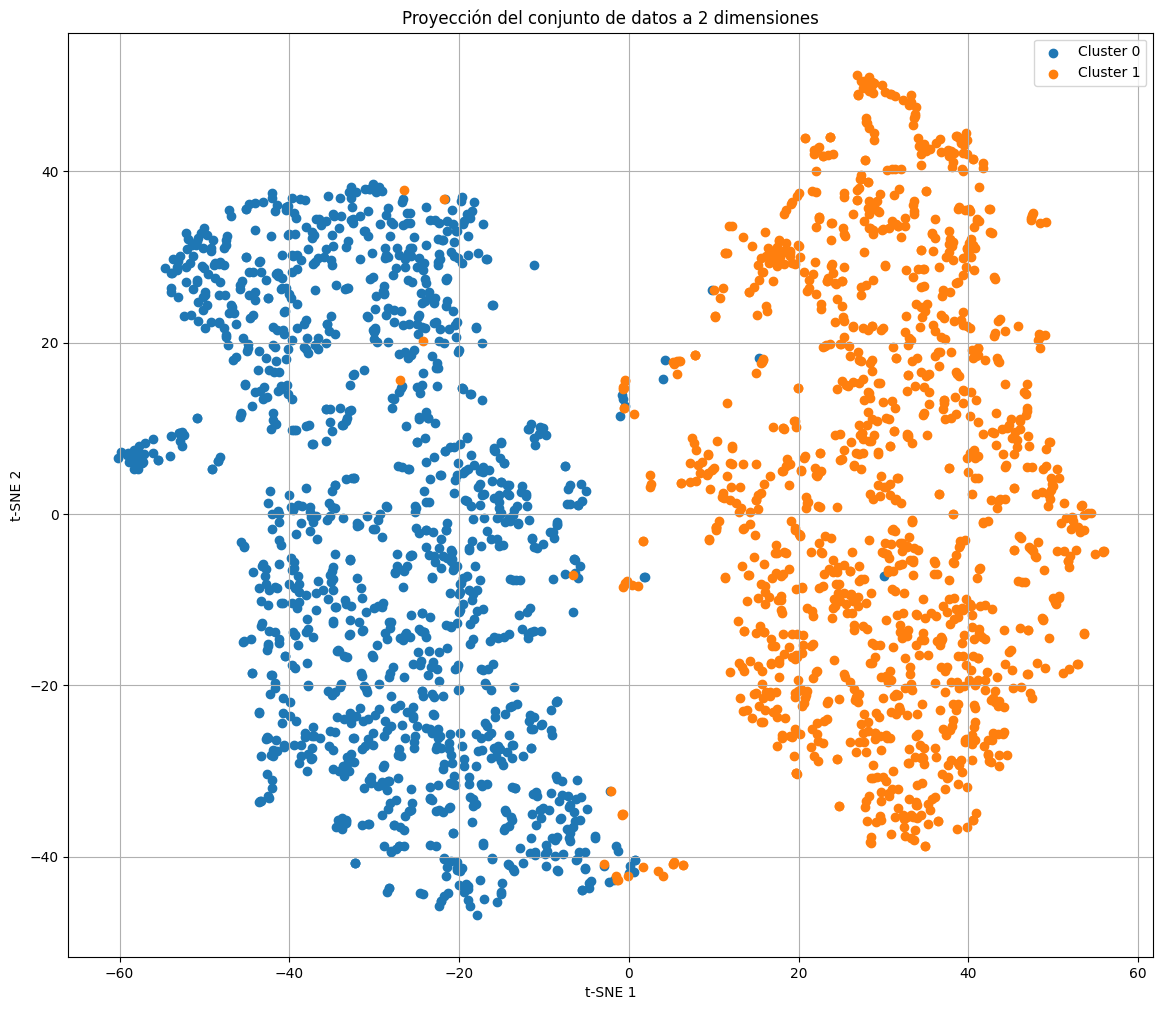

In [44]:
# Creamos un objeto KMeans
kmeans = KMeans(n_clusters=2, random_state=10)
# Aplicamos sobre nuestros datos estandarizados para encontrar los centroides
kmeans.fit(df_estandarizado)
# Obtenemos los clusters a los que fueron asginados los datos
clusters_kMeans_2 = kmeans.predict(df_estandarizado)

# Creamos un dataframe con los tipos de vino y los clusters asignados
cluster_kMeans_df = pd.DataFrame({'type': df['type'], 'cluster': clusters_kMeans_2})
# Imprimimos los tipos de vino por cada cluster
for i in range(2):
    print(f'Cluster {i}:')
    print(cluster_kMeans_df[cluster_kMeans_df['cluster'] == i]['type'].value_counts())
    print()

# Graficamos los clusters en 2D para ellos aplicamos TSNE a los datos estandarizados
tsne = TSNE(n_components=2, random_state=10).fit_transform(df_estandarizado)
# Creamos un dataframe con los resultados de TSNE y los clusters y tipo de vino
tsne_df = pd.DataFrame({'tsne1': tsne[:, 0], 'tsne2': tsne[:, 1], 'cluster': clusters_kMeans_2, 'type': df['type']})
# Graficamos los resultados de t-SNE discriminando por cluster
plt.figure(figsize=(14, 12))
for i in range(2):
    plt.scatter(tsne_df[tsne_df['cluster'] == i]['tsne1'], tsne_df[tsne_df['cluster'] == i]['tsne2'], label=f'Cluster {i}')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.legend()
plt.grid(True)
plt.show()

### Bottom Up - Aglomerativo ( metodo jerarquico)

* No estamos muy confiados del resultado de K-Means con la ayuda del ElbowPlot por lo que probaremos con este metodo donde no tenemos que pasarle ningun superparametro 

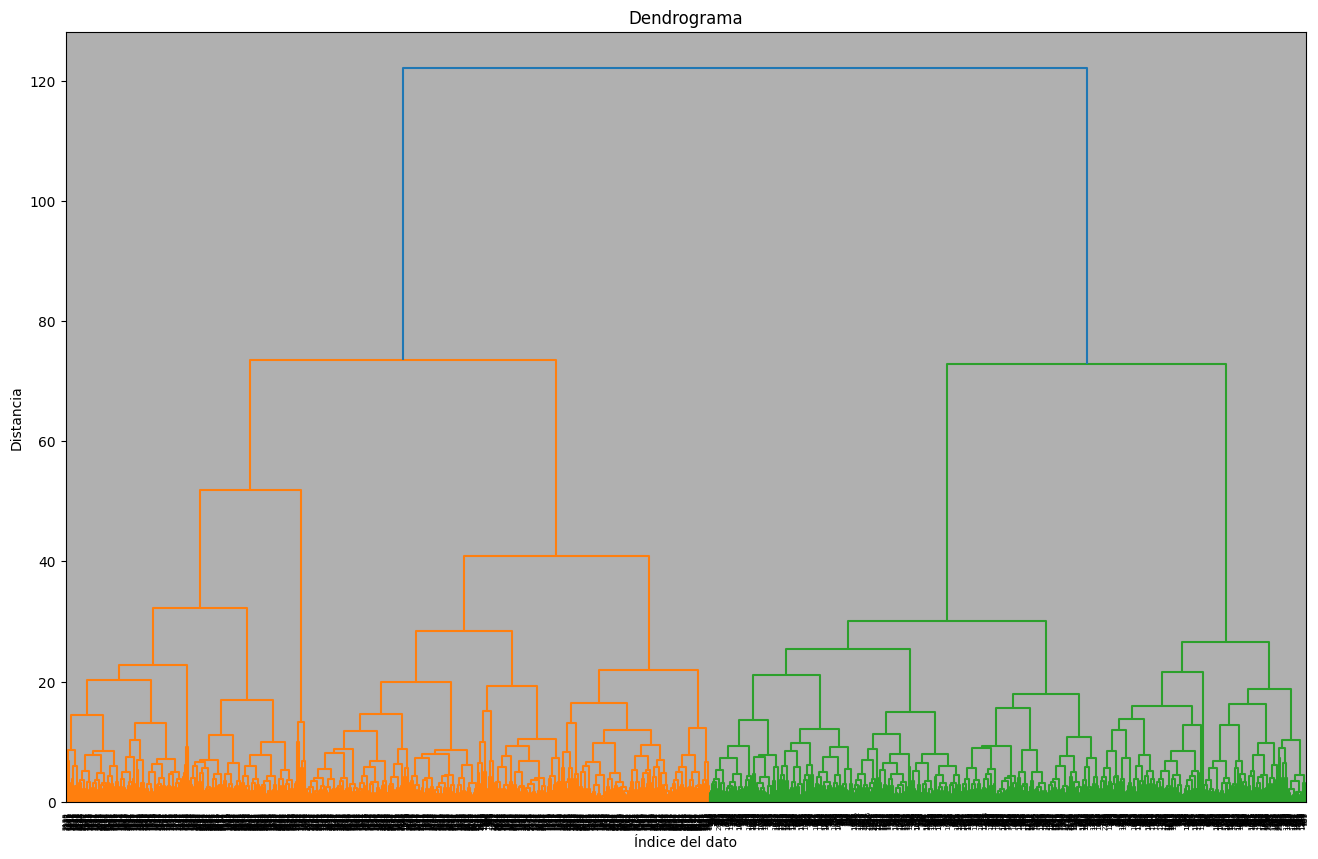

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage # Importamos las librerías linkage encargada de realizar el clustering jerárquico y dendrogram para graficar el dendrograma

# generamos el clustering jerárquico
# Por que el metodo ward? Probamos con los dados por la catedra no vimos ninguno que se ajuste bien a los datos, buscamos en internet y probamos otros y este fue quien mejor resultado vimos
                            # ward La distancia entre dos clusters se define como el incremento en la suma de las varianzas cuando se combinan los clusters.
link_df = linkage(df_estandarizado, method='ward')

# graficamos el dendrograma
plt.figure(figsize=(16, 10))
dendrogram(link_df,
           orientation='top',
           distance_sort='descending')
plt.title('Dendrograma')
plt.xlabel('Índice del dato')
plt.ylabel('Distancia')
plt.grid(True)
plt.show()


* Elegimos una solucion al metodo jerarquico aglomerativo, la mayor distancia entre grupos en los que se podria separar la vemos en particionar en 2 pero tambien podria ser en 4

In [46]:
from sklearn.cluster import AgglomerativeClustering

# creamos el objeto para el clustering aglomerativo, eliminamos affinity porque no es necesario con linkage='single'
agglomerative = AgglomerativeClustering(n_clusters=2, linkage='ward')
# usamos fit predict para buscar los clusters y devolverlos
clusters_agglomerative = agglomerative.fit_predict(df_estandarizado)

# imprimimos por pantalla los nombres de los países asignados a cada cluster
for k in np.unique(clusters_agglomerative):
    print('Cluster {}'.format(k))
    print(df['type'][clusters_agglomerative == k].value_counts())
    print()

Cluster 0
type
Syrah       1284
Moscatel      38
Name: count, dtype: int64

Cluster 1
type
Moscatel    1211
Syrah         14
Name: count, dtype: int64



### Evaluacion de clustering

KMeans
DB score: 1.5147
Silhouette score: 0.2725
----------
Agglomerative
DB score: 1.5325
Silhouette score: 0.2678
----------


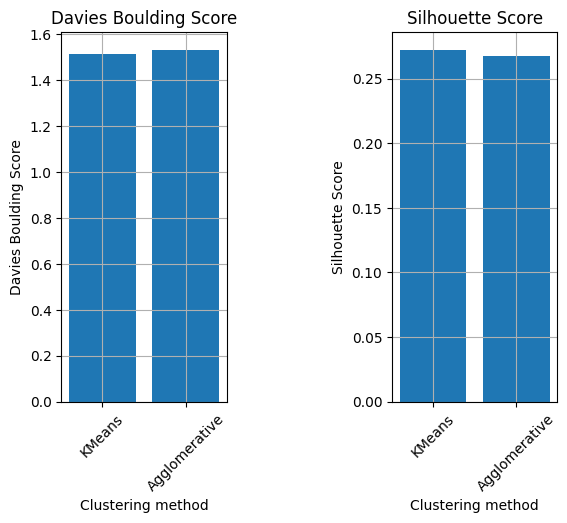

In [47]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

#inicializamos listas con los resultados de cada algoritmo y los nombres de los algoritmos
clusters_to_compare = [clusters_kMeans_2, clusters_agglomerative]
clustering_methods = ['KMeans', 'Agglomerative']

# inicializamos vectores donde iremos guardando los resultados
db_scores = np.zeros(len(clusters_to_compare))
silhouette_scores = np.zeros(len(clusters_to_compare))

# por cada uno de los métodos
for i in range(len(clusters_to_compare)):
  # calculamos las métricas
  db_scores[i] = davies_bouldin_score(df_estandarizado, clusters_to_compare[i])
  silhouette_scores[i] = silhouette_score(df_estandarizado, clusters_to_compare[i])
  # las imprimimos
  print(clustering_methods[i])
  print('DB score: {:.4f}'.format(db_scores[i]))
  print('Silhouette score: {:.4f}'.format(silhouette_scores[i]))
  print('----------')

# inicializamos un gráfico para cada métrica
fig, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace=1)
# graficamos el Davies Bouldin score
axes[0].bar(np.arange(db_scores.size), db_scores)
axes[0].set_title('Davies Boulding Score')
axes[0].set_xlabel('Clustering method')
axes[0].set_ylabel('Davies Boulding Score')
axes[0].set_xticks(np.arange(db_scores.size))
axes[0].set_xticklabels(clustering_methods, rotation=45)
axes[0].grid(True)
# y el Silhouette Score
axes[1].bar(np.arange(silhouette_scores.size), silhouette_scores)
axes[1].set_title('Silhouette Score')
axes[1].set_xlabel('Clustering method')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_xticks(np.arange(silhouette_scores.size))
axes[1].set_xticklabels(clustering_methods, rotation=45)
axes[1].grid(True)

plt.show()

# HIPOTESIS 1 

* Luego del analisis exploratorio hecho, tenemos como primer hipotesis a plantear la siguiente
 
**"Los resultados quimicos de las variables (todas menos calidad y tipo de vino ) determinan el tipo de vino ( Moscatel o Syrah )"**

* Nos parece interesante poder probar esta hipotesis con el fin de poder confirmar lo que suponiamos desde un principio que es analizar el dataframe pero por vino. Realizar correlaciones de variables, PCA o T-SNE, Clustering y poder plantear hipotesis en 2 sub-dataframes por tipo teniendo un dato estadistico que nos ayude a confirmarlo y a proceder

**PASO 1 plantear hipotesis nula y alternativa**

-> H0: Las variables quimicas determinan el tipo de vino. 

-> H1: Las variables quimicas no determinan el tipo de vino

**PASO 2 decidir nivel de significancia/confianza**
* Decidimos el nivel de significancia estandar 0,05

**PASO 3 elegir un test estadistico** 
* **Test t para muestras independientes**:
Dos muestras se consideran independientes si las observaciones se obtienen de forma
aleatoria y no guardan relación. Se asume que cada muestra proviene de una población
diferente, y nos interesa saber si las dos medias son iguales. En nuestro caso las muestras provienen de dos poblaciones diferentes en cuanto al tipo de vino, si bien se hicieron en la misma bodega son dos tipos de vinos diferentes

* Debemos cumplir con los supuestos
1. Independencia que ya de por si lo cumple por lo explicado anteriormente
2. Normalidad que probaremos por Shapiro 
3. Homocedasticidad igualdad de varianza

In [48]:
from scipy.stats import shapiro
import statsmodels.api as sm

# Separamos el df_estandarizado en dos grupos, uno para cada tipo de vino
df_moscatel = df_estandarizado[df['type'] == 'Moscatel']
df_syrah = df_estandarizado[df['type'] == 'Syrah']

# Excluir las columnas 'type' y 'quality' si están presentes
columns_to_test = [col for col in df_estandarizado.columns if col not in ['type', 'quality']]

# Test de Shapiro-Wilk para cada variable en cada grupo
for column in columns_to_test:
    stat_moscatel, p_moscatel = shapiro(df_moscatel[column])
    stat_syrah, p_syrah = shapiro(df_syrah[column])
    
    print(f"Variable: {column}")
    print(f"Test de Shapiro-Wilk para Moscatel: Estadístico={stat_moscatel:.3f}, p-valor={p_moscatel:.3f}")
    print(f"Test de Shapiro-Wilk para Syrah: Estadístico={stat_syrah:.3f}, p-valor={p_syrah:.3f}")
    
    if p_moscatel > 0.05:
        print('Moscatel: No se rechaza la hipótesis nula de normalidad.')
    else:
        print('Moscatel: Se rechaza la hipótesis nula de normalidad.')
    
    if p_syrah > 0.05:
        print('Syrah: No se rechaza la hipótesis nula de normalidad.')
    else:
        print('Syrah: Se rechaza la hipótesis nula de normalidad.')
    
    print('----------')


Variable: fixed acidity
Test de Shapiro-Wilk para Moscatel: Estadístico=0.989, p-valor=0.000
Test de Shapiro-Wilk para Syrah: Estadístico=0.960, p-valor=0.000
Moscatel: Se rechaza la hipótesis nula de normalidad.
Syrah: Se rechaza la hipótesis nula de normalidad.
----------
Variable: volatile acidity
Test de Shapiro-Wilk para Moscatel: Estadístico=0.894, p-valor=0.000
Test de Shapiro-Wilk para Syrah: Estadístico=0.970, p-valor=0.000
Moscatel: Se rechaza la hipótesis nula de normalidad.
Syrah: Se rechaza la hipótesis nula de normalidad.
----------
Variable: citric acid
Test de Shapiro-Wilk para Moscatel: Estadístico=0.907, p-valor=0.000
Test de Shapiro-Wilk para Syrah: Estadístico=0.954, p-valor=0.000
Moscatel: Se rechaza la hipótesis nula de normalidad.
Syrah: Se rechaza la hipótesis nula de normalidad.
----------
Variable: residual sugar
Test de Shapiro-Wilk para Moscatel: Estadístico=0.891, p-valor=0.000
Test de Shapiro-Wilk para Syrah: Estadístico=0.607, p-valor=0.000
Moscatel: Se r

* Vemos que no es posible usar el estadistico t-Student porque no podemos comprobar uno de los supuestos, el de normalidad.

* Iremos a buscar un test No Parametrico 

* **Test Mann Whitney** 
    - Este test hace que tengamos que comprobar homocedasticidad o homogeneidad de varianzas. Lo haremos con un Test de Levene: la hipótesis nula es que las varianzas son significativamente diferentes entre sí (hay heterocedasticidad), por lo que pedimos que el test nos de un p-valor menor a 0.05.

In [49]:
import scipy.stats as stats

# Test de Levene para cada variable
for column in columns_to_test:
    stat, p = stats.levene(df_moscatel[column], df_syrah[column])
    
    print(f"Variable: {column}")
    print(f"Test de Levene: Estadístico={stat:.3f}, p-valor={p:.3f}")
    
    if p > 0.05:
        print('No se rechaza la hipótesis nula de igualdad de varianzas.')
    else:
        print('Se rechaza la hipótesis nula de igualdad de varianzas.')
    
    print('----------')

Variable: fixed acidity
Test de Levene: Estadístico=400.305, p-valor=0.000
Se rechaza la hipótesis nula de igualdad de varianzas.
----------
Variable: volatile acidity
Test de Levene: Estadístico=388.242, p-valor=0.000
Se rechaza la hipótesis nula de igualdad de varianzas.
----------
Variable: citric acid
Test de Levene: Estadístico=610.696, p-valor=0.000
Se rechaza la hipótesis nula de igualdad de varianzas.
----------
Variable: residual sugar
Test de Levene: Estadístico=1360.192, p-valor=0.000
Se rechaza la hipótesis nula de igualdad de varianzas.
----------
Variable: chlorides
Test de Levene: Estadístico=45.573, p-valor=0.000
Se rechaza la hipótesis nula de igualdad de varianzas.
----------
Variable: free sulfur dioxide
Test de Levene: Estadístico=147.398, p-valor=0.000
Se rechaza la hipótesis nula de igualdad de varianzas.
----------
Variable: total sulfur dioxide
Test de Levene: Estadístico=26.031, p-valor=0.000
Se rechaza la hipótesis nula de igualdad de varianzas.
----------
Var

* Nuevamente hay otro supuesto que no se cumple para poder utilizar Mann Whitney

* **Test Kruskal-Wallis**
    * Ahora la hipótesis nula del test es que no existen diferencias significativas entre los dos grupos provistos. Por consiguiente, si el p-valor del test nos da   por debajo del umbral de significancia, rechazamos dicha hipotesis. Por ende, existen diferencias significativas.

In [50]:
# Test de Krukal-Wallis para cada variable
for column in columns_to_test:
    stat, p = stats.kruskal(df_moscatel[column], df_syrah[column])
    
    print(f"Variable: {column}")
    print(f"Test de Krukal-Wallis: Estadístico={stat:.3f}, p-valor={p:.3f}")
    
    if p > 0.05:
        print('No existen diferencias significativas entre los dos grupos.')
    else:
        print('Existen diferencias significativas entre los grupos.')
    
    print('----------')

Variable: fixed acidity
Test de Krukal-Wallis: Estadístico=936.987, p-valor=0.000
Existen diferencias significativas entre los grupos.
----------
Variable: volatile acidity
Test de Krukal-Wallis: Estadístico=1183.015, p-valor=0.000
Existen diferencias significativas entre los grupos.
----------
Variable: citric acid
Test de Krukal-Wallis: Estadístico=46.259, p-valor=0.000
Existen diferencias significativas entre los grupos.
----------
Variable: residual sugar
Test de Krukal-Wallis: Estadístico=209.071, p-valor=0.000
Existen diferencias significativas entre los grupos.
----------
Variable: chlorides
Test de Krukal-Wallis: Estadístico=1505.878, p-valor=0.000
Existen diferencias significativas entre los grupos.
----------
Variable: free sulfur dioxide
Test de Krukal-Wallis: Estadístico=908.709, p-valor=0.000
Existen diferencias significativas entre los grupos.
----------
Variable: total sulfur dioxide
Test de Krukal-Wallis: Estadístico=1488.194, p-valor=0.000
Existen diferencias significa

**PASO 4 definir zonas de aceptacion y rechazo**

* Elegimos 0,05 como zona de rechazo

**PASO 5 sacar conclusiones** 

    - Pudimos comprobar que existen diferencias significativas entre las variables quimicas por tipo de vino.

    - Con Mann Withney y T-Studen no pudimos llegar a aceptar o rechazar la hipotesis que planteamos porque el dataframe no cumplio los supuestos que debia cumplir para poder usar esos estadisticos.
    
    - Quien sí funciono fue Kruskal-Wallis que es una prueba no paramétrica que se utiliza para determinar si existen diferencias significativas entre las distribuciones de dos o más grupos independientes.
    
    Ahora dado que trabajamos con Kruskal-Wallis nuestras hipótesis nos quedan así:
    Hipótesis Nula (H0): Las distribuciones de las variables químicas son iguales para los diferentes tipos de vino (Moscatel y Syrah).

    Hipótesis Alternativa (H1): Las distribuciones de las variables químicas son diferentes para los diferentes tipos de vino (Moscatel y Syrah).

# Analisis exploratorio por tipo de vino 

    - Como objetivo del analisis queremos poder explicar qué ocurre con la calidad del vino, entonces intentaremos analizar los datos para poder plantear hipótesis acerca de valores altos, bajos y medios de calidad en base a la muestra fisicoquimica.

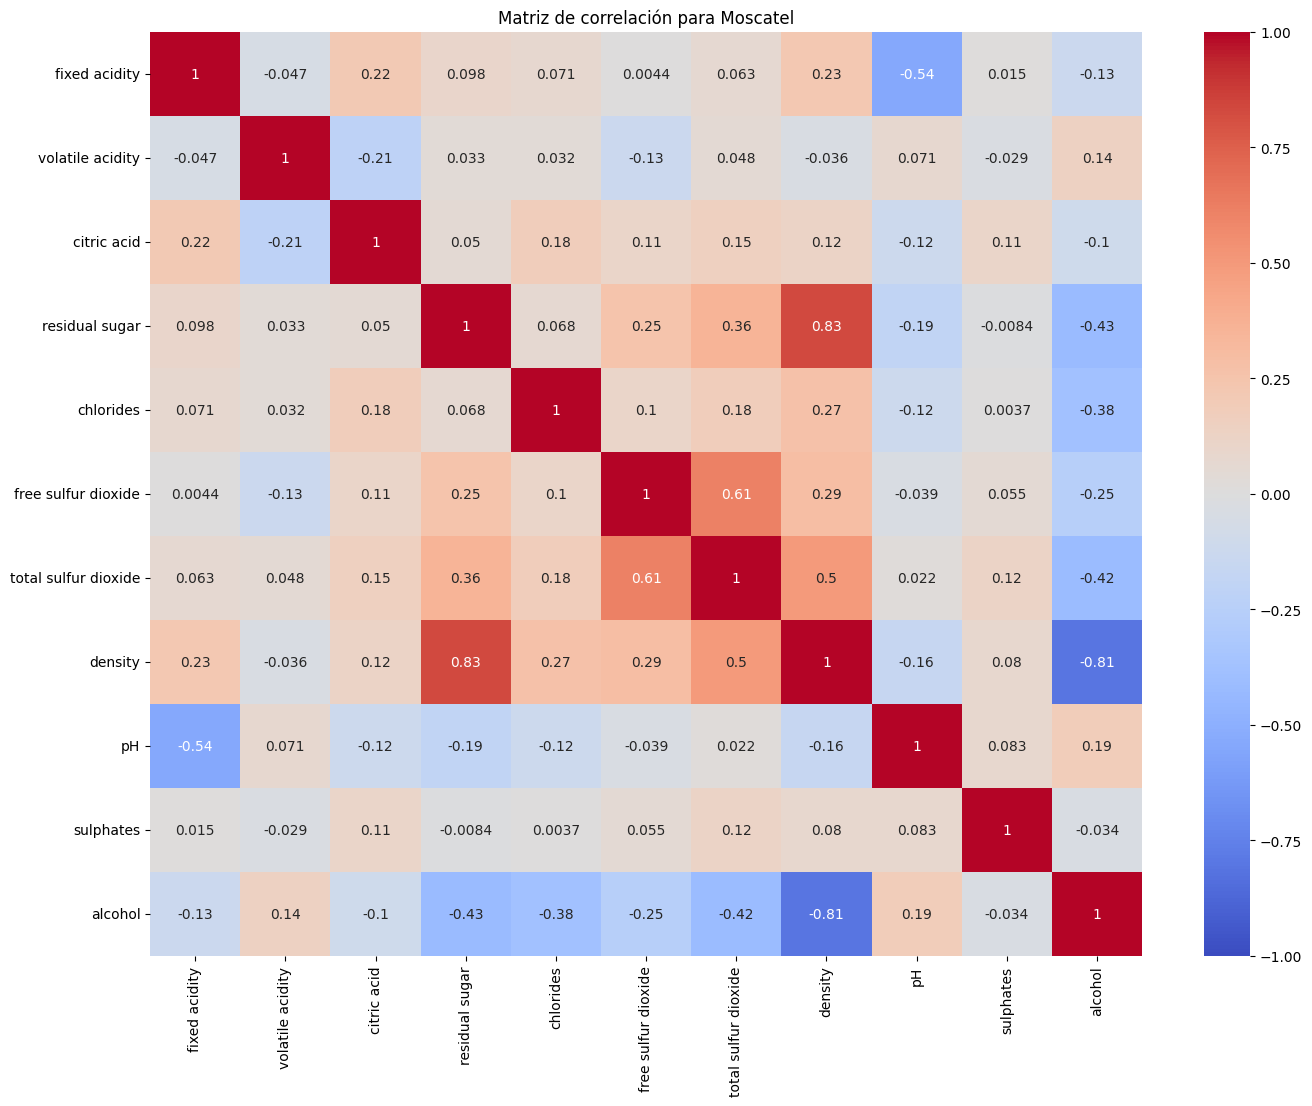

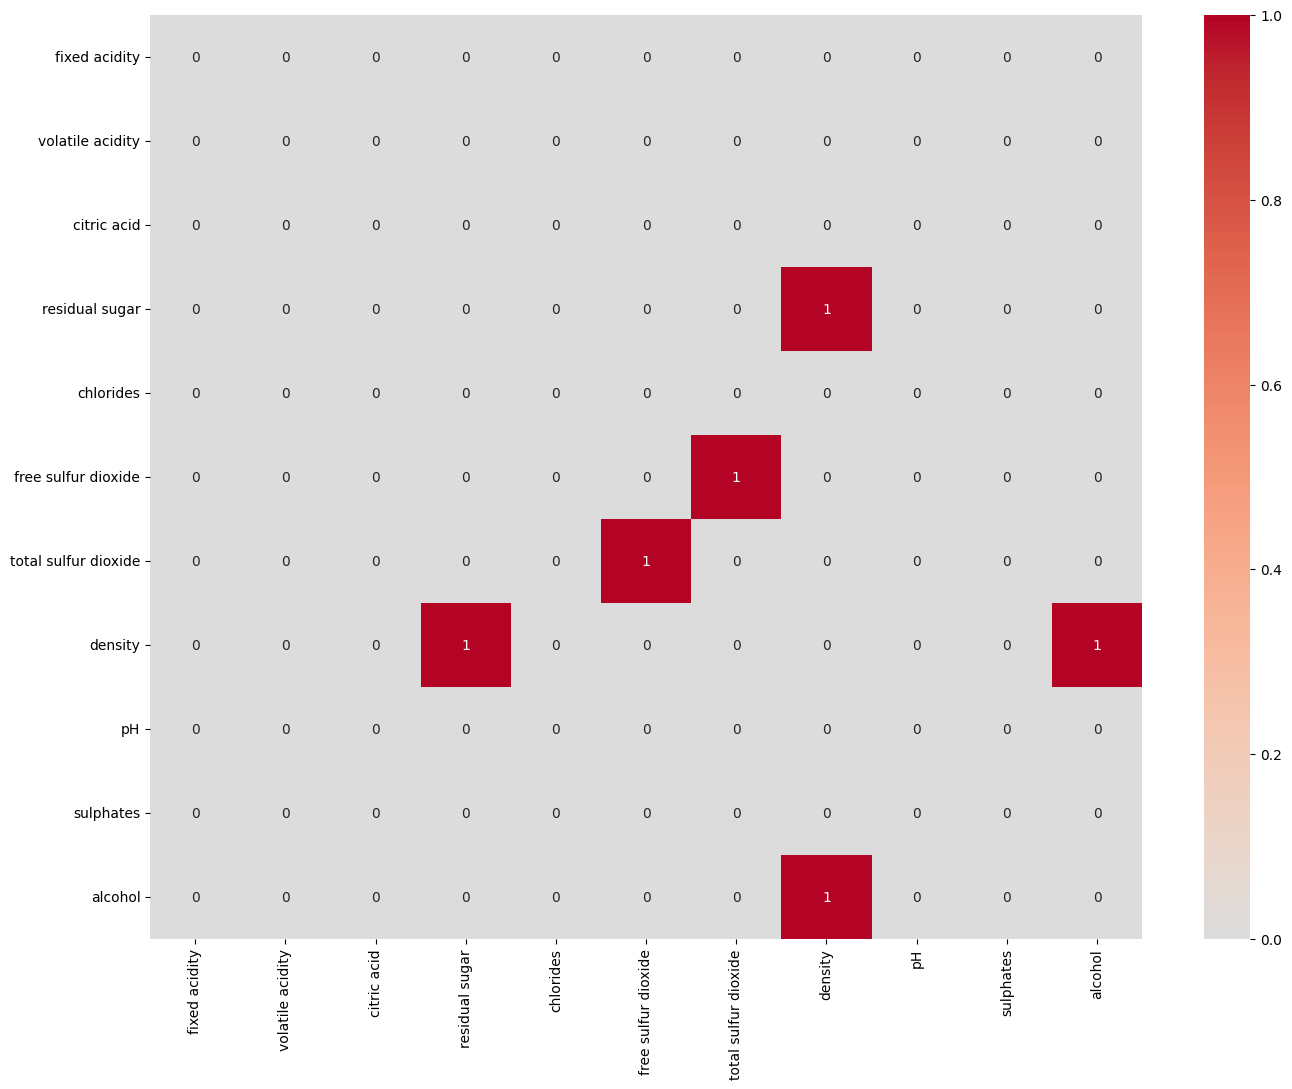

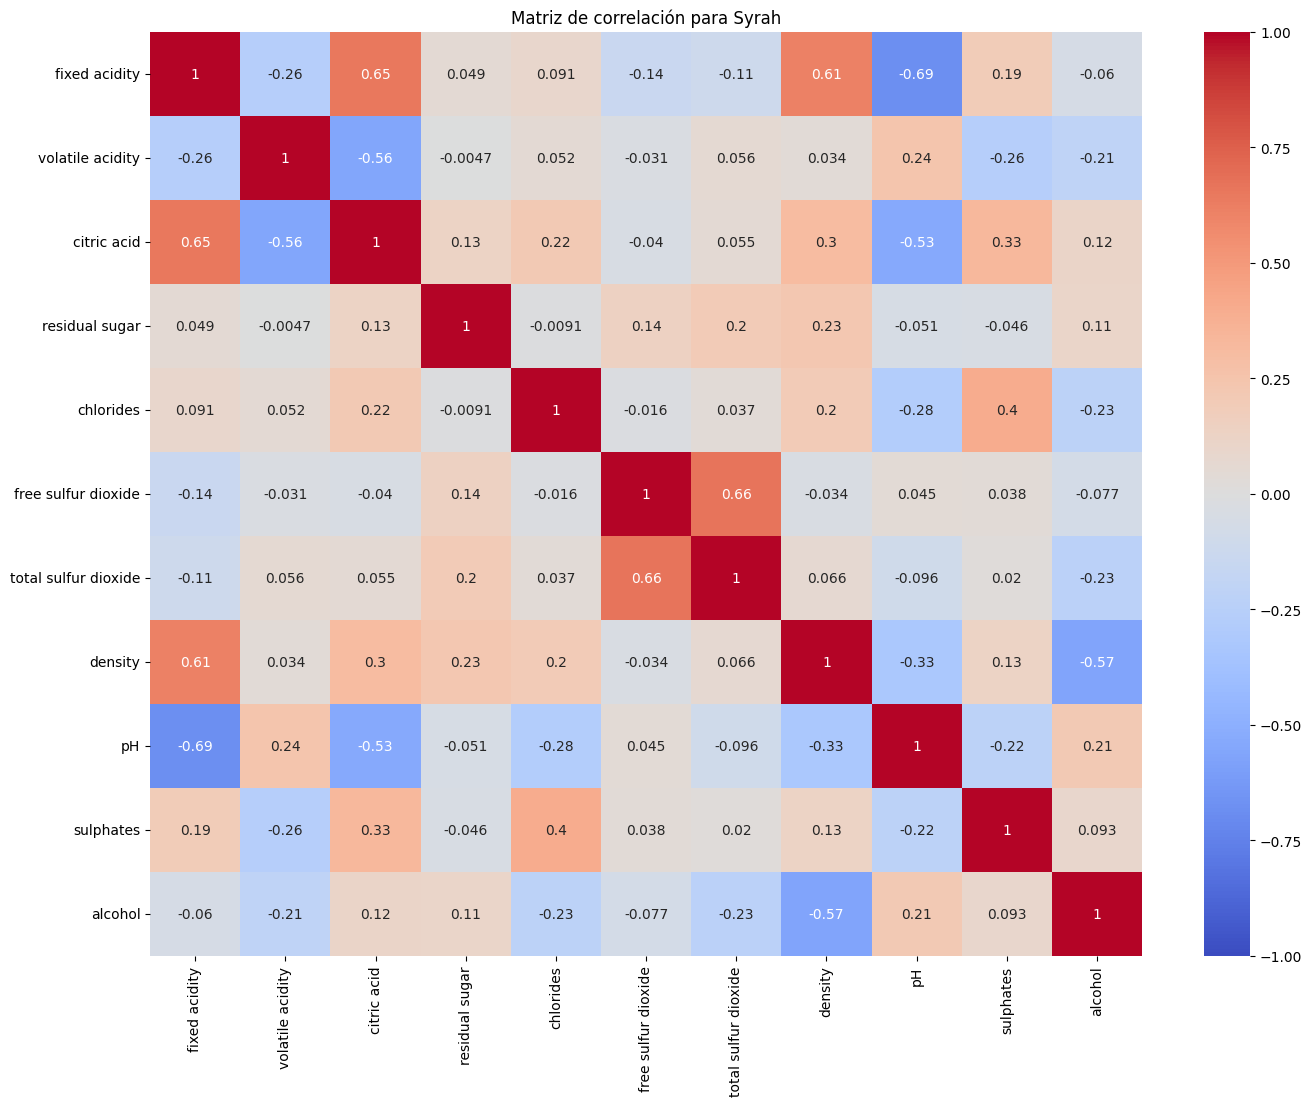

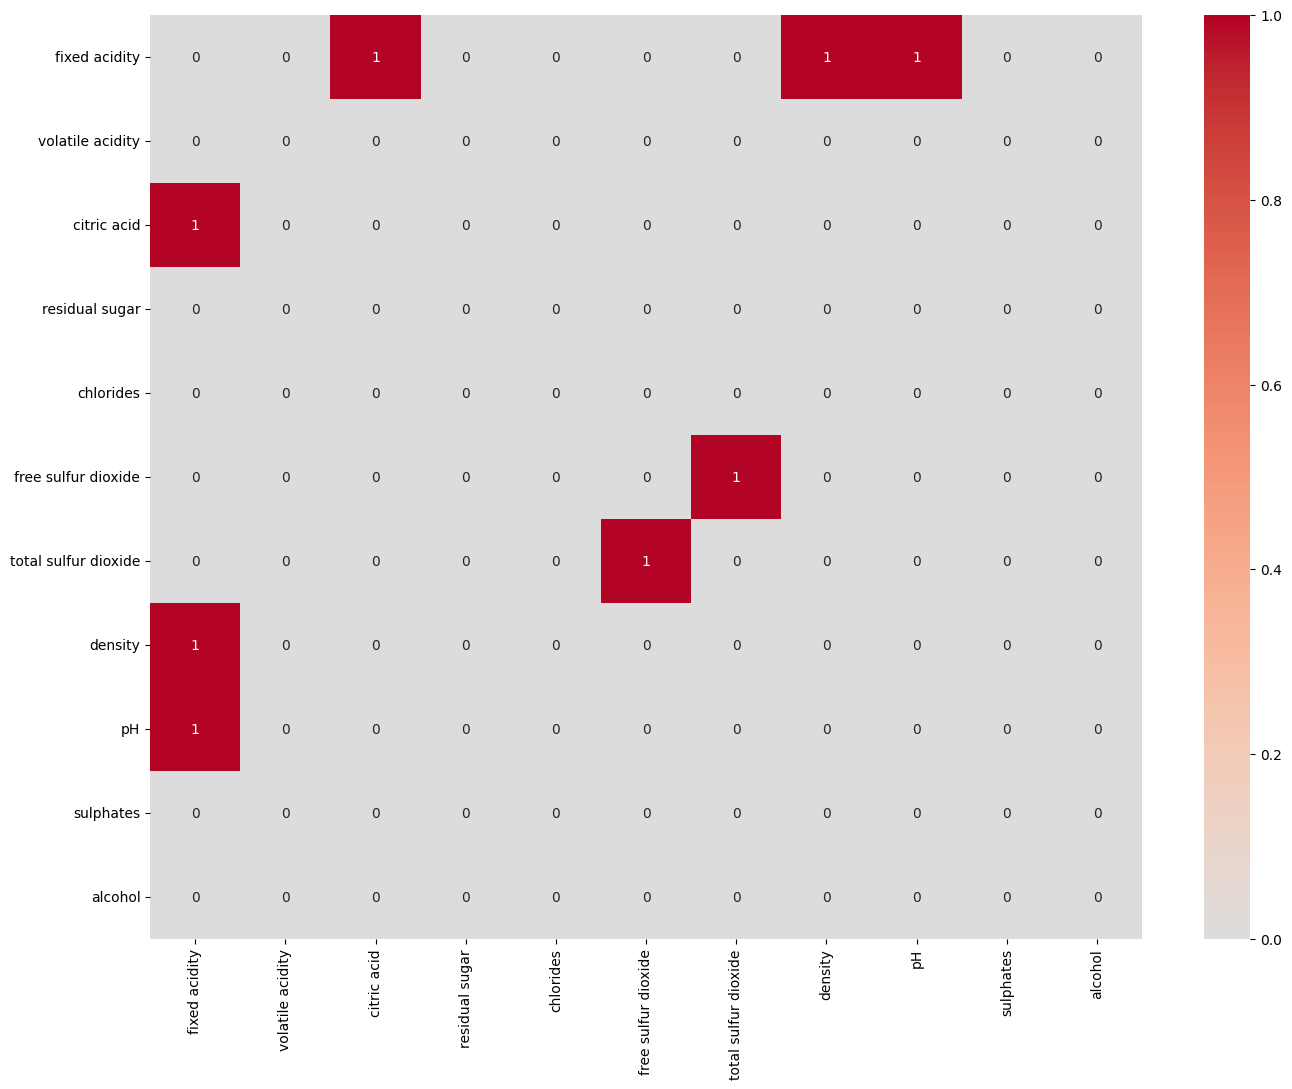

In [54]:
# Definimos dos dataframes para trabajar por separado con los dos tipos de vino y sin la columna quality
df_moscatel_noScaled = df[df['type'] == 'Moscatel']
df_syrah_noScaled = df[df['type'] == 'Syrah']

# Matriz de correlacion para df_moscatel y df_syrah
correlation_matrix_moscatel = df_moscatel_noScaled.drop(columns=['type', 'quality']).corr()
correlation_matrix_syrah = df_syrah_noScaled.drop(columns=['type', 'quality']).corr()

# Graficamos las matrices como un heatmap por separado

# Matriz de correlación para Moscatel
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_moscatel, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación para Moscatel')
plt.show()

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.6
correlation_matrix_umbralizada_Moscatel = correlation_matrix_moscatel.abs() > 0.6

# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada_Moscatel.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix_umbralizada_Moscatel, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()

# Matriz de correlación para Syrah
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_syrah, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación para Syrah')
plt.show()

# tomamos el valor absoluto de las correlaciones, umbralamos las mayores a 0.6
correlation_matrix_umbralizada_Syrah = correlation_matrix_syrah.abs() > 0.6

# aprovechamos y sacamos la diagonal
np.fill_diagonal(correlation_matrix_umbralizada_Syrah.values, 0)

# e imprimimos la matriz como un heatmap
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix_umbralizada_Syrah, vmin=0.0, vmax=1.0, center=0.0, annot=True, cmap= 'coolwarm')
plt.show()




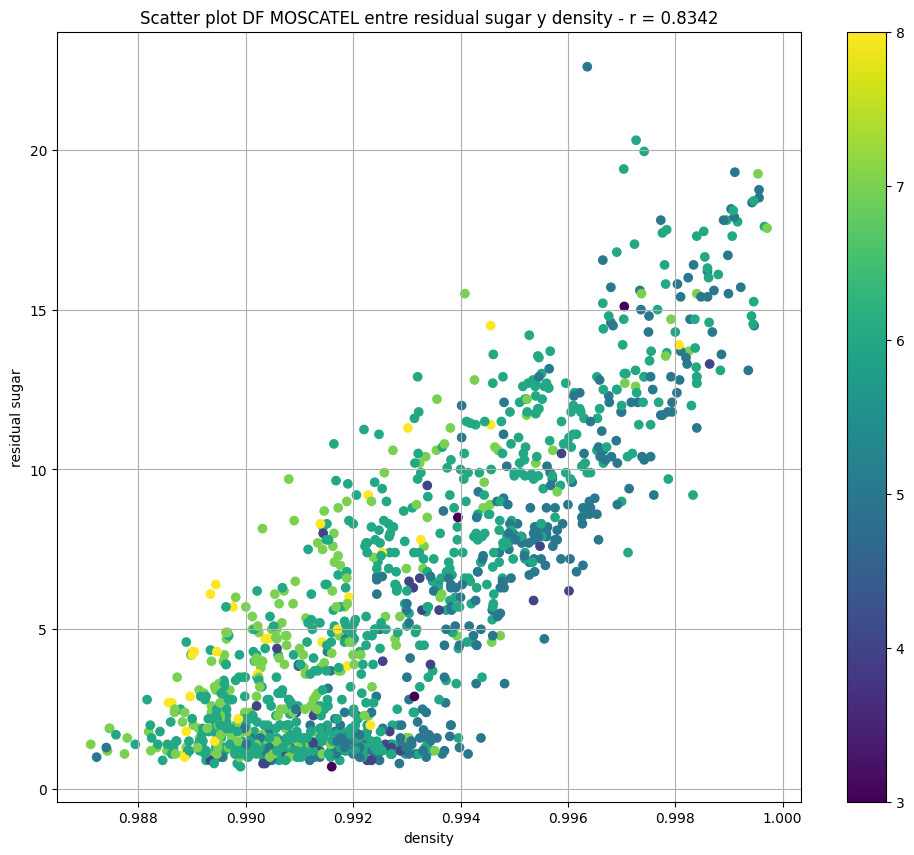

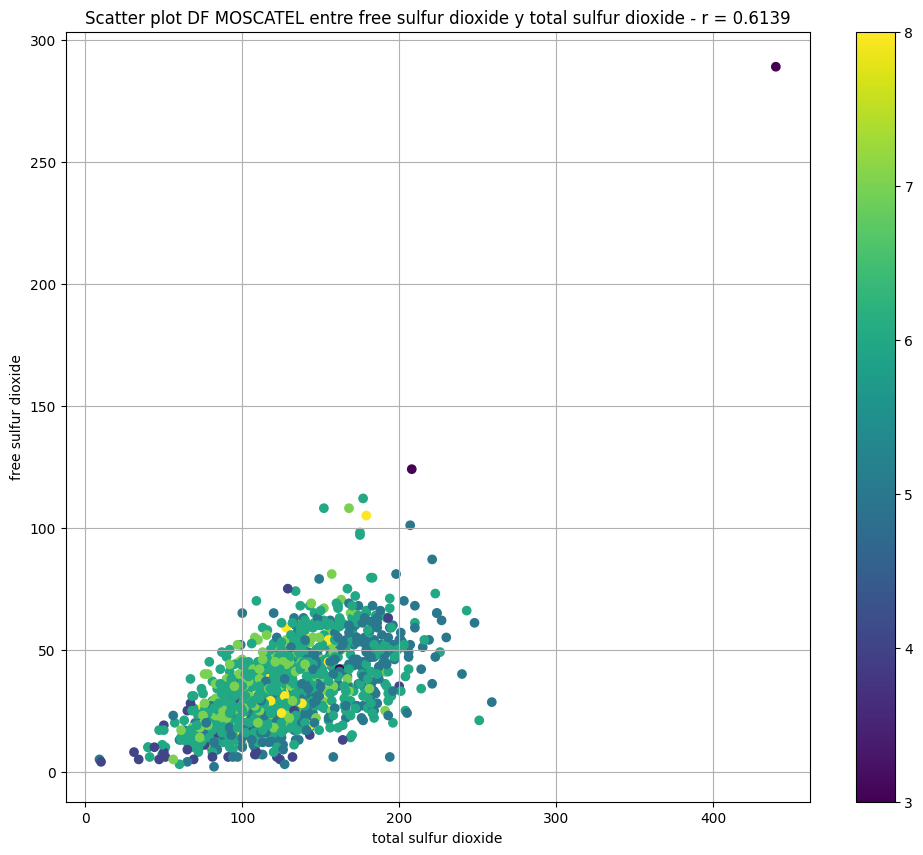

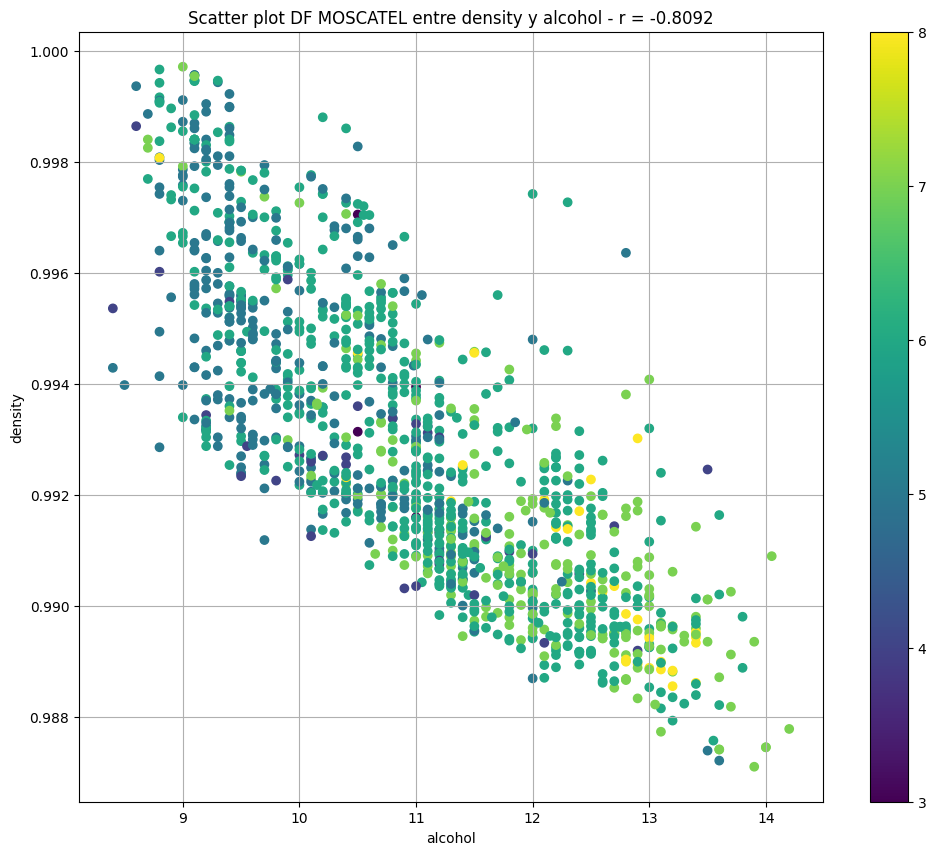

In [ ]:
# iteramos por cada una de las columnas
for i, col in enumerate(correlation_matrix_umbralizada_Moscatel.columns):
  # y por cada una de las filas (para eso usamos el índice)
  for j in range(i,len(correlation_matrix_umbralizada_Moscatel.index)):
    # extraemos el nombre de la fila en la que estamos
    row = correlation_matrix_umbralizada_Moscatel.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada
    if correlation_matrix_umbralizada_Moscatel.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = correlation_matrix_moscatel.loc[row, col]
      # representamos en un scatter plot cuadrado los valores de ambas variables
      plt.figure(figsize=(12, 10))
      plt.scatter(df_moscatel_noScaled[row], df_moscatel_noScaled[col], c = df_agrupado_type.get_group('Moscatel')['quality'], cmap='viridis')
      # y lo mostramos bonito 
      plt.title(f"Scatter plot DF MOSCATEL entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.colorbar()
      plt.grid(True)
      plt.show()


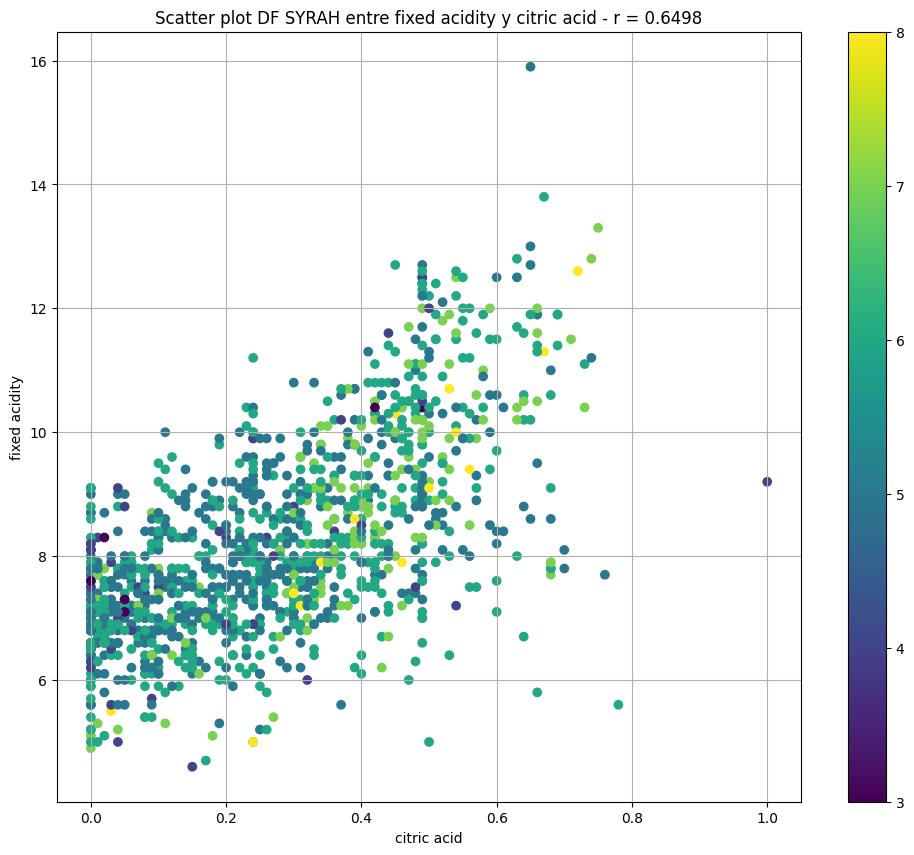

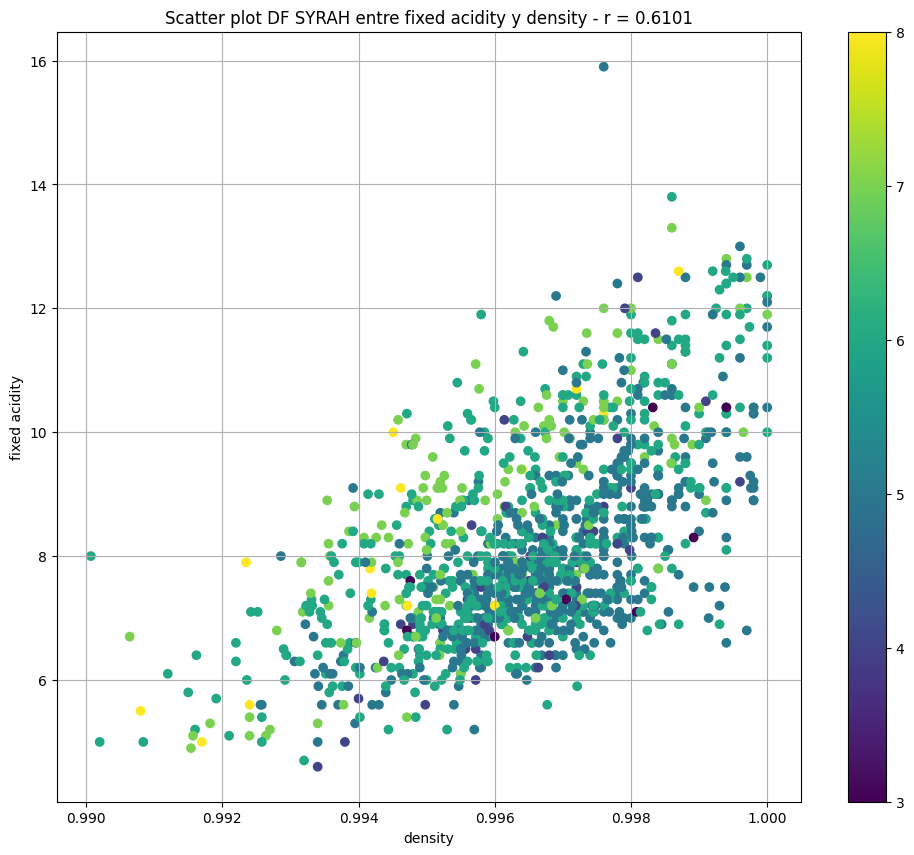

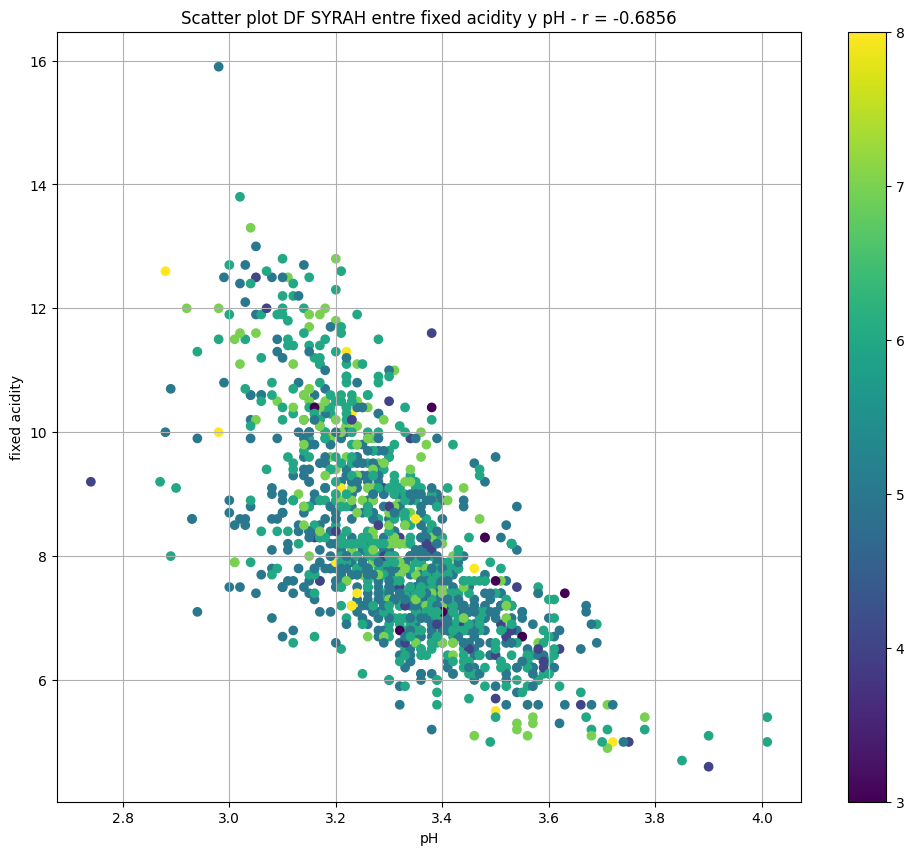

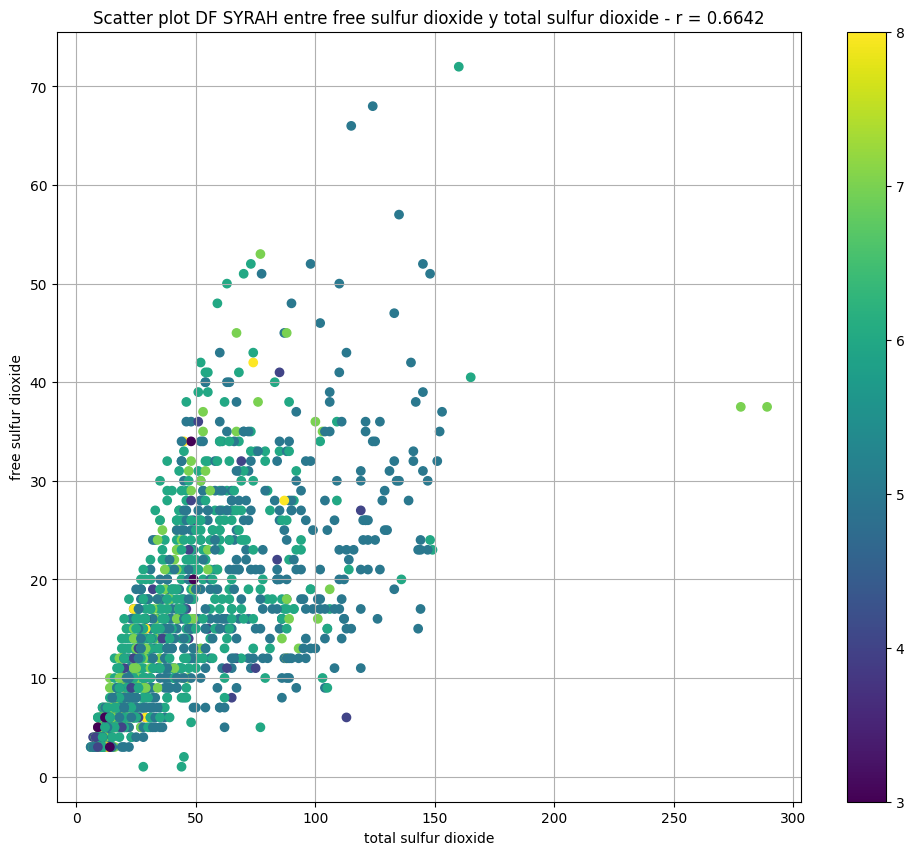

In [56]:
# iteramos por cada una de las columnas
for i, col in enumerate(correlation_matrix_umbralizada_Syrah.columns):
  # y por cada una de las filas (para eso usamos el índice)
  for j in range(i,len(correlation_matrix_umbralizada_Syrah.index)):
    # extraemos el nombre de la fila en la que estamos
    row = correlation_matrix_umbralizada_Syrah.index[j]
    # si en esa posición tenemos un True en la matriz umbralizada
    if correlation_matrix_umbralizada_Syrah.loc[row, col]:
      # nos traemos el valor de esa correlación
      correlation = correlation_matrix_syrah.loc[row, col]
      # representamos en un scatter plot cuadrado los valores de ambas variables
      plt.figure(figsize=(12, 10))
      plt.scatter(df_syrah_noScaled[row], df_syrah_noScaled[col], c =df_agrupado_type.get_group('Syrah')['quality'], cmap='viridis')
      # y lo mostramos bonito
      plt.title(f"Scatter plot DF SYRAH entre {col} y {row} - r = {correlation:.4f}")
      plt.xlabel(row)
      plt.ylabel(col)
      plt.colorbar()
      plt.grid(True)
      plt.show()

## Analisis multivariado tipo de vino Moscatel

* Ahora vamos a estudiar el dataframe de una manera multivariada solo para las muestras que corresponden al tipo de vino Moscatel. 

* Vimos que la matriz de correlacion tiene coeficientes de Pearson altos entre estas variables densidad y alcohol, total de dioxido de azufre y dioxido de azufre libre y azucar residuales y densidad. Como nuestro dataset es titulado Calidad del Vino, queremos podes llegar a explicar, mediantes hipotesis, la calidad del vino. 

### Comenzamos realizando un PCA 

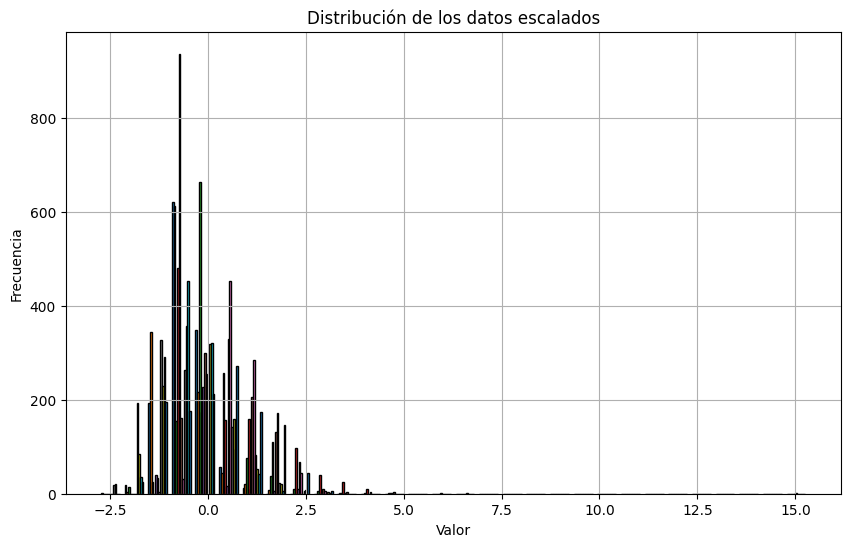

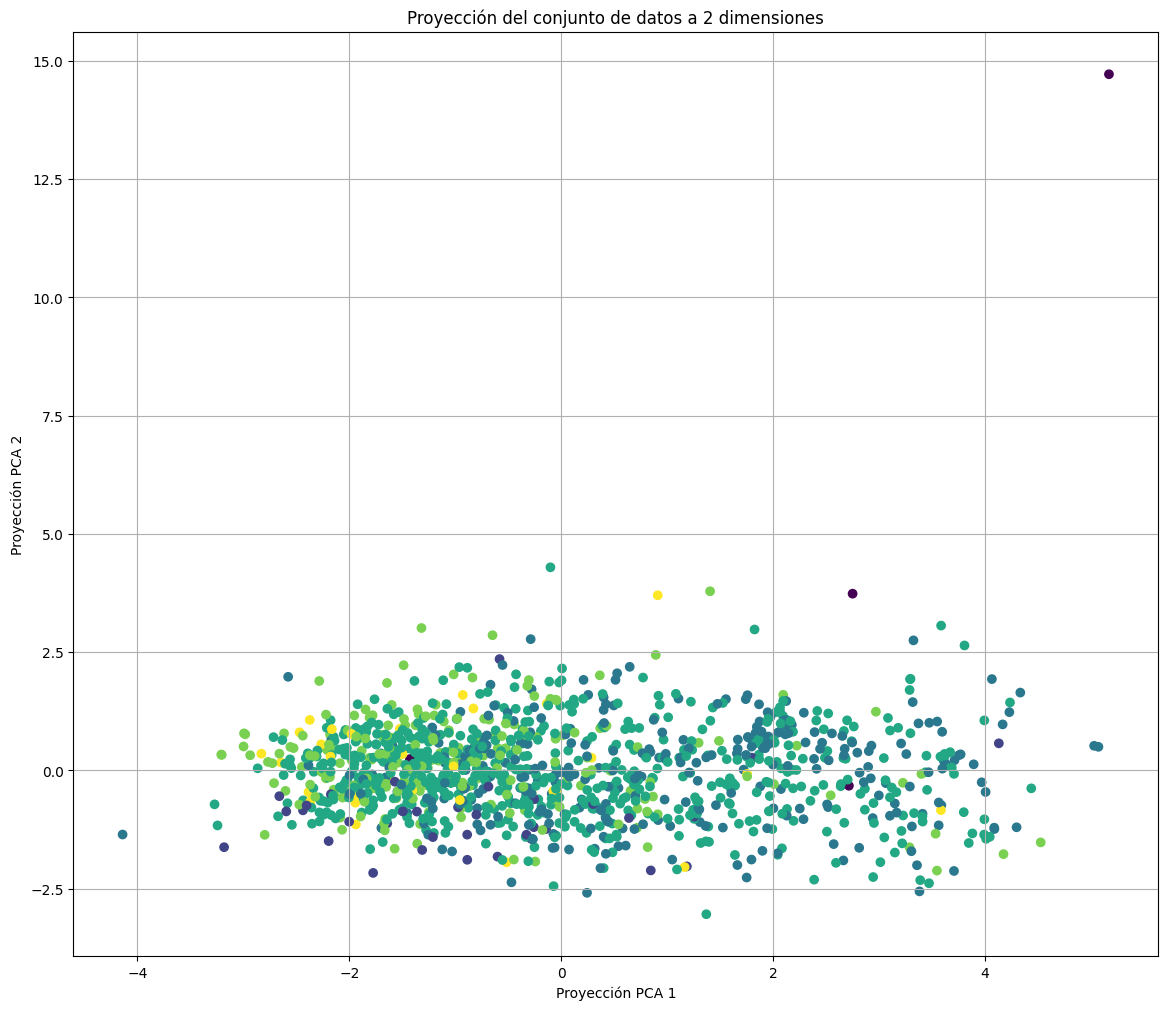

Antes de PCA:       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.504476         -0.883619     0.228596        1.740695  -0.829306   
1         -1.038343         -0.935517    -0.535740       -0.566954  -0.536945   
2          0.102001         -0.416533     0.483374       -0.404061  -0.357030   
3         -0.501711         -0.157040     0.483374        1.387760  -0.132137   
4         -0.635869         -1.350705     0.037512       -0.621252  -0.514456   
...             ...               ...          ...             ...        ...   
1627      -0.770027         -1.039314     0.037512       -0.675549  -0.626902   
1628      -0.501711         -0.468431     0.483374        1.061975  -0.446988   
1629      -0.568790         -0.883619    -0.599435       -0.784144  -0.581924   
1630      -1.239581         -0.624127     0.101206       -0.811293  -1.009221   
1631      -0.904185         -1.039314     0.610763       -0.892740  -1.054200   

      free su

{'n_components': 2,
 'copy': True,
 'whiten': False,
 'svd_solver': 'auto',
 'tol': 0.0,
 'iterated_power': 'auto',
 'n_oversamples': 10,
 'power_iteration_normalizer': 'auto',
 'random_state': None,
 'feature_names_in_': array(['fixed acidity', 'volatile acidity', 'citric acid',
        'residual sugar', 'chlorides', 'free sulfur dioxide',
        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
       dtype=object),
 'n_features_in_': 11,
 '_fit_svd_solver': 'covariance_eigh',
 'mean_': array([-0.57190461, -0.6457128 ,  0.1321611 ,  0.46188602, -0.49079589,
         0.55443274,  0.76192562, -0.64578248, -0.44425496, -0.50127475,
         0.23110211]),
 'noise_variance_': np.float64(0.3644281788076673),
 'n_samples_': 1249,
 'n_components_': 2,
 'components_': array([[ 0.05446675, -0.02028188,  0.05851418,  0.59378997,  0.07730159,
          0.28406976,  0.24367924,  0.51113761, -0.12360683,  0.02077894,
         -0.46646413],
        [-0.09597468, -0.05901079,  0.066

In [68]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Creamos un nuevo dataframe para trabajar en él.
df_pca_Moscatel = df_moscatel

# Graficamos la distribucion de los datos escalados
plt.figure(figsize=(10, 6))
plt.hist(df_pca_Moscatel, bins=30, edgecolor='black')
plt.title('Distribución de los datos escalados')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show() 

# Creamos un objeto PCA
pca_Moscatel = PCA(n_components=2)   
# Ajustamos el PCA a los datos escalados fit lo que hace es calcular los componentes principales y ajustas las transformaciones lineales y transform lo que hace es aplicar la transformación lineal a los datos
df_pca_Moscatel_fitTransform = pca_Moscatel.fit_transform(df_pca_Moscatel)
# Graficamos
plt.figure(figsize=(14, 12))
plt.scatter(df_pca_Moscatel_fitTransform[:, 0], df_pca_Moscatel_fitTransform[:, 1], c = df_agrupado_type.get_group('Moscatel')['quality'], cmap='viridis')
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.show()

# imprimimos los tamaños antes y después
print('Antes de PCA: {}'.format(df_moscatel))
print('Después de PCA: {}'.format(df_pca_Moscatel_fitTransform.shape))

pca_Moscatel.__dict__




* Vimos que PCA no funciono para explicar la varianza total del conjunto de vinos Moscatel por lo que haremos T-SNE

### T-SNE 

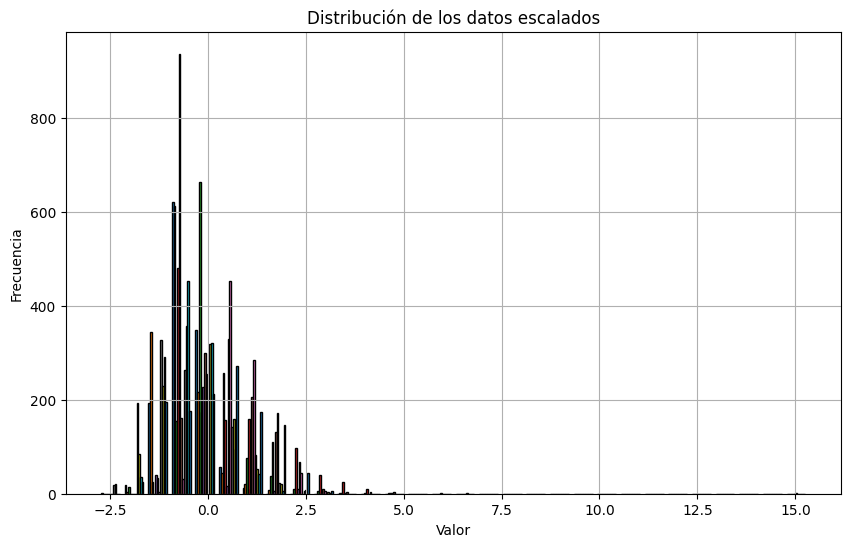

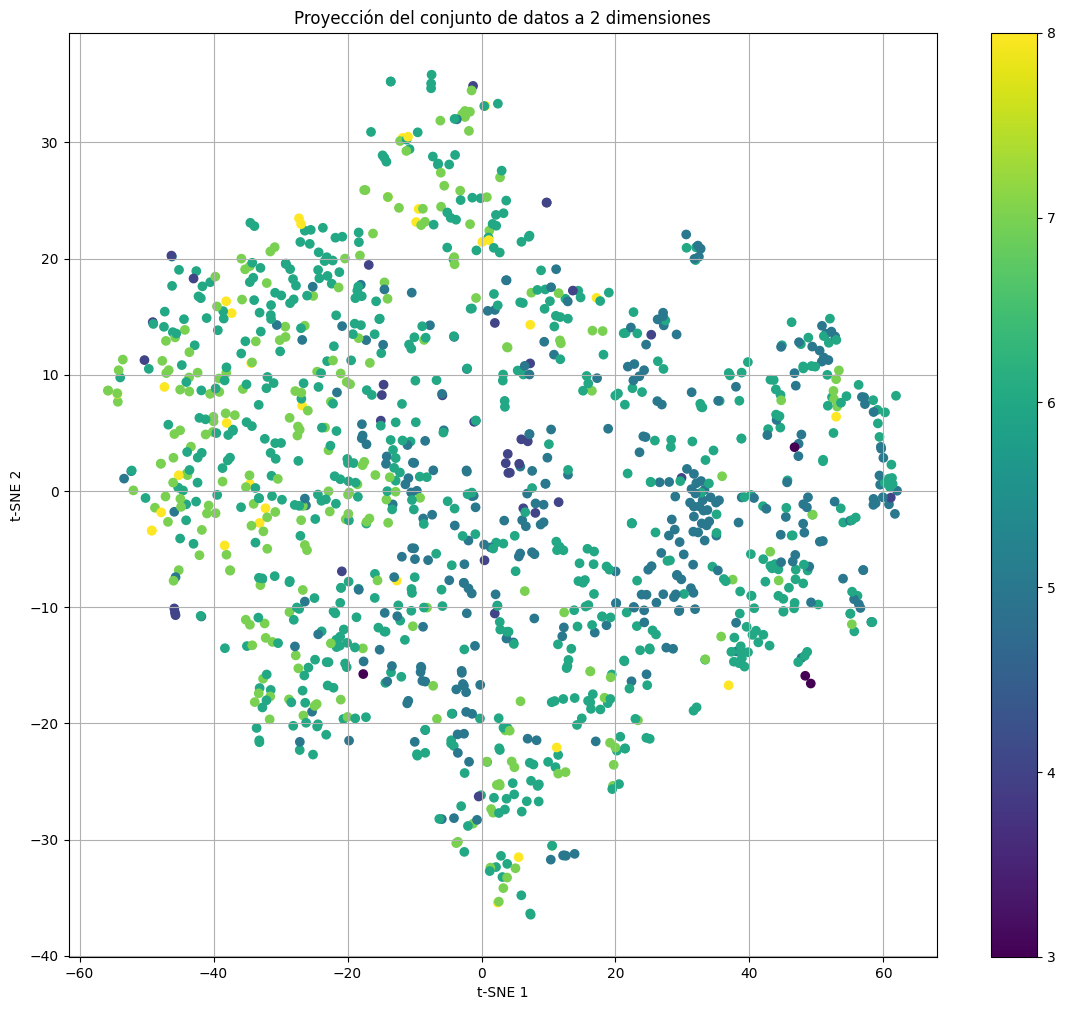

In [70]:
# Probemos tratar ver graficamente el conjunto de datos de Moscatel mediante TSNE
from sklearn.manifold import TSNE

# Graficamos los datos escalados
plt.figure(figsize=(10, 6))
plt.hist(df_moscatel, bins=30, edgecolor='black')
plt.title('Distribución de los datos escalados')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Creamos un objeto TSNE elegimos 2 componentes porque intuimos que el tipo de vino puede determinarse con 2 componentes
tsne_Moscatel = TSNE(n_components=2, random_state=10).fit_transform(df_moscatel)
# Graficamos con el color de la variable type por tipo de vino
plt.figure(figsize=(14, 12))
plt.scatter(tsne_Moscatel[:, 0], tsne_Moscatel[:, 1],  c = df_agrupado_type.get_group('Moscatel')['quality'], cmap='viridis')
plt.grid(True)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.colorbar()
plt.show()



* No podemos ver muy claramente que haya grupos pero si podemos ver que hay una tendencia a que la alta calidad del vino se junta en la parte izquierda

### Veamos algunos metodos de Clustering y antes hacer un grafico de codo.

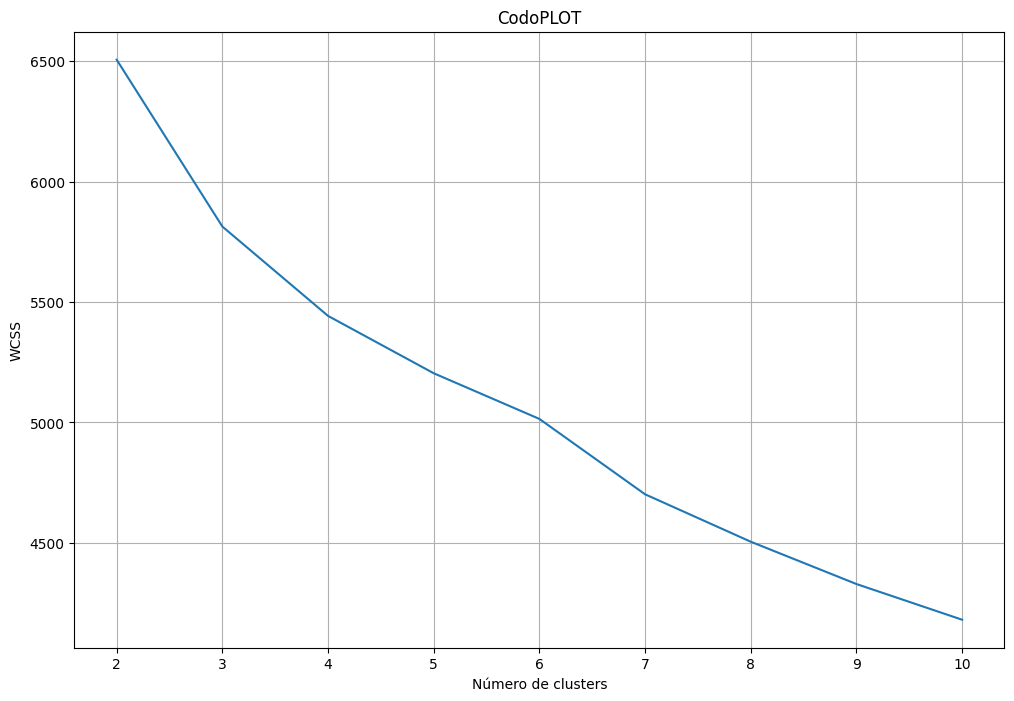

In [71]:
# Hacemos un grafico de codo para analizar cual podria ser un buen valor para agrupoar los datos del df_moscatel.

# Calculamos cada Kmean para cada numero de clusters
wcss = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(df_moscatel)
    wcss.append(kmeans.inertia_)

# Graficamos el codo
plt.figure(figsize=(12, 8))
plt.plot(range(2, 11), wcss)
plt.title('CodoPLOT')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


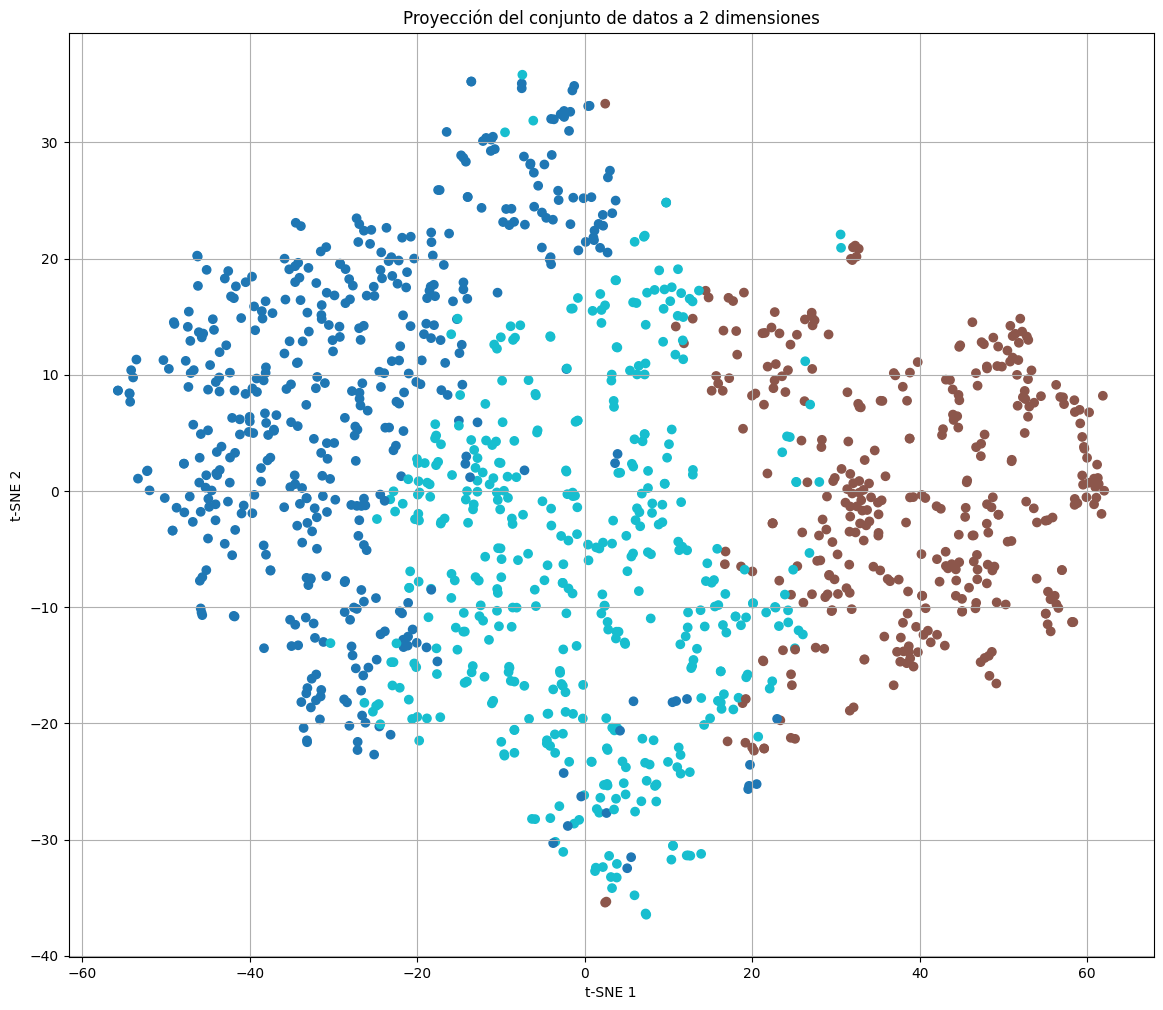

In [83]:
# Creamos un objeto KMeans
kmeans_Moscatel = KMeans(n_clusters=3, random_state=10)
# Aplicamos sobre nuestros datos estandarizados para encontrar los centroides
kmeans_Moscatel.fit(df_moscatel)
# Obtenemos los clusters a los que fueron asginados los datos
clusters_kMeans_Moscatel = kmeans_Moscatel.predict(df_moscatel)

# Graficamos el resultado de KMeans en 2D
plt.figure(figsize=(14, 12))
plt.scatter(tsne_Moscatel[:, 0], tsne_Moscatel[:, 1], c=clusters_kMeans_Moscatel, cmap='tab10')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
plt.grid(True)
plt.show()
